# Final Project - 

## Domain Knowledge

### Context
syarah.com adalah online marketplace untuk penjualan mobil bekas di saudi arabia, untuk menaikkan revenue akan menawarkan feature price suggestion kepada seller. feature ini akan dapat diakses oleh seller melalui subscription. dengan feature ini, seller dapat memasukkan input berupa attribute/feature dari mobil yang ingin dijual, outputnya adalah price range yang direkomendasikan untuk mobil dengan attribute/feature tersebut. 

### Stakeholder
syarah.com, syarah company (salah satu marketplace online untuk penjualan mobil bekas di Saudi Arabia)

### Busines Problem
1. **menentukan harga yang comptetive pada mobil bekas adalah hal yang lumayan sulit dilakukan**. tidak semua seller mengetahui hal-hal mengenai mobil yang ingin dijual, dan mencari informasi mengenai harga pasar dari mobil dengan feature-feature detail tertentu (e.g. mileage, kondisi kesehatan ban, kondisi exterior mobil, warna mobil tertentu, kondisi mesin, modifikasi mobil, keseringan service, tempat service dst.) sangatlah memakan waktu dan pengetahuan mengenai detail-detail tersebut. untuk kebanyakan orang yang ingin menjal mobil bekas mereka, waktu yang dibutuhkan untuk meneliti harga yang kompetitif dapat bervariasi, mulai dari  beberapa jam hinggaa beberapa hari. ini melibatkan pengecakan daftar harga online, kunjungan ke dealer, dan pertimbangan faktor-faktor seperti merk, model, tahun, jarak, tempuh, kondisi, dan permintaan.[^1] [^2] [^3]

2. **mengidentifikasi faktor-faktor apa saja yang mempengaruhi harga mobil pada saat tertentu memerlukan banyak waktu jika dilakukan secara manual.** seperti halnya menentukan harga, mencari tahu faktor-faktor apa saja yang dapat mempengaruhi harga mobil sangatlah memakan waktu. dan tidak semua seller mempunya waktu ataupun kemauan untuk me-researchnya

### Goals
1. **Accurately Predict the price of used cars** : membuat model dapat membantu penjualan mobil bekas dengan menetapkan range harga yang kompetitif dan akurat / 20-25% MAPE
2. **Understanding Key Factors** : mengidentifikasi faktor-faktor penting yang dapat mempengaruhi harga mobil bekas dijual

### Business Questions
1. **berapa prediksi harga dari sebuah mobil bekas dengan feature tertentu?** 
2. **feature mana yang berpengaruh dalam menetapkan harga mobil bekas?**
3. **bagaimana price distribution dari mobil bekas?**
4. **apa saja popular brand dari setiap region categorynya?**
5. **apa saja type mobil yang populer dari setiap region categorynya?**
6. **gear and fuel type apa saja yang populer?**
7. **bagaimana relasi antara mileage dan age dari mobil bekas dengan popularitynya?**

### Evaluation Metric
- MedAE : Median Absolute Error adalah metric yang robust kepada outlier, loss dihitung dengan mengambil median dari semua absoulute differences antara target dan prediksi. MedAE dipilih karena data yang akan diprediksi mempunyai outlier yang cukup signifikan.    
- MAE : Mean Absolute Error adalah metric yang digunakan untuk memprediksi range harga. range harga yaitu harga prediksi machine learning ditambang dan dikurangi MAE.
- MAPE : Mean Absolute Percentage Error adalah bentuk persentase dari MAE, yang digunakan untuk merepresentasikan error rate pada prediksi machine learningnya

### Project Limitation
- dataset row yang memiliki value "True" pada column "negotiable" di drop karena memiliki nilai value 0 pada column "Price"
- dataset berisi mobil bekas dari tahun 2003 - 2021
- dataset berisi mobil bekas dengan ukuran engine size 1.0 - 8.0
- dataset berisi mobil bekas dengan mileage 100 - 432000
- dataset berisi mobil bekasi dengan harga 4000 - 1150000
- dataset tidak memiliki population size untuk column regionnya, jadi diharuskan untuk mencari populasi untuk setiap valuenya dari external source, untuk men-categorisasikannya. 
- Hardware Machine Learning

### Data Features and Description
nama dataset : Saudi Arabia Used Cars Dataset

data set berisi mobil bekas sebanyak 8035 records yang diambil dari syarah.com. setiap row merepresentasikan sebuah mobil bekas dengan informasi mengenai brand name, model, manufacturing year, origin, the color of the car, options, capacity of the engine, type of fuel, transmission type, the mileage that the car covered, region price, and negotiable

| Column | Data Type | Description |
| --- | --- | --- |
| Make | str - Nominal | nama brand dari mobil |
| Type | str - Nominal | jenis dari mobil |
| Year | int - Interval| tahun produksi mobil |
| Origin | str - Nominal| asal mobil |
| Color | str - Nominal| warna dari mobil |
| Options | str - Ordinal| kelengkapan opsi yang ada pada mobil |
| Engine_Size | float - Ratio| ukuran mesin yang digunakan oleh mobil |
| Fuel_Type | str - Nominal | type bahan bakar yang digunakan oleh mobil |
| Mileage | int - Ratio | jarak tempuh mobil |
| Region | str - Nominal| wilayah tempat mobil dijual |
| Price | int - Ratio| harga mobil |
| Negotiable | bool - Bool| negosiasi harga mobil |



[^1]:https://www.kenresearch.com/industry-reports/singapore-use-car-market  
[^2]:https://lotlinx.com/used-car-inventory-trends/   
[^3]:https://markwideresearch.com/singapore-used-car-market/   

## Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline

from sklearn.metrics import  mean_absolute_error, median_absolute_error, mean_absolute_percentage_error, r2_score

from scipy.stats import randint, uniform

import pickle

In [2]:
df = pd.read_csv("./Datasets/UsedCarsSA_Clean_EN.csv")

In [3]:
df.head(10)

Make          Type  Year Origin   Color    Options  Engine_Size  \
0   Chrysler          C300  2018  Saudi   Black       Full          5.7   
1     Nissan        Patrol  2016  Saudi   White       Full          4.8   
2     Nissan         Sunny  2019  Saudi  Silver   Standard          1.5   
3    Hyundai       Elantra  2019  Saudi    Grey   Standard          1.6   
4    Hyundai       Elantra  2019  Saudi  Silver  Semi Full          2.0   
5      Honda        Accord  2018  Saudi    Navy       Full          1.5   
6     Toyota  Land Cruiser  2011  Saudi   White  Semi Full          4.5   
7        GMC         Yukon  2009  Saudi  Bronze       Full          5.7   
8  Chevrolet        Impala  2019  Saudi   Black   Standard          3.6   
9     Toyota         Yaris  2018  Saudi   White   Standard          1.5   

  Fuel_Type  Gear_Type  Mileage  Region   Price  Negotiable  
0       Gas  Automatic   103000  Riyadh  114000       False  
1       Gas  Automatic     5448  Riyadh       0        True  
2       Gas  Automatic    72418  Riyadh   27500       False  
3       Gas  Automatic   114154  Riyadh   43000       False  
4       Gas  Automatic    41912  Riyadh   59500       False  
5       Gas  Automatic    39000  Riyadh   72000       False  
6       Gas  Automatic   183000  Riyadh   92000       False  
7       Gas  Automatic   323000  Riyadh       0        True  
8       Gas  Automatic    70000  Riyadh   80000       False  
9       Gas  Automatic   131000  Jeddah   32000       False

In [4]:
df.shape

(8035, 13)

## Explarotary Data Analysis (EDA)

Objective: To understand data distribution and condition for 
preprocessing stage
Elements:
1. Data Distribution Plot (Boxplot, QQplot, Histogram)
2. Data Correlation (Nominal and Ratio scale correlation)
3. Data Cardinalities (Count unique for categorical feature)
4. Identify missing value, outlier, anomaly, duplicates, etc


### Data Distribution Plot

In [5]:
df.columns

Index(['Make', 'Type', 'Year', 'Origin', 'Color', 'Options', 'Engine_Size',
       'Fuel_Type', 'Gear_Type', 'Mileage', 'Region', 'Price', 'Negotiable'],
      dtype='object')

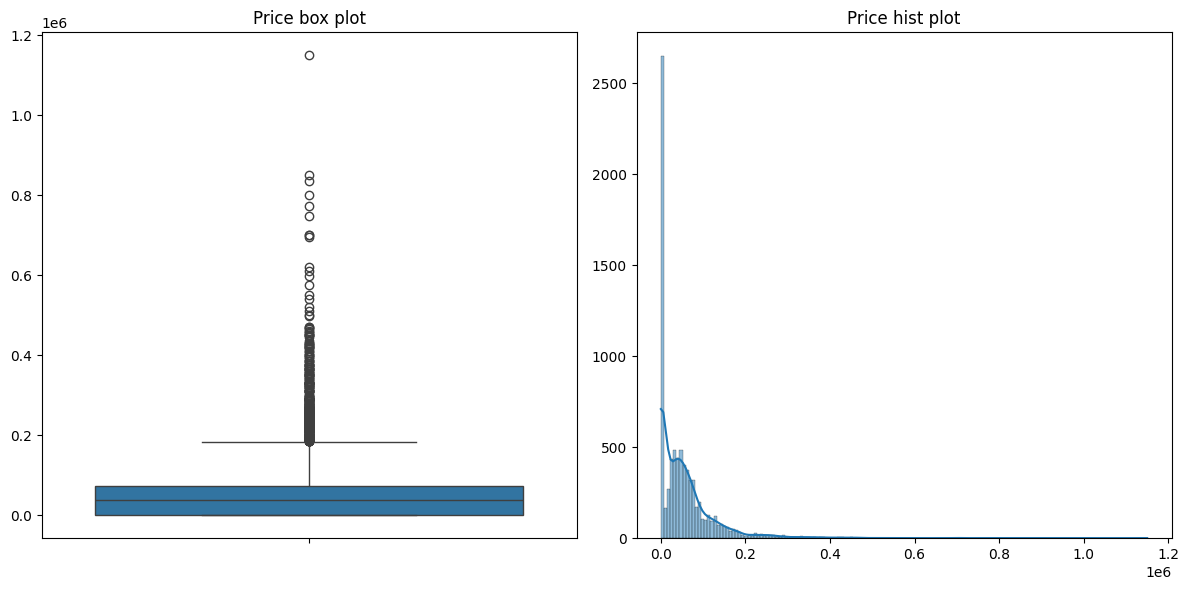

In [6]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(df['Price'], ax=ax_box)
ax_box.set(title=f'{"Price"} box plot', xlabel='', ylabel='')    
sns.histplot(df['Price'], ax=ax_hist, kde=True)
ax_hist.set(title=f'{"Price"} hist plot', xlabel='', ylabel='')
plt.tight_layout()
plt.show()

Price tidak terdistribusi dengan normal  
Price juga terlihat memiliki banyak outlier   
price memiliki banyak yang bernilai 0 karena semua mobil yang memiliki nilai column negosiasi true maka price akan di set sebagai 0.

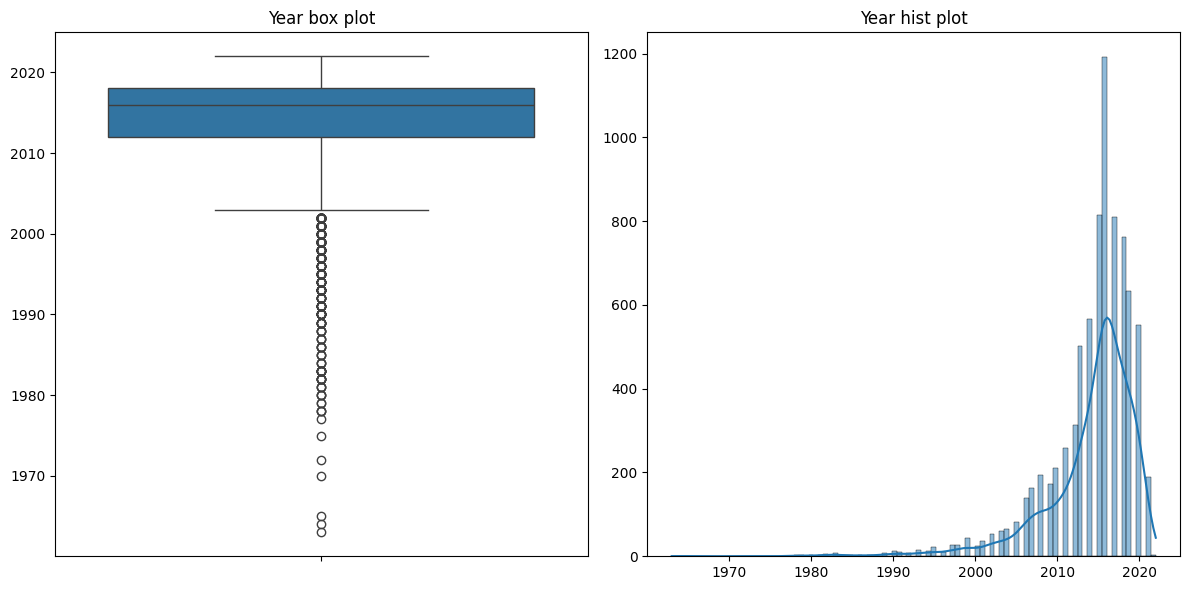

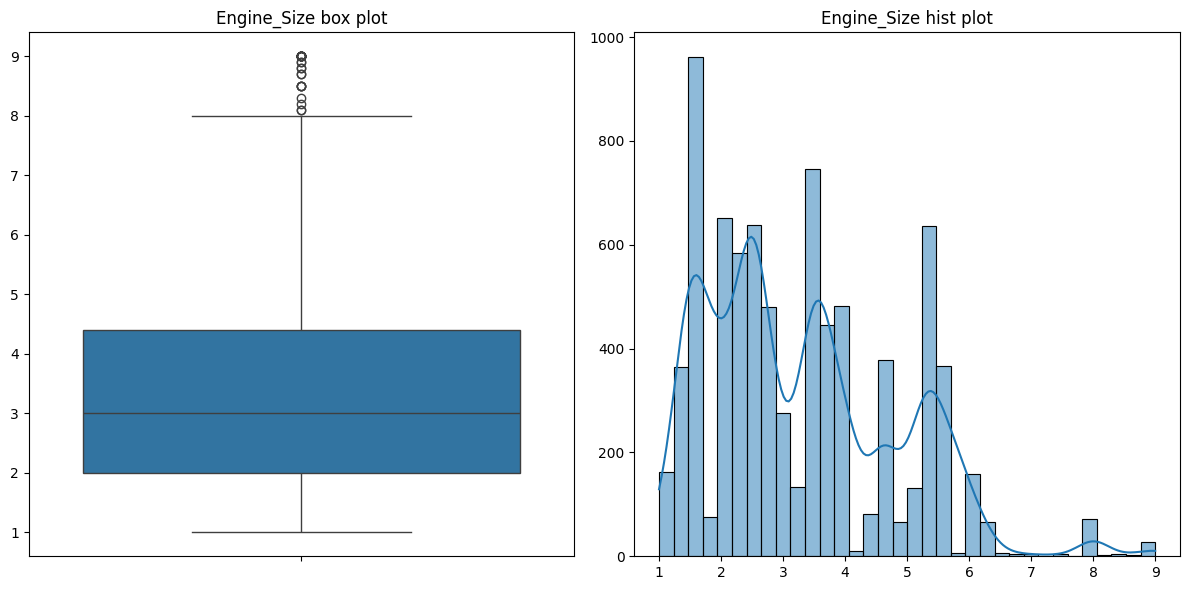

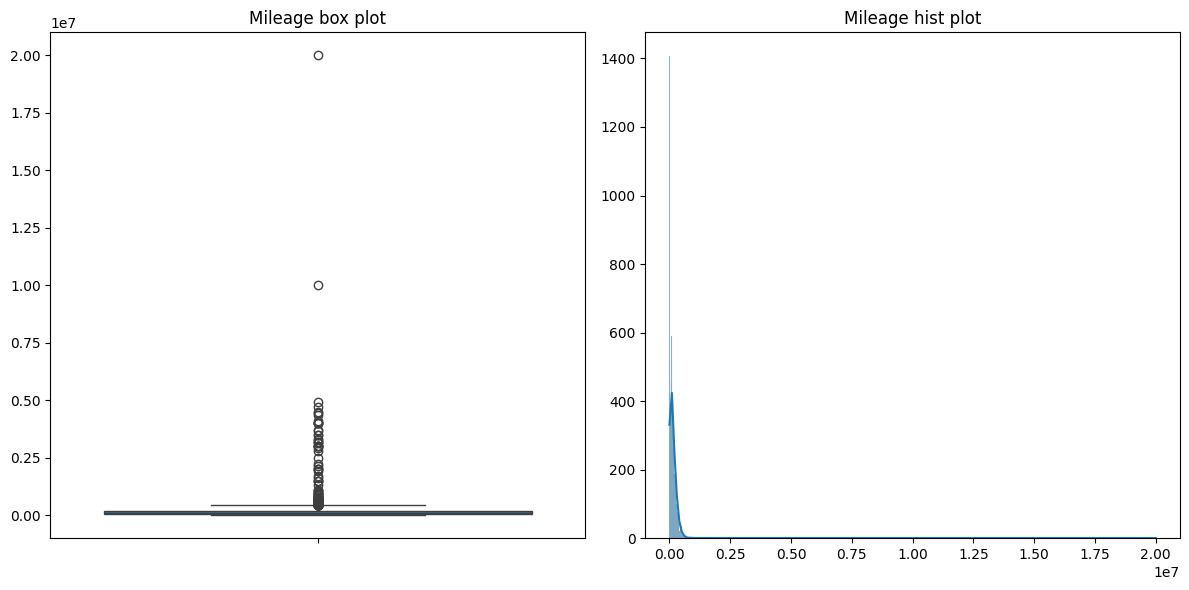

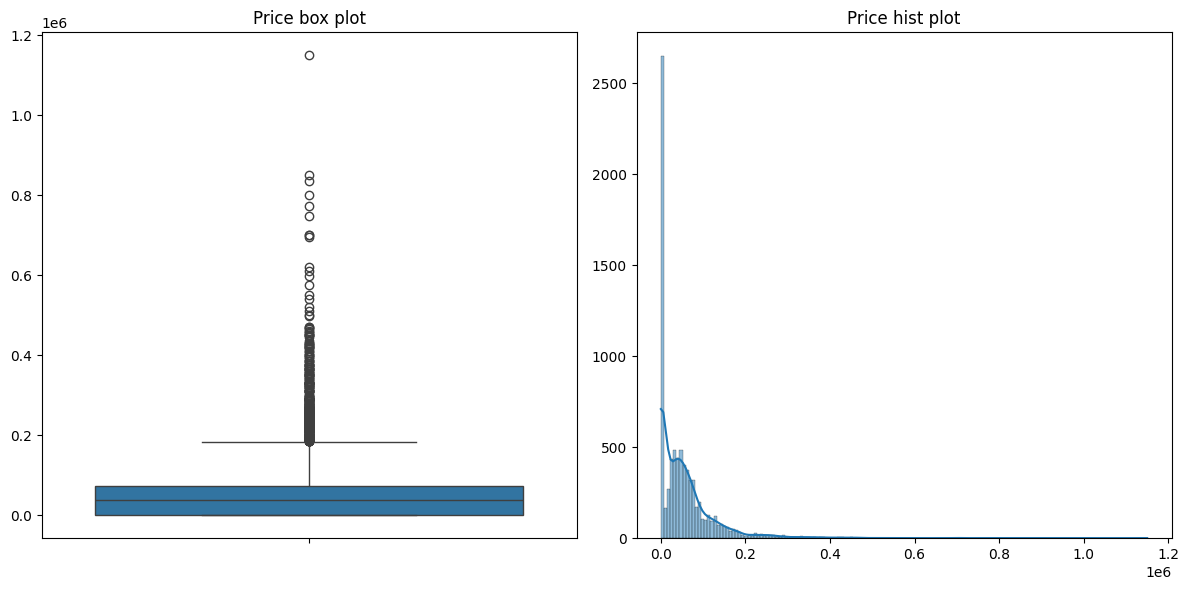

In [7]:
listTemp = ['Year','Engine_Size', 'Mileage', 'Price']

for i in listTemp:
    fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))
    sns.boxplot(df[i], ax=ax_box)
    ax_box.set(title=f'{i} box plot', xlabel='', ylabel='')    
    sns.histplot(df[i], ax=ax_hist, kde=True)
    ax_hist.set(title=f'{i} hist plot', xlabel='', ylabel='')
    plt.tight_layout()
    plt.show()

Year memiliki banyak outlier dan memiliki left skew   
Engine_Size memiki outlier tetapi terlihat lebih merata dan memiliki right skew  
Mileage memiliki banyak outlier dan memiliki right skew  
Price memiliki banyak outlier dan memiliki right skew  

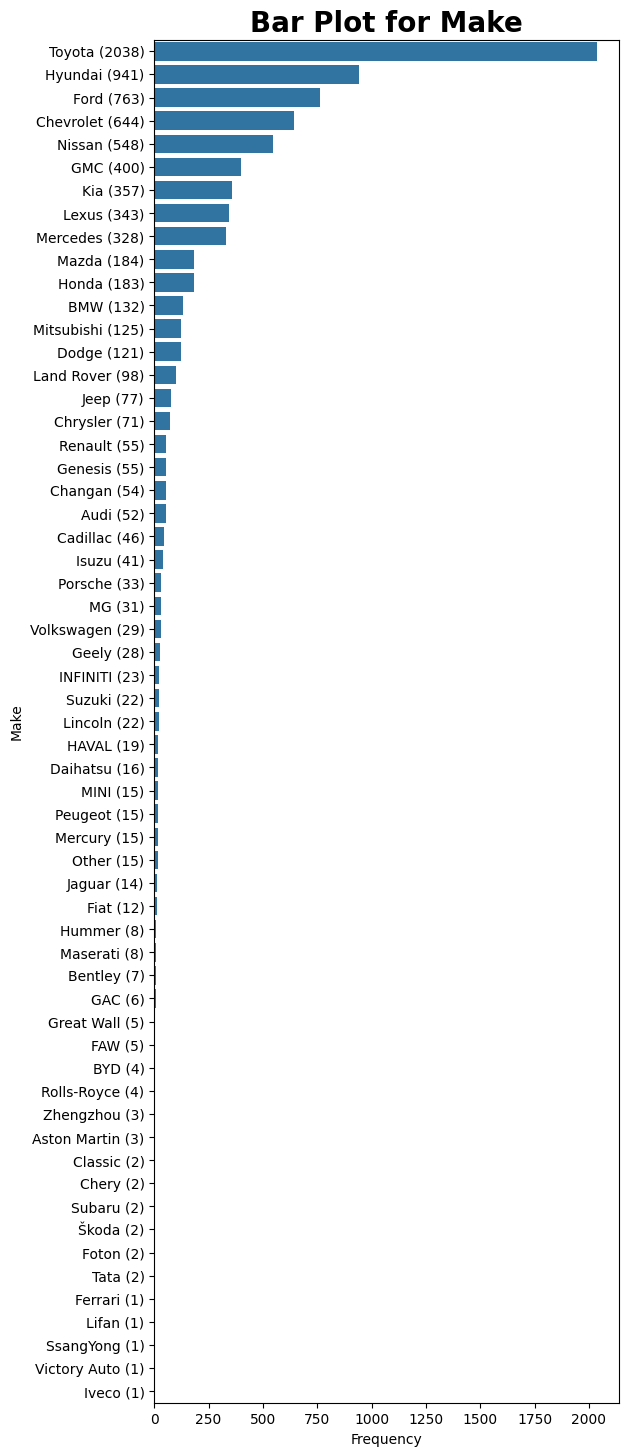

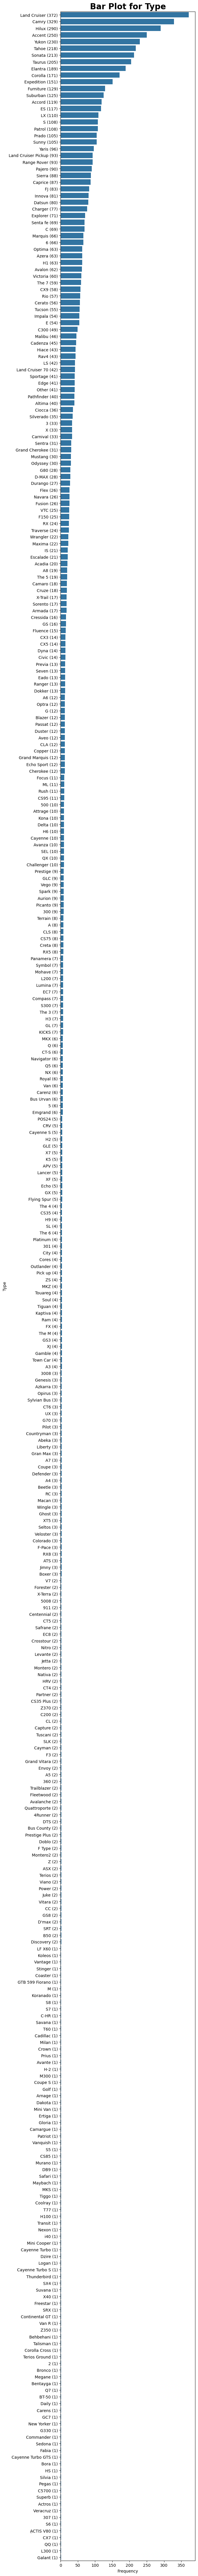

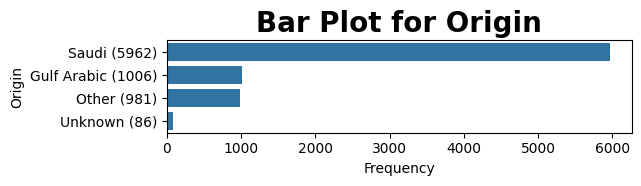

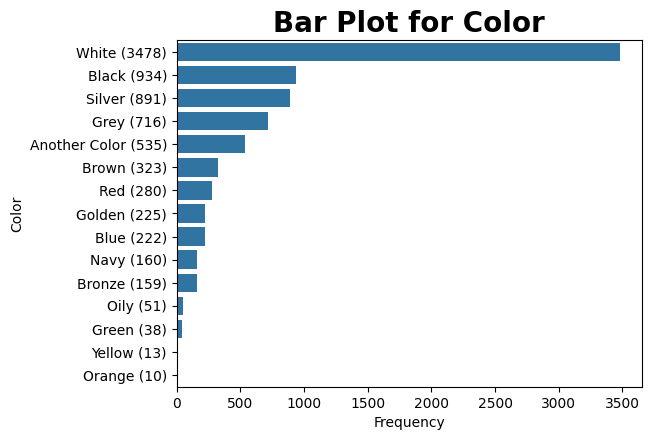

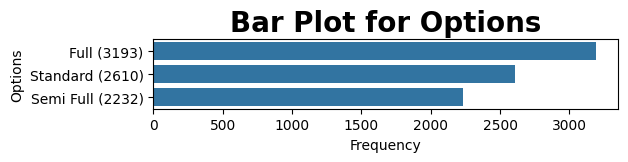

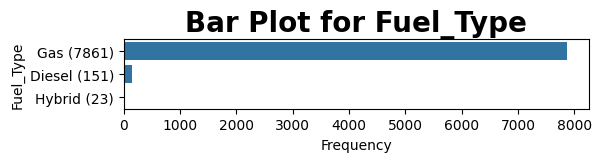

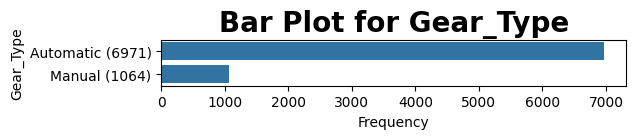

In [8]:
listTemp = ['Make', 'Type', 'Origin', 'Color', 'Options', 'Fuel_Type', 'Gear_Type']

for i in listTemp:
    plt.figure(figsize=(6, df[i].nunique() * 0.3))

    value_counts = df[i].value_counts().sort_values(ascending=False)
    ax = sns.countplot(data=df, y=i, order=value_counts.index)
    y_labels = [f"{category} ({count})" for category, count in value_counts.items()]
    
    plt.title(f'Bar Plot for {i}', size=20, weight='bold')
    plt.xlabel('Frequency')
    plt.ylabel(i)
    
    ax.set_yticks(range(len(y_labels))) 
    ax.set_yticklabels(y_labels)
    
    plt.show()

### Data Correlation

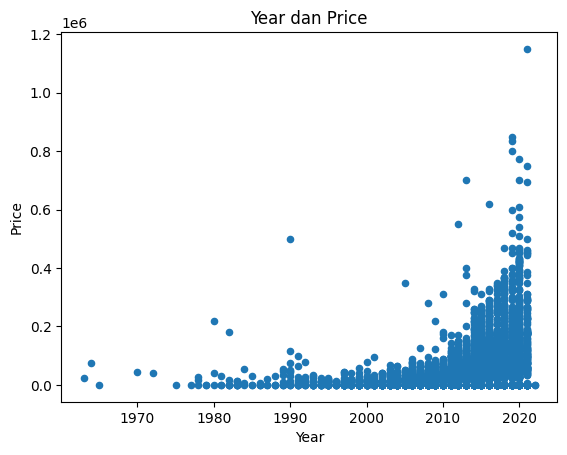

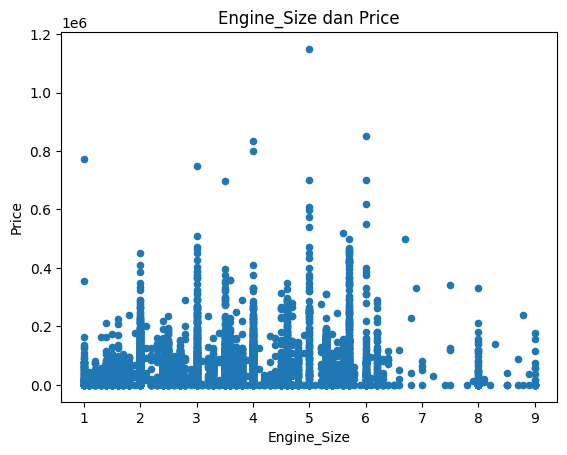

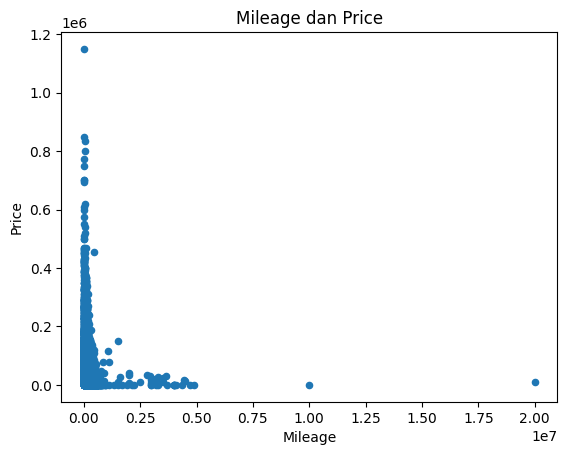

In [9]:
listTemp = ['Year','Engine_Size', 'Mileage']
for i in listTemp:
    df.plot(kind='scatter', y='Price', x=i)
    plt.title(f'{i} dan Price')
    plt.show()

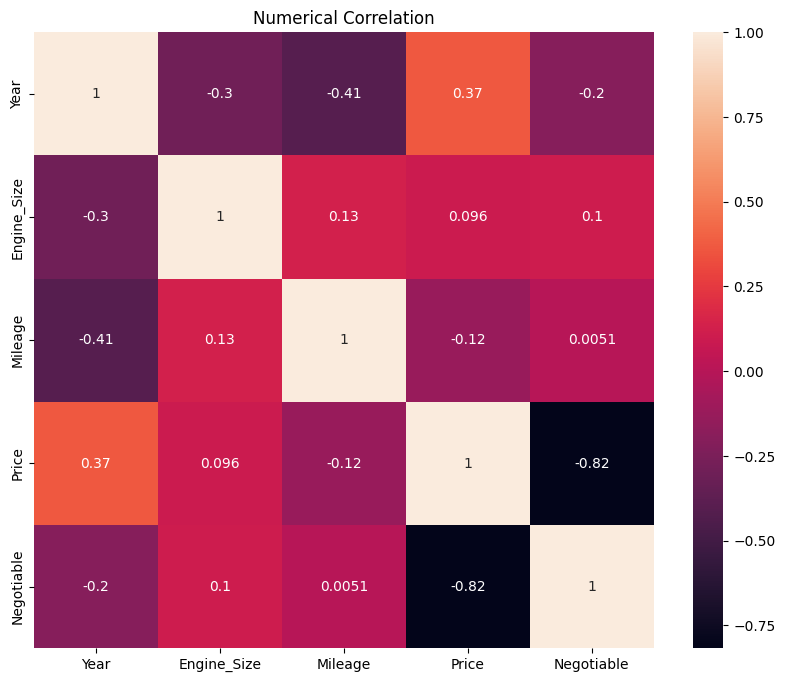

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True)
plt.title('Numerical Correlation')
plt.show()

**Year** : 0.37, *postive medium* correlation kepada Price, semakin tinggi `year` (semakin baru) maka `Price` akan naik   
**Engine_Size** : 0.096, *postive low* correlation kepada Price, semakin  besar `Engine_Size` maka `Price` akan naik sedikit   
**Mileage** : -0.12, *negative low* correlation kepada Price, semakin besar `Mileage` maka `Price` akan turun sedikit   
**Negotiable** : -0.82 *positive high* correlation kepada Price. pada kasus ini `Negotiable` berbanding terbalik terhadap `Price`, dimana jika `Negotiable` Postive (memiliki nilai / 1), maka `Price` akan 0, dan sebaliknya bila `Price` Postive (memiliki nilai) maka `Negotiable` akan 0     
     
***Summary***
- **Low Correlation** : `Engine_Size` dan `Mileage` memiliki low correlation kepada `Price`, yang berarti `Engine_Size` dan `Mileage` memiliki pengaruh yang kecil terhadap Price
- **Medium Correlation** : `Year` memiliki medium correlation kepada `Price`, yang berarti nilai `Year` memiliki pengaruh yang cukup significant terhadap nilai `Price`
- **High Correlation** : `Negotiable` memiliki high correlation kepada `Price`, yang berarti nilai `Negotiable` memilki pengaruh yang sangat significant terhadap nilai `Price`

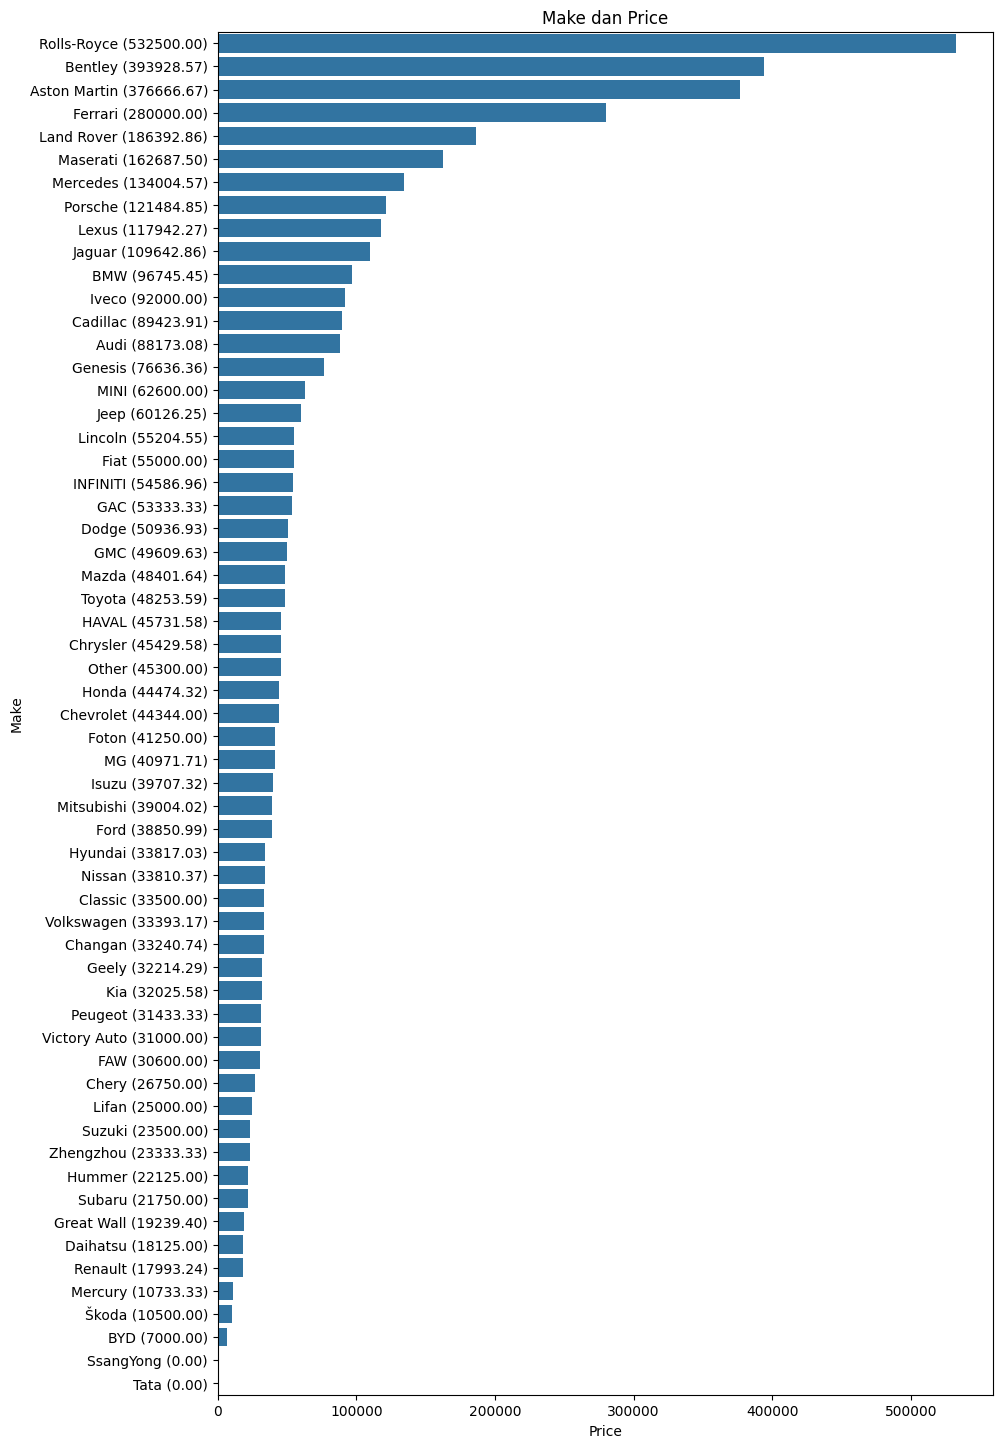

ANOVA table for Make and Price:
                sum_sq      df          F  PR(>F)
C(Make)   9.394720e+12    58.0  40.077596     0.0
Residual  3.223587e+13  7976.0        NaN     NaN




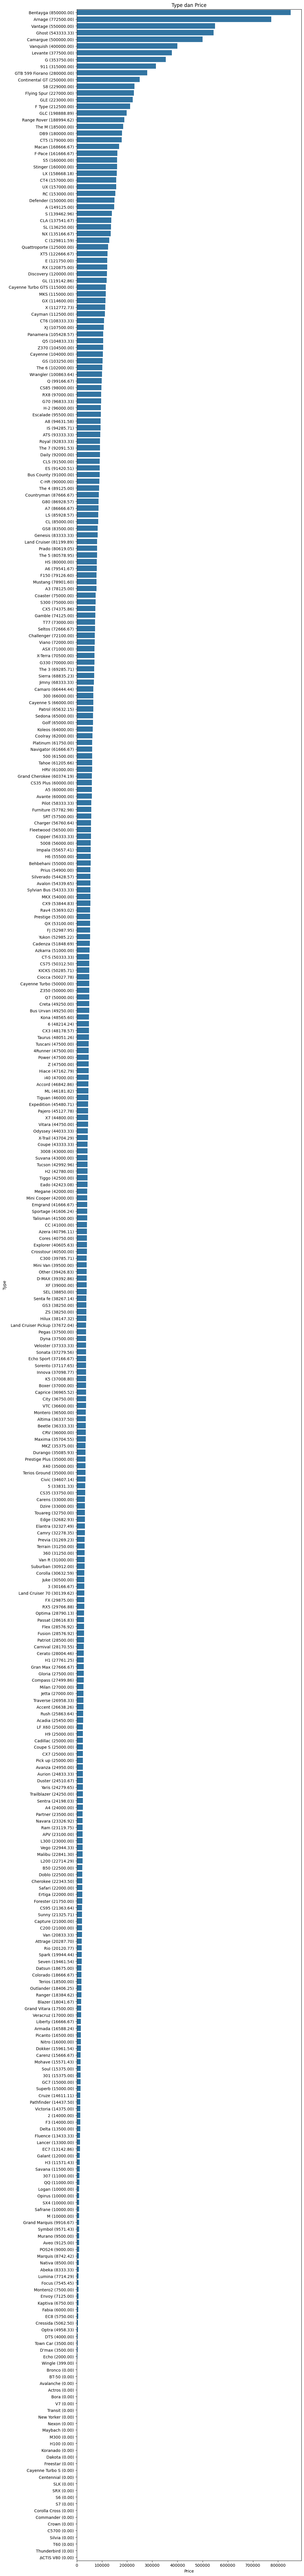

ANOVA table for Type and Price:
                sum_sq      df         F  PR(>F)
C(Type)   1.371495e+13   380.0  9.895818     0.0
Residual  2.791563e+13  7654.0       NaN     NaN




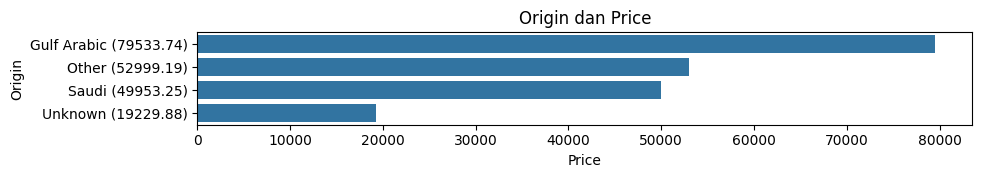

ANOVA table for Origin and Price:
                 sum_sq      df          F        PR(>F)
C(Origin)  8.577480e+11     3.0  56.316692  5.098152e-36
Residual   4.077284e+13  8031.0        NaN           NaN




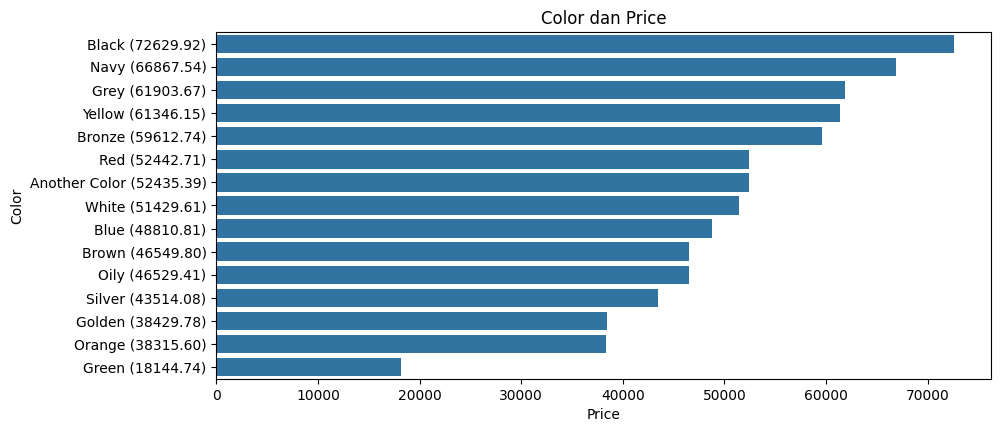

ANOVA table for Color and Price:
                sum_sq      df         F        PR(>F)
C(Color)  6.559221e+11    14.0  9.170293  2.151999e-20
Residual  4.097466e+13  8020.0       NaN           NaN




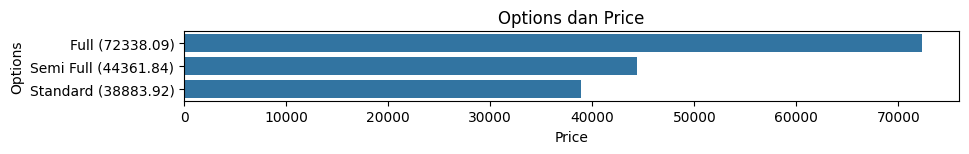

ANOVA table for Options and Price:
                  sum_sq      df           F        PR(>F)
C(Options)  1.876750e+12     2.0  189.592482  3.511804e-81
Residual    3.975384e+13  8032.0         NaN           NaN




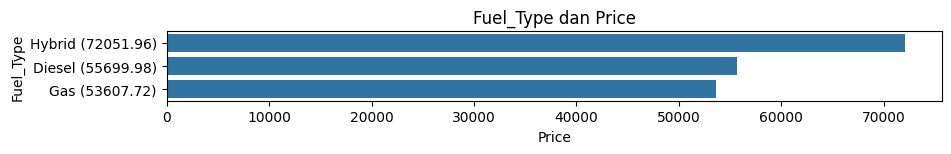

ANOVA table for Fuel_Type and Price:
                    sum_sq      df         F    PR(>F)
C(Fuel_Type)  8.417198e+09     2.0  0.812151  0.443939
Residual      4.162217e+13  8032.0       NaN       NaN




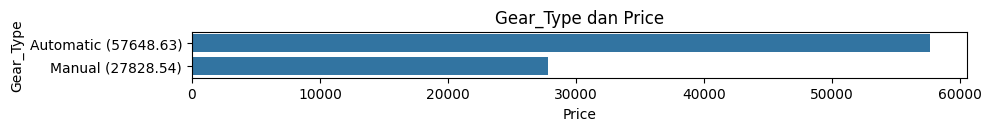

ANOVA table for Gear_Type and Price:
                    sum_sq      df           F        PR(>F)
C(Gear_Type)  8.208592e+11     1.0  161.578199  1.151752e-36
Residual      4.080973e+13  8033.0         NaN           NaN




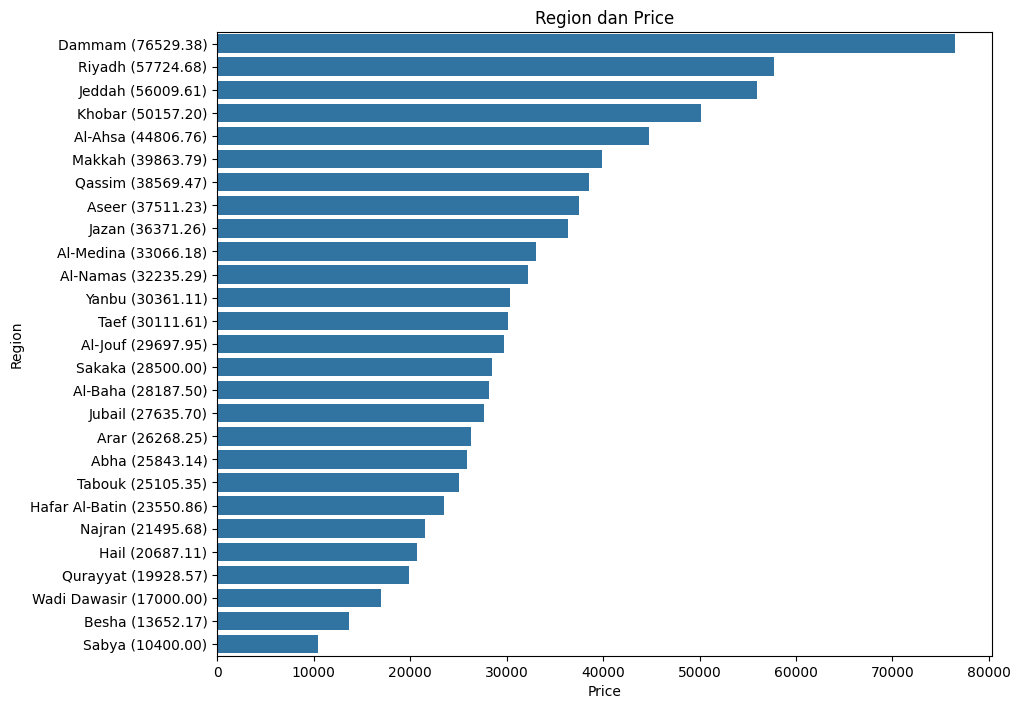

ANOVA table for Region and Price:
                 sum_sq      df          F        PR(>F)
C(Region)  1.839678e+12    26.0  14.239959  5.466373e-61
Residual   3.979091e+13  8008.0        NaN           NaN




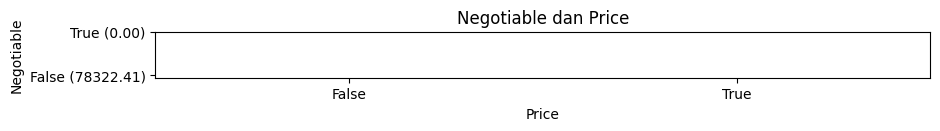

ANOVA table for Negotiable and Price:
                     sum_sq      df            F  PR(>F)
C(Negotiable)  1.062411e+13     1.0  2752.438765     0.0
Residual       3.100648e+13  8033.0          NaN     NaN




In [11]:
listTemp = ['Make','Type', 'Origin', 'Color', 'Options', 'Fuel_Type', 'Gear_Type', 'Region', 'Negotiable']

for i in listTemp:
    plt.figure(figsize=(10, df[i].nunique() * 0.3))

    mean_prices = df.groupby(i)['Price'].mean().sort_values(ascending=False)
    ax = sns.barplot(data=df, x='Price', y=i, order=mean_prices.index, errorbar=None)
    y_labels = [f"{category} ({price:.2f})" for category, price in mean_prices.items()]

    plt.title(f'{i} dan Price')

    ax.set_yticks(range(len(y_labels)))
    ax.set_yticklabels(y_labels)
    plt.show()

    model = ols(f'Price ~ C({i})', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    print(f'ANOVA table for {i} and Price:')
    print(anova_table)
    print('\n')

***Columns pada ANOVA Table:***
1. **sum_sq**: merepresentasikan jumlah kuadrat, ukuran variabilitas total dalam data. semakin tinggi nilai berarti semakin bervariable 
2. **df**: Degrees of freedom. ini mengindisikan jumlah independent values yang dapat bervariasi dalam analysis. total degrees of freedom adalah jumlah data point dikurang 1.
3. **F**: F-statistic mengukur ratio dari variance yang dijelaskan oleh model terhadap yang tidak dijelaskan oleh model. semakin tinggi semakin kuat relasi antara variable category dan variable continous.
4. **PR(>F)**:  p-value mengidikasikann probability bahwa hasil adalah kebetulan. p-values rendah (typically <0.05) menunjukkan bahwa efeknya significant secara statistic.

***Interpretation of ANOVA Tables:***
1. **Make and Price**:
   - **F**: 40.077596, **strong relationship** antara "Make" dan "Price".
   - **PR(>F)**: 0.0, efek **signifikan** secara statistik.

2. **Type and Price**:
   - **F**: 9.895818, **significant relationship** antara "Type" dan "Price".
   - **PR(>F)**: 0.0, efek **signifikan** secara statistik.

3. **Origin and Price**:
   - **F**: 56.316692, **strong relationship** antara "Origin" dan "Price".
   - **PR(>F)**: 5.098152e-36, efek **signifikan** secara statistik.

4. **Color and Price**:
   - **F**: 9.170293, **significant relationship** antara "Color" dan "Price".
   - **PR(>F)**: 2.151999e-20, efek **signifikan** secara statistik.

5. **Options and Price**:
   - **F**: 189.592482, **very strong relationship** antara "Options" dan "Price".
   - **PR(>F)**: 3.511804e-81, efek **signifikan** secara statistik.

6. **Fuel_Type and Price**:
   - **F**: 0.812151, **weak relationship** antara "Fuel_Type" dan "Price".
   - **PR(>F)**: 0.443939, efek **tidak signifikan** secara statistik.

7. **Gear_Type and Price**:
   - **F**: 161.578199, **very strong** relationship antara "Gear_Type" dan "Price".
   - **PR(>F)**: 1.151752e-36, efek **signifikan** secara statistik.

8. **Region and Price**:
   - **F**: 14.239959, **strong relationship** antara "Region" dan "Price".
   - **PR(>F)**: 5.466373e-61, efek **signifikan** secara statistik.

9. **Negotiable and Price**:
   - **F**: 2752.438765, **very strong relationshi**p antara "Negotiable" and "Price".
   - **PR(>F)**: 0.0, efek **signifikan** secara statistik.

***Summary***
- **Significant Variables**: Variables like `Make`, `Type`, `Origin`, `Color`, `Options`, `Gear_Type`, `Region`, dan `Negotiable` memilike efek yang siginifikan secara statistic pada  `Price` (low p-values).
- **Non-Significant Variables**: `Fuel_Type` tidak memiliki efek yang signifikan secara statistic pada `Price` (high p-value).

ini berarti Fuel Type dapat didrop pada saat data cleaning

### Data Cardinalities

In [12]:
desc = df.describe().T
desc['IQR'] = desc['75%'] - desc['25%']
desc['median'] = df.median(numeric_only=True)
desc['most_frequent'] = df.mode(numeric_only=True).iloc[0]
desc

count           mean            std     min      25%       50%  \
Year         8035.0    2014.097698       5.757228  1963.0   2012.0    2016.0   
Engine_Size  8035.0       3.287729       1.517747     1.0      2.0       3.0   
Mileage      8035.0  149148.801369  347448.024433   100.0  37000.0  101960.0   
Price        8035.0   53699.835843   71984.724635     0.0      0.0   37000.0   

                  75%         max       IQR    median most_frequent  
Year           2018.0      2022.0       6.0    2016.0          2016  
Engine_Size       4.4         9.0       2.4       3.0           3.5  
Mileage      195000.0  20000000.0  158000.0  101960.0        300000  
Price         73750.0   1150000.0   73750.0   37000.0             0

In [13]:
listTemp = df.select_dtypes(exclude=[float, int]).columns
for i in listTemp:
    print(f"Jumlah Unique Value dari {i}: {df[i].nunique()}")
    print(df[i].unique(), "\n")

Jumlah Unique Value dari Make: 59
['Chrysler' 'Nissan' 'Hyundai' 'Honda' 'Toyota' 'GMC' 'Chevrolet'
 'Mercedes' 'MINI' 'Lexus' 'Land Rover' 'Mazda' 'Ford' 'Kia' 'Genesis'
 'Cadillac' 'Geely' 'MG' 'Jeep' 'INFINITI' 'Dodge' 'Ferrari' 'Great Wall'
 'Jaguar' 'GAC' 'Renault' 'Suzuki' 'Peugeot' 'Changan' 'HAVAL' 'BMW'
 'Rolls-Royce' 'Porsche' 'Mitsubishi' 'Isuzu' 'Subaru' 'Zhengzhou'
 'Lincoln' 'Volkswagen' 'Daihatsu' 'FAW' 'Chery' 'Audi' 'Bentley'
 'Aston Martin' 'Mercury' 'Fiat' 'BYD' 'Classic' 'Hummer' 'Other'
 'Maserati' 'SsangYong' 'Lifan' 'Foton' 'Tata' 'Victory Auto' 'Škoda'
 'Iveco'] 

Jumlah Unique Value dari Type: 381
['C300' 'Patrol' 'Sunny' 'Elantra' 'Accord' 'Land Cruiser' 'Yukon'
 'Impala' 'Yaris' 'Camry' 'Tahoe' 'CLA' 'E' 'Corolla' 'Copper' 'Prado'
 'Civic' 'Furniture' 'RX' 'Range Rover' 'Avalon' 'Bus Urvan' 'Aurion'
 'Malibu' 'Rav4' 'CX9' 'Expedition' 'ES' 'Cadenza' 'Tucson' 'Platinum'
 'G80' 'Accent' 'Sonata' 'LX' 'Senta fe' 'GX' 'Azera' 'CT-S' 'EC7' 'ZS'
 'Kona' 'Grand Cher

In [14]:
df.describe(exclude='number')

Make          Type Origin  Color Options Fuel_Type  Gear_Type  \
count     8035          8035   8035   8035    8035      8035       8035   
unique      59           381      4     15       3         3          2   
top     Toyota  Land Cruiser  Saudi  White    Full       Gas  Automatic   
freq      2038           372   5962   3478    3193      7861       6971   

        Region Negotiable  
count     8035       8035  
unique      27          2  
top     Riyadh      False  
freq      3237       5509

Make dan Type memiliki one to many relationship dimana satu brand pada Make memiliki berkaitan dengan beberapa model mobil pada Type.  
ini berarti salah satu antara Make atau Type dapat didrop nantinya pada data cleaning.   

Negotiable dan Price berbanding terbalik dimana jika Price diatas 0 maka Negotiable pasti bernilai False, dan jika Negotiable bernilai True maka Price akan bernilai 0.  
ini berarti Negotiable dapat didrop nantinya pada data cleaning. karena kita ingin memprediksi nilai dari Price. 



In [15]:
df[(df['Price'] > 0) & (df['Negotiable'] == True)]

Empty DataFrame
Columns: [Make, Type, Year, Origin, Color, Options, Engine_Size, Fuel_Type, Gear_Type, Mileage, Region, Price, Negotiable]
Index: []

### Identify missing value, outlier, anomaly, duplicates, etc

**Missing Value**

In [16]:
dataDesc = []
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "Data Types",
    "Null Val",
    "Null Percentage",
    "Unique",
    "Unique Sample"])

Data Features Data Types  Null Val  Null Percentage  Unique  \
0           Make     object         0              0.0      59   
1           Type     object         0              0.0     381   
2           Year      int64         0              0.0      52   
3         Origin     object         0              0.0       4   
4          Color     object         0              0.0      15   
5        Options     object         0              0.0       3   
6    Engine_Size    float64         0              0.0      75   
7      Fuel_Type     object         0              0.0       3   
8      Gear_Type     object         0              0.0       2   
9        Mileage      int64         0              0.0    2175   
10        Region     object         0              0.0      27   
11         Price      int64         0              0.0     541   
12    Negotiable       bool         0              0.0       2   

          Unique Sample  
0          [BMW, Honda]  
1           [The M, ES]  
2          [2001, 1964]  
3      [Unknown, Other]  
4         [Oily, Black]  
5      [Standard, Full]  
6            [6.5, 5.2]  
7         [Hybrid, Gas]  
8   [Automatic, Manual]  
9      [280000, 356000]  
10        [Jazan, Arar]  
11       [2314, 329000]  
12        [False, True]

dataset terlihat tidak memiliki missing value pada semua row dan columnya

**Outlier**

In [17]:
listTemp = df.select_dtypes(exclude=[float, int]).columns

for i in listTemp:
    frequency = df[i].value_counts()
    outliers = frequency[frequency <= 1]
    print(f"Outliers in {i}: {outliers.index.tolist()}")
    print(f"Outliers number : {outliers.size}")
    print(f"Outliers percentage :{outliers.sum() / df[i].shape[0]:.3f}%")
    print()

Outliers in Make: ['Ferrari', 'Lifan', 'SsangYong', 'Victory Auto', 'Iveco']
Outliers number : 5
Outliers percentage :0.001%

Outliers in Type: ['Murano', 'DB9', 'Safari', 'Maybach', 'MKS', 'Tiggo', 'Coolray', 'T77', 'H100', 'Transit', 'Nexon', 'i40', 'Mini Cooper', 'Cayenne Turbo', 'Dzire', 'Logan', 'Cayenne Turbo S', 'Thunderbird', 'SX4', 'Suvana', 'X40', 'Freestar', 'SRX', 'Continental GT', 'Van R', 'Z350', 'Behbehani', 'Talisman', 'Corolla Cross', 'Terios Ground', '2', 'CS85', 'S5', 'Vanquish', 'Patriot', 'LF X60', 'Koleos', 'Vantage', 'Stinger', 'S8', 'S7', 'C-HR', 'Savana', 'Coaster', 'GTB 599 Fiorano', 'M', 'Koranado', 'Crown', 'Milan', 'Cadillac', 'T60', 'Prius', 'Avante', 'H-2', 'M300', 'Dakota', 'Arnage', 'Golf', 'Coupe S', 'Camargue', 'Gloria', 'Ertiga', 'Mini Van', 'Bronco', 'Megane', 'Bentayga', 'Q7', 'BT-50', 'Daily', 'Carens', 'GC7', 'New Yorker', 'G330', 'Commander', 'Sedona', 'Fabia', 'Cayenne Turbo GTS', 'Bora', 'HS', 'Silvia', 'Pegas', 'C5700', 'Superb', 'Actros', 'V

pada column dengan value nominal/categorical outlier dapat dikatakan sebagai make atau brand yang rare i.e hanya ada 1 pada dataset

In [18]:
desc = df.describe().T
desc['IQR'] = desc['75%'] - desc['25%']
listTemp = desc.index.tolist()

for i in listTemp:
    outliers = df[(df[i] < (desc.loc[i]['25%'] - 1.5 * desc.loc[i]['IQR'])) | (df[i] > (desc.loc[i]['75%'] + 1.5 * desc.loc[i]['IQR']))]
    print(f"outlier {i} berjumlah :{outliers.shape[0]}")
    print(f"Outliers percentage :{outliers.shape[0] / df[i].shape[0]:.3f}%")
    print(f"iqr \t: {desc.loc[i]['IQR']}")
    print(f"lowerbound \t: {desc.loc[i]['25%'] - 1.5 * desc.loc[i]['IQR']:.1f}")
    print(f"upperbound \t: {desc.loc[i]['75%'] + 1.5 * desc.loc[i]['IQR']:.1f}")
    print()

outlier Year berjumlah :357
Outliers percentage :0.044%
iqr 	: 6.0
lowerbound 	: 2003.0
upperbound 	: 2027.0

outlier Engine_Size berjumlah :37
Outliers percentage :0.005%
iqr 	: 2.4000000000000004
lowerbound 	: -1.6
upperbound 	: 8.0

outlier Mileage berjumlah :258
Outliers percentage :0.032%
iqr 	: 158000.0
lowerbound 	: -200000.0
upperbound 	: 432000.0

outlier Price berjumlah :364
Outliers percentage :0.045%
iqr 	: 73750.0
lowerbound 	: -110625.0
upperbound 	: 184375.0



column Year memiliki 357 outlier
dengan lowerbound pada Year 2023 dan upperbound pada 2027

column Engine_Size memiliki 37 outlier
dengan lowerbound pada Engine_Size -1.6~ dan upperbound pada 8.0

column Mileage memiliki 258 outlier
dengan lowerbound pada Mileage -200000.0 dan upperbound pada 432000.0

column Price memiliki 364 outlier
dengan lowerbound pada Price -110625.0 dan upperbound pada 184375.0
price harus dihitung ulang setelah data cleaning karena price bernilai 0 karena negotiable bernilai true masih pada data.

In [19]:
df.sort_values(by=['Mileage'], ascending=False)

Make             Type  Year       Origin          Color    Options  \
7391  Chevrolet            Optra  2009        Other  Another Color  Semi Full   
4475   Mercedes            POS24  1983        Other  Another Color       Full   
5068     Toyota           Aurion  2010        Saudi          White   Standard   
4675  Chevrolet            Tahoe  2012        Saudi         Golden  Semi Full   
7525     Toyota            Camry  1998        Other           Grey       Full   
...         ...              ...   ...          ...            ...        ...   
2624     Toyota  Land Cruiser 70  2016  Gulf Arabic          White  Semi Full   
6994      Isuzu            Other  2015        Other         Yellow       Full   
1050     Nissan       Pathfinder  2016        Saudi          White  Semi Full   
3640      Honda           Accord  2008  Gulf Arabic           Grey   Standard   
7966     Suzuki            Other  2017        Saudi          White   Standard   

      Engine_Size Fuel_Type  Gear_Type   Mileage   Region  Price  Negotiable  
7391          1.6       Gas     Manual  20000000   Riyadh   9000       False  
4475          8.0    Diesel     Manual   9999999    Aseer      0        True  
5068          3.5       Gas  Automatic   4900000   Qassim      0        True  
4675          5.3       Gas  Automatic   4691232  Al-Jouf      0        True  
7525          2.5       Gas  Automatic   4500000    Yanbu  15000       False  
...           ...       ...        ...       ...      ...    ...         ...  
2624          4.0       Gas     Manual       100   Tabouk      0        True  
6994          2.5       Gas     Manual       100    Aseer      0        True  
1050          3.5       Gas  Automatic       100     Arar      0        True  
3640          2.4       Gas  Automatic       100  Al-Ahsa      0        True  
7966          1.6       Gas  Automatic       100   Jubail      0        True  

[8035 rows x 13 columns]

In [20]:
df.sort_values(by=['Engine_Size'], ascending=False).head(37)

Make                 Type  Year       Origin          Color  \
2511   Chevrolet             Suburban  1999        Other         Golden   
7949      Toyota         Land Cruiser  2009        Saudi          White   
3052        Ford                 Flex  2011        Other         Silver   
6278       Lexus                   LS  2003        Saudi         Golden   
5401      Toyota         Land Cruiser  2014        Saudi          White   
7504    Mercedes                    S  2006        Saudi          White   
5530      Toyota         Land Cruiser  1994        Saudi          White   
4606      Nissan               Patrol  2009        Saudi          White   
6798         GMC             Suburban  1999        Saudi          Green   
6213         GMC               Sierra  2021        Saudi         Silver   
3110         BMW                The 7  2020        Other           Grey   
6835     Porsche    Cayenne Turbo GTS  2013        Saudi          Black   
6885      Toyota                Camry  2001        Saudi          White   
6126      Toyota         Land Cruiser  2007  Gulf Arabic          White   
3128         GMC                Yukon  2010        Saudi          White   
5450     Hyundai                   H1  2017        Saudi           Grey   
7890      Toyota                   FJ  2014        Saudi         Silver   
5745    Mercedes                    E  2017        Other           Grey   
7411    Mercedes               Actros  2014        Other           Blue   
7219      Toyota                Camry  2014        Saudi          Black   
7629        Ford              Marquis  2008        Other           Blue   
5230    Mercedes                   ML  1995        Saudi          White   
1648      Toyota  Land Cruiser Pickup  2020  Gulf Arabic         Silver   
6483  Land Rover          Range Rover  2007        Saudi          White   
2745        Ford           Expedition  2013        Saudi         Silver   
461     Mercedes                    G  2015        Saudi          White   
2700      Nissan               Patrol  2016  Gulf Arabic          White   
5966       Dodge              Durango  2013        Saudi          White   
7192  Land Rover          Range Rover  2013        Saudi          White   
7821       Isuzu                 Dyna  2003        Saudi          White   
4203     Changan                 CS35  2021        Saudi          White   
5460      Toyota         Land Cruiser  2011        Saudi          White   
4572   Chevrolet                Tahoe  2021        Saudi          Brown   
4258    Cadillac             Escalade  2015        Saudi          Brown   
7253   Chevrolet             Suburban  2008        Other          Black   
7187        Ford              Marquis  2007        Saudi         Golden   
3849      Toyota              Corolla  2001        Saudi  Another Color   

        Options  Engine_Size Fuel_Type  Gear_Type  Mileage          Region  \
2511  Semi Full          9.0       Gas  Automatic   200000          Riyadh   
7949       Full          9.0       Gas  Automatic      440          Qassim   
3052   Standard          9.0       Gas  Automatic   300000          Dammam   
6278  Semi Full          9.0       Gas  Automatic   470000            Hail   
5401       Full          9.0       Gas  Automatic      360          Dammam   
7504       Full          9.0       Gas  Automatic   280000          Jeddah   
5530  Semi Full          9.0       Gas     Manual   402000            Abha   
4606   Standard          9.0       Gas     Manual      155            Hail   
6798       Full          9.0       Gas  Automatic   220000            Taef   
6213       Full          9.0       Gas  Automatic      100          Dammam   
3110       Full          9.0       Gas  Automatic   710000          Jeddah   
6835       Full          9.0       Gas  Automatic   148000          Riyadh   
6885  Semi Full          9.0       Gas  Automatic   150000            Taef   
6126  Semi Full          9.0       Gas     Manual      266          J

**Duplicate**

In [21]:
df.duplicated().sum()

np.int64(3)

In [22]:
df[df.duplicated(keep=False)]

Make    Type  Year Origin  Color    Options  Engine_Size Fuel_Type  \
1354    Ford  Taurus  2015  Other    Red       Full          3.5       Gas   
1387    Ford  Taurus  2019  Other    Red  Semi Full          3.5       Gas   
2027    Ford  Taurus  2015  Other    Red       Full          3.5       Gas   
3201    Ford  Taurus  2019  Other    Red  Semi Full          3.5       Gas   
4272  Toyota   Camry  2013  Saudi  White       Full          2.5       Gas   
5070  Toyota   Camry  2013  Saudi  White       Full          2.5       Gas   

      Gear_Type  Mileage  Region  Price  Negotiable  
1354  Automatic   122000  Dammam  69000       False  
1387  Automatic   108000  Dammam  97000       False  
2027  Automatic   122000  Dammam  69000       False  
3201  Automatic   108000  Dammam  97000       False  
4272  Automatic   185000  Riyadh      0        True  
5070  Automatic   185000  Riyadh      0        True

In [23]:
df[df.duplicated(keep=False) & ~df.duplicated(keep='first')]

Make    Type  Year Origin  Color    Options  Engine_Size Fuel_Type  \
1354    Ford  Taurus  2015  Other    Red       Full          3.5       Gas   
1387    Ford  Taurus  2019  Other    Red  Semi Full          3.5       Gas   
4272  Toyota   Camry  2013  Saudi  White       Full          2.5       Gas   

      Gear_Type  Mileage  Region  Price  Negotiable  
1354  Automatic   122000  Dammam  69000       False  
1387  Automatic   108000  Dammam  97000       False  
4272  Automatic   185000  Riyadh      0        True

ditemukan 3 duplicate data yaitu pada,  
index 1354 dengan index 2027  
index 1387 dengan index 3201  
index 4272 dengan index 5070  

duplicate ini nantinya akan di drop pada data cleaning.

## Preprocessing

### Data Cleaning

- data tidak memiliki missing value
- Data Type pada data tidak perlu untuk diubah

- Removing Data Duplication

In [24]:
df.shape[0]

8035

In [25]:
df[df.duplicated(keep=False) & ~df.duplicated(keep='first')]

Make    Type  Year Origin  Color    Options  Engine_Size Fuel_Type  \
1354    Ford  Taurus  2015  Other    Red       Full          3.5       Gas   
1387    Ford  Taurus  2019  Other    Red  Semi Full          3.5       Gas   
4272  Toyota   Camry  2013  Saudi  White       Full          2.5       Gas   

      Gear_Type  Mileage  Region  Price  Negotiable  
1354  Automatic   122000  Dammam  69000       False  
1387  Automatic   108000  Dammam  97000       False  
4272  Automatic   185000  Riyadh      0        True

In [26]:
df[~df.duplicated(keep='first')].shape[0]

8032

In [27]:
dfRaw = df.copy(deep=True)
df = df[~df.duplicated(keep='first')]
df.shape

(8032, 13)

3 data duplicate dihapus dari dataframe

- Inconsistent Variables / Outlier

In [28]:
desc = df.describe().T
desc['IQR'] = desc['75%'] - desc['25%']
listTemp = desc.index.tolist()

for i in listTemp:
    outliers = df[(df[i] < (desc.loc[i]['25%'] - 1.5 * desc.loc[i]['IQR'])) | (df[i] > (desc.loc[i]['75%'] + 1.5 * desc.loc[i]['IQR']))]
    print(f"outlier {i} berjumlah :{outliers.shape[0]}")
    print(f"Outliers percentage :{outliers.shape[0] / df[i].shape[0]:.3f}%")
    print(f"iqr \t: {desc.loc[i]['IQR']}")
    print(f"lowerbound \t: {desc.loc[i]['25%'] - 1.5 * desc.loc[i]['IQR']:.1f}")
    print(f"upperbound \t: {desc.loc[i]['75%'] + 1.5 * desc.loc[i]['IQR']:.1f}")
    print()

outlier Year berjumlah :357
Outliers percentage :0.044%
iqr 	: 6.0
lowerbound 	: 2003.0
upperbound 	: 2027.0

outlier Engine_Size berjumlah :37
Outliers percentage :0.005%
iqr 	: 2.4000000000000004
lowerbound 	: -1.6
upperbound 	: 8.0

outlier Mileage berjumlah :258
Outliers percentage :0.032%
iqr 	: 158000.0
lowerbound 	: -200000.0
upperbound 	: 432000.0

outlier Price berjumlah :364
Outliers percentage :0.045%
iqr 	: 73625.0
lowerbound 	: -110437.5
upperbound 	: 184062.5



In [29]:
dfOutlierYear = df[(df['Year'] > 2027.0) | (df['Year'] < 2003.0)]
df = df[~((df['Year'] > 2027.0) | (df['Year'] < 2003.0))]
df.sort_values(by=['Year'], ascending=False)

Make                 Type  Year       Origin   Color    Options  \
523   Changan                Seven  2022        Saudi   White   Standard   
6024  Changan                Seven  2022        Saudi  Silver   Standard   
6158   Toyota  Land Cruiser Pickup  2021  Gulf Arabic   Brown       Full   
59    Hyundai             Senta fe  2021        Saudi    Navy  Semi Full   
6030   Toyota         Land Cruiser  2021        Saudi  Silver       Full   
...       ...                  ...   ...          ...     ...        ...   
6630   Nissan               Datsun  2003        Saudi   White   Standard   
2833   Toyota                Camry  2003        Saudi  Golden  Semi Full   
5142    Isuzu                 Dyna  2003        Saudi   White   Standard   
5125   Toyota         Land Cruiser  2003        Saudi   White  Semi Full   
217    Toyota         Land Cruiser  2003        Saudi  Golden       Full   

      Engine_Size Fuel_Type  Gear_Type  Mileage   Region   Price  Negotiable  
523           1.5       Gas  Automatic      460  Al-Ahsa       0        True  
6024          1.1       Gas  Automatic     2500   Jeddah       0        True  
6158          4.0       Gas     Manual     1519   Riyadh  175000       False  
59            3.3       Gas  Automatic     2200   Riyadh       0        True  
6030          4.6       Gas  Automatic     2600   Riyadh       0        True  
...           ...       ...        ...      ...      ...     ...         ...  
6630          2.4       Gas     Manual   400000   Jeddah       0        True  
2833          2.4       Gas     Manual      350   Makkah       0        True  
5142          3.0    Diesel     Manual   460000    Jazan       0        True  
5125          4.6       Gas  Automatic      600   Makkah       0        True  
217           4.6       Gas  Automatic   629000   Riyadh   40000       False  

[7675 rows x 13 columns]

In [30]:
df.shape

(7675, 13)

In [31]:
dfOutlierMileage = df[(df['Mileage'] > 432000.0) | (df['Mileage'] < -200000.0)]
df = df[~((df['Mileage'] > 432000.0) | (df['Mileage'] < -200000.0))]
df.sort_values(by=['Mileage'], ascending=False)

Make           Type  Year Origin          Color    Options  \
2557   Nissan         Datsun  2007  Saudi          White       Full   
4646   Toyota          Hilux  2014  Other          White  Semi Full   
7078   Nissan            VTC  2007  Saudi  Another Color   Standard   
5009   Toyota         Avalon  2009  Saudi          White       Full   
1723   Toyota  Corolla Cross  2009  Saudi         Silver  Semi Full   
...       ...            ...   ...    ...            ...        ...   
7757      GMC          Yukon  2014  Saudi         Golden  Semi Full   
3653   Nissan         Datsun  2003  Saudi          White   Standard   
7966   Suzuki          Other  2017  Saudi          White   Standard   
2207  Renault         Symbol  2020  Saudi         Silver       Full   
5894   Toyota          Yaris  2016  Saudi          White   Standard   

      Engine_Size Fuel_Type  Gear_Type  Mileage     Region  Price  Negotiable  
2557          1.6       Gas     Manual   432000  Al-Medina  27000       False  
4646          2.7       Gas     Manual   432000     Riyadh  45000       False  
7078          4.8       Gas  Automatic   430550    Al-Ahsa      0        True  
5009          3.5       Gas  Automatic   430000     Riyadh      0        True  
1723          1.6       Gas     Manual   430000     Jeddah      0        True  
...           ...       ...        ...      ...        ...    ...         ...  
7757          5.3       Gas  Automatic      100      Aseer      0        True  
3653          2.7       Gas     Manual      100     Riyadh      0        True  
7966          1.6       Gas  Automatic      100     Jubail      0        True  
2207          1.6       Gas  Automatic      100     Riyadh      0        True  
5894          1.5       Gas  Automatic      100      Yanbu  32000       False  

[7481 rows x 13 columns]

In [32]:
df.shape

(7481, 13)

In [33]:
dfOutlierEngine_Size = df[(df['Engine_Size'] > 8.0) | (df['Engine_Size'] < -1.6)]
df = df[~((df['Engine_Size'] > 8.0) | (df['Engine_Size'] < -1.6))]
df.sort_values(by=['Engine_Size'], ascending=False)

Make          Type  Year       Origin   Color    Options  \
3414  Chevrolet         Tahoe  2015  Gulf Arabic   White       Full   
4628      Lexus            LX  2013        Other   White       Full   
4655  Chevrolet      Suburban  2011        Saudi   Black  Semi Full   
4618       Ford       Marquis  2010        Other   White  Semi Full   
3377   Cadillac      Escalade  2007        Other   White  Semi Full   
...         ...           ...   ...          ...     ...        ...   
5386      Other         Other  2019        Saudi   Brown       Full   
5777     Toyota  Land Cruiser  2013  Gulf Arabic  Golden       Full   
5765     Suzuki         Other  2020        Saudi  Yellow   Standard   
5603       Ford         Other  2008        Saudi  Golden       Full   
7977      Lexus            LX  2010        Saudi   White       Full   

      Engine_Size Fuel_Type  Gear_Type  Mileage     Region  Price  Negotiable  
3414          8.0       Gas  Automatic      370    Al-Ahsa      0        True  
4628          8.0       Gas  Automatic    62000      Aseer      0        True  
4655          8.0       Gas  Automatic      399    Al-Jouf  37000       False  
4618          8.0       Gas  Automatic   349000  Al-Medina      0        True  
3377          8.0       Gas  Automatic   166000     Riyadh  48000       False  
...           ...       ...        ...      ...        ...    ...         ...  
5386          1.0       Gas     Manual     4000     Jeddah  39000       False  
5777          1.0       Gas     Manual   378000       Hail  75000       False  
5765          1.0       Gas     Manual     1500     Riyadh      0        True  
5603          1.0       Gas  Automatic   221987     Jeddah      0        True  
7977          1.0       Gas  Automatic      400     Tabouk      0        True  

[7453 rows x 13 columns]

In [34]:
df.shape

(7453, 13)

**Outlier Year dapat didrop**, karena range lowerbound dan upperbound dari Year adalah 2003 sampai 2027, 24 tahun. walaupun maks tahun pada data adalah 2022, jadi real rangenya adalah 19 tahun. outlier Year juga hanya 0.044% dari keseluruhan data. Year aman untuk di drop karena kemungkinan untuk orang menjual mobil berusia 3-10 tahun sangat kecil[^1]

**Outlier Mileage juga dapat didrop**, karena range lowerbound dan uppperbound dari Mileage adalah -200000 sampai 432000, 632000 miles. walalaupun tidak memungkinkan Mileage dibawah 0, jadi rangenya adalah 432000. outlier Mileage juga hanya 0.032% dari keseluruhan data. Mileage aman untuk di drop karena kemungkinan untuk orang menjual mobil dengan mileage diatas 12000 kecil[^2]

**Outlier Engine_Size juga dapat di drop**, karena range lowerbound dan upperbound dari Engine_Size adalah -1.6 sampai 8.0, 9.6 liter. walaupun tidak memungkin Engine_Size dibawah 0, jadi rangenya adalah 8.0 liter. outlier Engine_Size juga hanya 0.005% dari keseluruhan data. Engine_Size aman untuk di drop karena kemungkinan adanya mobil diatas 8 liter sangat kecil dengan hanya ada 9 mobil consumer yang memiliki Engine_Size diatas 8.0 liter dari tahun 2003[^3]

selain itu pada pengecekan Engine_Size data dengan Engine_Size diatas 8.0, memiliki banyak data yang tidak akurat.   
beberapa contohnya adalah pada index :    
- 6835	Porsche	Cayenne Turbo GTS 2013 9.0(Engine_Size), yang mana seharusnya Engine_Size dari Porsche Cayenne Turbo GTS 2013 adalah 4.8
- 7504	Mercedes S 2006	9.0(Engine_Size), yang mana seharusnya Engine_Size dari Mercedes S 2006 adalah 3.0 - 6.0 (tergantung pada model)
- 3849	Toyota	Corolla	2001 8.1(Engine_Size), yang mana seharusnya Engine_Size dari Toyota	Corolla	2001 adalah 1.3 - 2.2 (Tergantung pada model)

[^1]: https://www.financialsamurai.com/the-ideal-length-of-time-to-own-a-car/
[^2]: https://motorway.co.uk/sell-my-car/guides/what-mileage-is-good-for-a-used-car
[^3]: https://www.autosnout.com/Cars-Engine-Size-List.php

In [35]:
df[(df['Price'] > 184375.0) | (df['Price'] < -110625.0)].shape[0]

360

In [36]:
df[(df['Price'] > 185000.0) | (df['Price'] < -55000.0)]['Year'].unique()

array([2020, 2017, 2014, 2019, 2018, 2008, 2021, 2015, 2010, 2013, 2016,
       2012, 2005, 2009])

In [37]:
df[((df['Price'] > 185000.0) | (df['Price'] < -55000.0)) & (df['Year'] > 2018)].sort_values(by='Year', ascending=False).shape[0] / df[df['Year'] > 2018].shape[0]

0.13533284564740308

In [38]:
df.sort_values(by=['Price'], ascending=False).head(30)

Make         Type  Year       Origin          Color   Options  \
1022      Mercedes            G  2021  Gulf Arabic          Black      Full   
5913       Bentley     Bentayga  2019        Saudi  Another Color      Full   
3826      Mercedes            G  2019        Saudi           Grey      Full   
4038      Mercedes            G  2019        Other          Black      Full   
3182       Bentley       Arnage  2020        Saudi          Black  Standard   
3399      Mercedes            S  2021  Gulf Arabic          Black      Full   
4508    Land Rover  Range Rover  2020        Saudi          Black      Full   
6359   Rolls-Royce        Ghost  2013  Gulf Arabic          White      Full   
991       Mercedes            S  2021        Other          Black      Full   
1894   Rolls-Royce        Ghost  2016        Saudi            Red      Full   
4441    Land Rover  Range Rover  2020        Other          Black      Full   
7367    Land Rover  Range Rover  2019        Other           Grey      Full   
5936    Land Rover  Range Rover  2020        Saudi          Black      Full   
1977  Aston Martin      Vantage  2012        Saudi           Blue      Full   
391     Land Rover  Range Rover  2020  Gulf Arabic         Golden      Full   
4102    Land Rover  Range Rover  2019        Saudi          Black      Full   
5437    Land Rover  Range Rover  2020        Saudi          Black      Full   
2953         Lexus           LX  2021        Saudi           Oily      Full   
449       Mercedes            S  2019  Gulf Arabic          Black      Full   
3181    Land Rover  Range Rover  2018  Gulf Arabic          White      Full   
4440         Lexus           LX  2020        Saudi          White      Full   
4509           BMW            X  2020  Gulf Arabic           Oily      Full   
4101         Lexus           LX  2021        Saudi          White      Full   
4704         Lexus           LX  2021        Saudi         Bronze      Full   
6605    Land Rover     Defender  2021        Saudi          Black      Full   
1340           BMW        The 7  2021        Saudi          White      Full   
3411         Lexus           LX  2020  Gulf Arabic          Black      Full   
395     Land Rover  Range Rover  2019        Other          Black      Full   
3308         Lexus           LX  2021        Saudi          White      Full   
2499    Land Rover  Range Rover  2020  Gulf Arabic          White      Full   

      Engine_Size Fuel_Type  Gear_Type  Mileage     Region    Price  \
1022          5.0       Gas  Automatic     5000     Riyadh  1150000   
5913          6.0       Gas  Automatic    13000     Dammam   850000   
3826          4.0       Gas  Automatic    60000     Riyadh   835000   
4038          4.0       Gas  Automatic    39000     Riyadh   800000   
3182          1.0       Gas  Automatic      300     Jeddah   772500   
3399          3.0       Gas  Automatic     2500     Dammam   748000   
4508          5.0       Gas  Automatic      100     Dammam   700000   
6359          6.0       Gas  Automatic    24000     Riyadh   700000   
991           3.5       Gas  Automatic      476     Riyadh   696000   
1894          6.0       Gas  Automatic    40000     Dammam   620000   
4441          5.0       Gas  Automatic    19000     Dammam   610000   
7367          5.0       Gas  Automatic     4200     Riyadh   599000   
5936          5.0       Gas  Automatic    26000     Riyadh   575000   
1977          6.0       Gas     Manual      880     Dammam   550000   
391           5.0    Diesel  Automatic    36000     Riyadh   540000   
4102          5.6       Gas  Automatic    36000     Riyadh   520000   
5437          3.0       Gas  Automatic    11500     Riyadh   510000   
2953          5.7       Gas  Automatic     1700     Riyadh   498000   
449           3.0       Gas  Automatic     6000     Riyadh   470000   
3181          5.0       Gas  Automatic    79858     Riyadh   470000   
4440          5.7       Gas  Automatic    30000     Dammam   468000   
45

In [39]:
# dfOutlierEngine_Size = df[(df['Price'] > 450000) | (df['Price'] < 4000)]
df = df[~(df['Price'] < 4000)]
df.sort_values(by=['Price'], ascending=False)

Make        Type  Year       Origin          Color    Options  \
1022   Mercedes           G  2021  Gulf Arabic          Black       Full   
5913    Bentley    Bentayga  2019        Saudi  Another Color       Full   
3826   Mercedes           G  2019        Saudi           Grey       Full   
4038   Mercedes           G  2019        Other          Black       Full   
3182    Bentley      Arnage  2020        Saudi          Black   Standard   
...         ...         ...   ...          ...            ...        ...   
7069       Ford  Expedition  2003        Saudi  Another Color  Semi Full   
7234  Chevrolet     Caprice  2006        Saudi           Grey   Standard   
5264  Chevrolet        Aveo  2008        Saudi           Blue  Semi Full   
4461       Ford  Expedition  2003        Saudi          Black       Full   
1862    Hyundai      Accent  2008        Saudi          White   Standard   

      Engine_Size Fuel_Type  Gear_Type  Mileage     Region    Price  \
1022          5.0       Gas  Automatic     5000     Riyadh  1150000   
5913          6.0       Gas  Automatic    13000     Dammam   850000   
3826          4.0       Gas  Automatic    60000     Riyadh   835000   
4038          4.0       Gas  Automatic    39000     Riyadh   800000   
3182          1.0       Gas  Automatic      300     Jeddah   772500   
...           ...       ...        ...      ...        ...      ...   
7069          5.4       Gas  Automatic   400000  Al-Medina     5000   
7234          3.6       Gas  Automatic   380000     Riyadh     5000   
5264          1.6       Gas     Manual    30000     Jeddah     4500   
4461          5.4       Gas  Automatic   400000    Al-Jouf     4000   
1862          1.6       Gas     Manual   250000     Qassim     4000   

      Negotiable  
1022       False  
5913       False  
3826       False  
4038       False  
3182       False  
...          ...  
7069       False  
7234       False  
5264       False  
4461       False  
1862       False  

[5144 rows x 13 columns]

**Outlier Price tidak Drop**, ini karena Outlier Price berisi mobil mewah dan mobil baru (kurang dari 5 tahun). dan outlier mobil baru memuat 13.5% dari keseluruhan mobil baru yang di jual, yang mana cukup significant.   
Pada column Price drop terjadi pada semua mobil bekas dengan harga dibawah 4000, ini dikarenakan setelah di research hampir tidak pada beberapa website jual mobil saudi, tidak ada mobil yang benar-benar dijual di bawah harga 4000. jika harga di dibawah 4000 biasanya itu bukan harga asli dari mobilnya, untuk mengetahui harga asli mobil-mobil ini diharuskan untuk melihat deskripsi atau mengcontact seller. contoh[^1][^2][^3]

[^1]:https://ksa.yallamotor.com/used-cars/hyundai/tucson/2014/used-hyundai-tucson-2014-dammam-1725493
[^2]:https://www.dubizzle.sa/en/ad/%D8%AA%D9%88%D9%8A%D9%88%D8%AA%D8%A7-%D9%81%D9%88%D8%B1%D8%AA%D8%B4%D9%86%D8%B1-2018-ID110391359.html
[^3]:https://www.dubizzle.sa/en/ad/porsche-911-2024-sports-ID110395136.html

In [40]:
df.shape

(5144, 13)

In [41]:
df = df.drop('Negotiable', axis=1)
df.head(5)

Make     Type  Year Origin   Color    Options  Engine_Size Fuel_Type  \
0  Chrysler     C300  2018  Saudi   Black       Full          5.7       Gas   
2    Nissan    Sunny  2019  Saudi  Silver   Standard          1.5       Gas   
3   Hyundai  Elantra  2019  Saudi    Grey   Standard          1.6       Gas   
4   Hyundai  Elantra  2019  Saudi  Silver  Semi Full          2.0       Gas   
5     Honda   Accord  2018  Saudi    Navy       Full          1.5       Gas   

   Gear_Type  Mileage  Region   Price  
0  Automatic   103000  Riyadh  114000  
2  Automatic    72418  Riyadh   27500  
3  Automatic   114154  Riyadh   43000  
4  Automatic    41912  Riyadh   59500  
5  Automatic    39000  Riyadh   72000

In [42]:
df = df[~(df['Price'] == 0)]
df.head()

Make     Type  Year Origin   Color    Options  Engine_Size Fuel_Type  \
0  Chrysler     C300  2018  Saudi   Black       Full          5.7       Gas   
2    Nissan    Sunny  2019  Saudi  Silver   Standard          1.5       Gas   
3   Hyundai  Elantra  2019  Saudi    Grey   Standard          1.6       Gas   
4   Hyundai  Elantra  2019  Saudi  Silver  Semi Full          2.0       Gas   
5     Honda   Accord  2018  Saudi    Navy       Full          1.5       Gas   

   Gear_Type  Mileage  Region   Price  
0  Automatic   103000  Riyadh  114000  
2  Automatic    72418  Riyadh   27500  
3  Automatic   114154  Riyadh   43000  
4  Automatic    41912  Riyadh   59500  
5  Automatic    39000  Riyadh   72000

In [43]:
df.shape

(5144, 12)

goalsnya adalah untuk memprediksi `Price` yang accurate, dan karena `Negotiable` berbanding terbalik dengan `Price`, dimana jika `Negotiable` memiliki nilai (>0 / True) maka `Price`nya merukapan 0. ini dikarenakan Negotiable digunakan untuk mobil yang harga pricenya perlu di negosiasikan langsung pada penjual. maka dari itu column `Negotiable` pada dataset perlu di drop.

### Cleaned Data Check

In [44]:
df.head()

Make     Type  Year Origin   Color    Options  Engine_Size Fuel_Type  \
0  Chrysler     C300  2018  Saudi   Black       Full          5.7       Gas   
2    Nissan    Sunny  2019  Saudi  Silver   Standard          1.5       Gas   
3   Hyundai  Elantra  2019  Saudi    Grey   Standard          1.6       Gas   
4   Hyundai  Elantra  2019  Saudi  Silver  Semi Full          2.0       Gas   
5     Honda   Accord  2018  Saudi    Navy       Full          1.5       Gas   

   Gear_Type  Mileage  Region   Price  
0  Automatic   103000  Riyadh  114000  
2  Automatic    72418  Riyadh   27500  
3  Automatic   114154  Riyadh   43000  
4  Automatic    41912  Riyadh   59500  
5  Automatic    39000  Riyadh   72000

In [45]:
dataDesc = []
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df)) * 100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "Data Types",
    "Null Val",
    "Null Percentage",
    "Unique",
    "Unique Sample"])

Data Features Data Types  Null Val  Null Percentage  Unique  \
0           Make     object         0              0.0      56   
1           Type     object         0              0.0     337   
2           Year      int64         0              0.0      19   
3         Origin     object         0              0.0       4   
4          Color     object         0              0.0      15   
5        Options     object         0              0.0       3   
6    Engine_Size    float64         0              0.0      61   
7      Fuel_Type     object         0              0.0       3   
8      Gear_Type     object         0              0.0       2   
9        Mileage      int64         0              0.0    1588   
10        Region     object         0              0.0      27   
11         Price      int64         0              0.0     451   

               Unique Sample  
0       [Jaguar, Land Rover]  
1   [Cayenne Turbo, Stinger]  
2               [2013, 2020]  
3             [Other, Saudi]  
4              [Black, Oily]  
5          [Full, Semi Full]  
6                 [5.6, 2.6]  
7              [Gas, Hybrid]  
8        [Manual, Automatic]  
9              [155, 310000]  
10          [Qassim, Riyadh]  
11            [34000, 83500]

In [46]:
desc = df.describe().T
desc['IQR'] = desc['75%'] - desc['25%']
desc['median'] = df.median(numeric_only=True)
desc['most_frequent'] = df.mode(numeric_only=True).iloc[0]
desc

count           mean           std     min      25%       50%  \
Year         5144.0    2015.508359      3.542954  2003.0   2014.0    2016.0   
Engine_Size  5144.0       3.148795      1.431947     1.0      2.0       2.7   
Mileage      5144.0  119221.007193  94509.947303   100.0  48000.0  100000.0   
Price        5144.0   81936.401439  75366.749794  4000.0  38000.0   60000.0   

                  75%        max       IQR    median  most_frequent  
Year           2018.0     2021.0       4.0    2016.0         2016.0  
Engine_Size       4.0        8.0       2.0       2.7            3.5  
Mileage      174577.0   432000.0  126577.0  100000.0       300000.0  
Price         98000.0  1150000.0   60000.0   60000.0        45000.0

In [47]:
df.describe(exclude='number')

Make    Type Origin  Color Options Fuel_Type  Gear_Type  Region
count     5144    5144   5144   5144    5144      5144       5144    5144
unique      56     337      4     15       3         3          2      27
top     Toyota  Accent  Saudi  White    Full       Gas  Automatic  Riyadh
freq      1142     207   3883   2174    1966      5055       4680    2209

In [48]:
df.to_csv("./Datasets/UsedCarsSA_Clean_EN_v2.csv", index=False)

#### Cleaned Data Distribution

**Price**

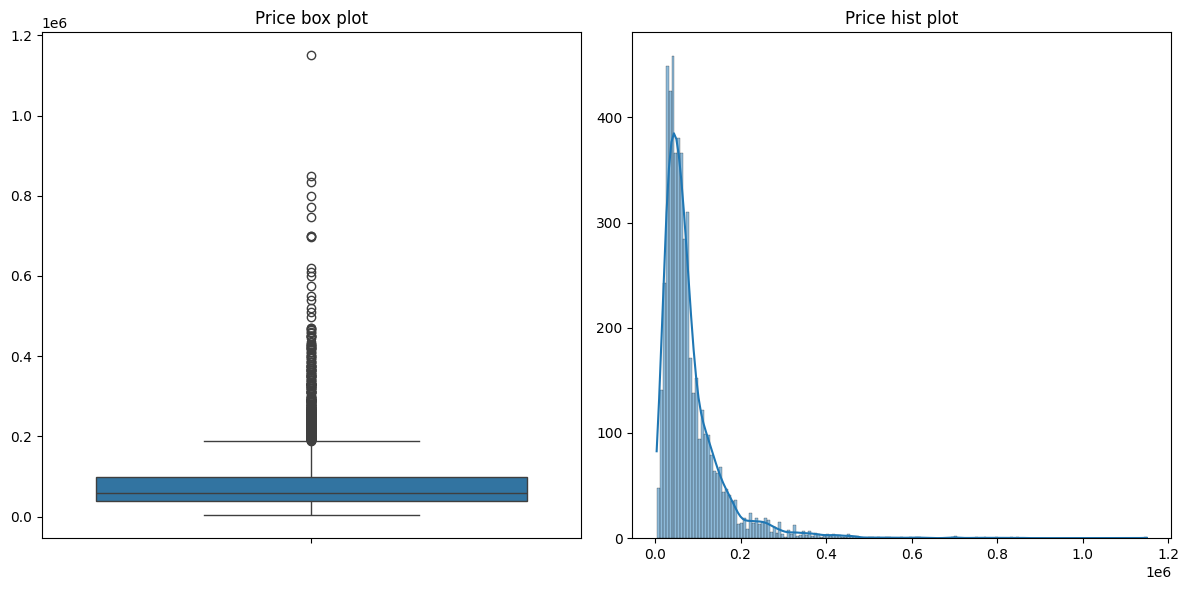

In [49]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(df['Price'], ax=ax_box)
ax_box.set(title=f'{"Price"} box plot', xlabel='', ylabel='')    
sns.histplot(df['Price'], ax=ax_hist, kde=True)
ax_hist.set(title=f'{"Price"} hist plot', xlabel='', ylabel='')
plt.tight_layout()
plt.show()

**Numerical**

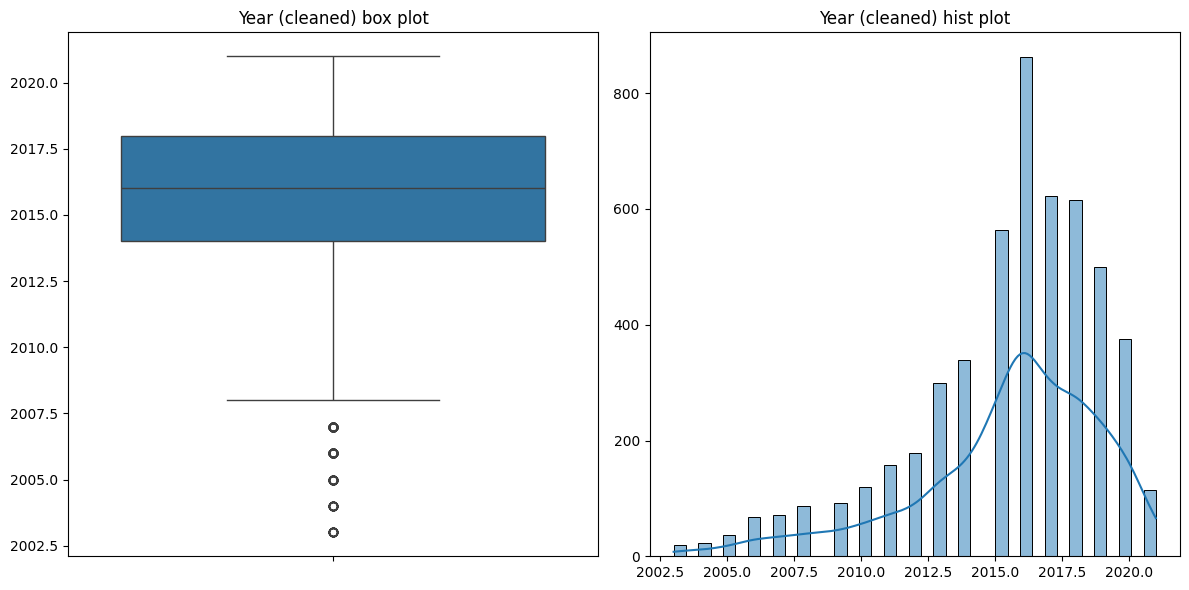

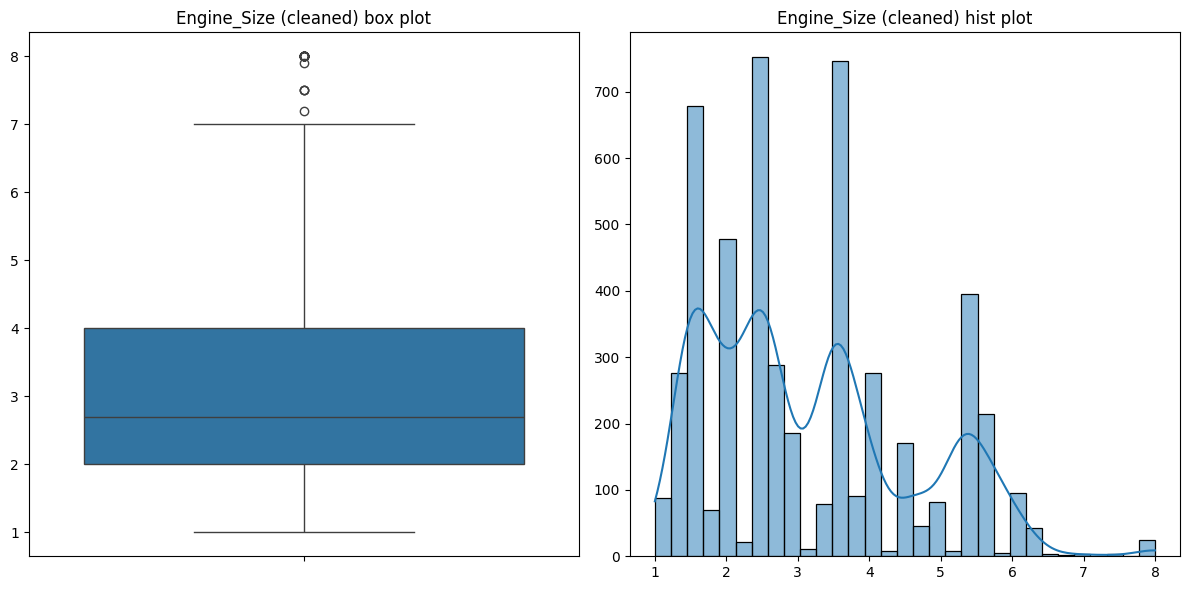

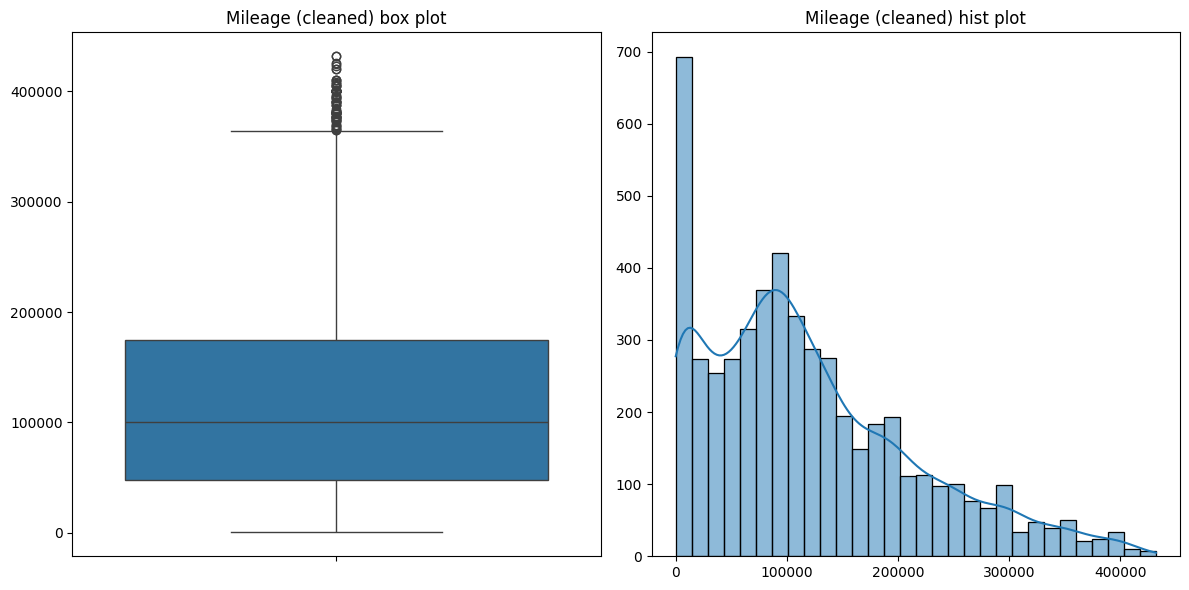

In [50]:
listTemp = ['Year','Engine_Size', 'Mileage']

for i in listTemp:
    fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))
    sns.boxplot(df[i], ax=ax_box)
    ax_box.set(title=f'{i} (cleaned) box plot', xlabel='', ylabel='')    
    sns.histplot(df[i], ax=ax_hist, kde=True)
    ax_hist.set(title=f'{i} (cleaned) hist plot', xlabel='', ylabel='')
    plt.tight_layout()
    plt.show()

**Categorical**

In [51]:
listTemp = df.select_dtypes(exclude=[float, int]).columns
for i in listTemp:
    print(f"Jumlah Unique Value dari {i}: {df[i].nunique()}")
    print(df[i].unique(), "\n")

Jumlah Unique Value dari Make: 56
['Chrysler' 'Nissan' 'Hyundai' 'Honda' 'Toyota' 'Chevrolet' 'Mercedes'
 'MINI' 'Lexus' 'Land Rover' 'GMC' 'Mazda' 'Ford' 'Kia' 'Genesis'
 'Cadillac' 'Geely' 'MG' 'Jeep' 'INFINITI' 'Dodge' 'Ferrari' 'Great Wall'
 'Jaguar' 'GAC' 'Renault' 'Suzuki' 'Peugeot' 'Changan' 'HAVAL' 'BMW'
 'Rolls-Royce' 'Porsche' 'Mitsubishi' 'Subaru' 'Zhengzhou' 'Daihatsu'
 'FAW' 'Chery' 'Lincoln' 'Isuzu' 'Audi' 'Bentley' 'Aston Martin'
 'Volkswagen' 'Fiat' 'Mercury' 'Hummer' 'BYD' 'Maserati' 'Other' 'Lifan'
 'Foton' 'Victory Auto' 'Škoda' 'Iveco'] 

Jumlah Unique Value dari Type: 337
['C300' 'Sunny' 'Elantra' 'Accord' 'Land Cruiser' 'Impala' 'Yaris' 'Camry'
 'Patrol' 'Tahoe' 'CLA' 'E' 'Corolla' 'Copper' 'Prado' 'Civic' 'Furniture'
 'RX' 'Range Rover' 'Yukon' 'Bus Urvan' 'Aurion' 'Malibu' 'Rav4' 'CX9'
 'Expedition' 'ES' 'Cadenza' 'Tucson' 'Platinum' 'G80' 'Accent' 'Sonata'
 'LX' 'GX' 'Azera' 'CT-S' 'EC7' 'ZS' 'Kona' 'Grand Cherokee' 'S' 'M'
 'Charger' 'Taurus' 'GTB 599 Fiorano'

## Data Analysis

untuk membantu menaikkan revenue ada beberapa hal yang dapat dilakukan melalaui analysis. 
1. Price Distribution
2. Brand Popularity & price average by Region
3. Gear Type & price average by Region
4. Fuel Type & price average by Region
5. Mileage and Age Relationship

### Price Distribution

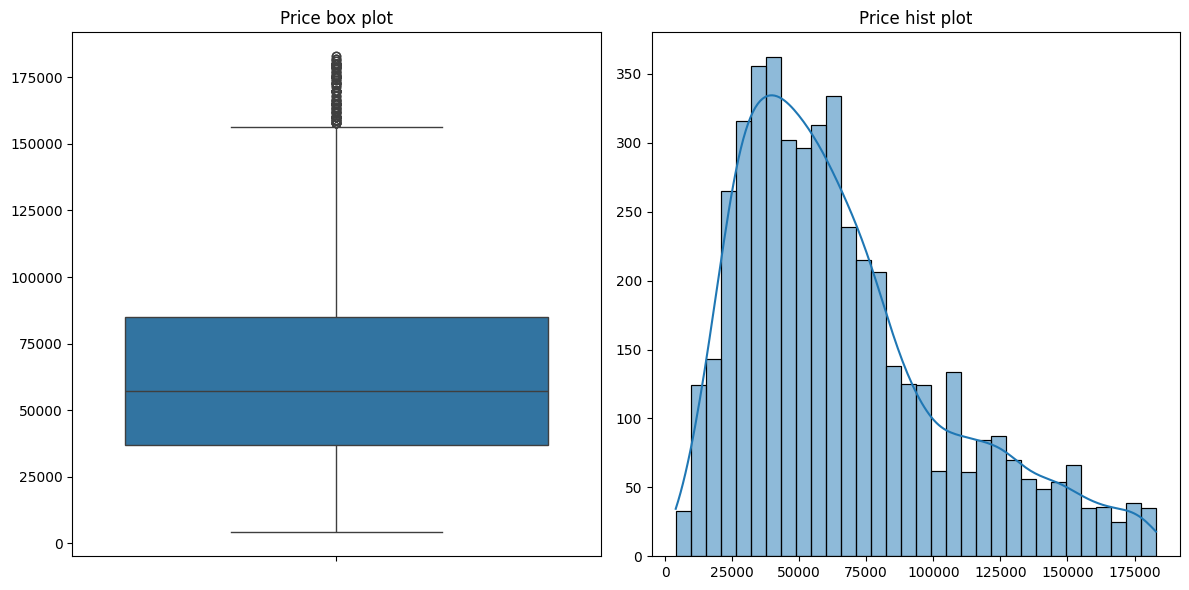

Median :57000.0
Max : 183000
Min : 4000


In [52]:
dfWOOutlierPrice = df[~((df['Price'] > 184375.0) | (df['Price'] < -110625.0))]
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(dfWOOutlierPrice['Price'], ax=ax_box)
ax_box.set(title=f'{"Price"} box plot', xlabel='', ylabel='')    
sns.histplot(dfWOOutlierPrice['Price'], ax=ax_hist, kde=True)
ax_hist.set(title=f'{"Price"} hist plot', xlabel='', ylabel='')
plt.tight_layout()
plt.show()

print(f"Median :{dfWOOutlierPrice['Price'].median()}")
print(f"Max : {dfWOOutlierPrice['Price'].max()}")
print(f"Min : {dfWOOutlierPrice['Price'].min()}")

**Insight** : Tanpa Outlier *Price*  berada di range 500 - 183000, dengan Median pada 56254.  
**Recomendation** : mentargetkan segment *Price* yang berbeda dengan marketing strategies yang disesuaikan.   
**Action Item** : Mensegementasikan Price menjadi 3 yaitu, Budget atau dibawah 60000, Mid-Range atau diantara 60000 sampai dengan 185000 (batas outlier), dan High-end atau diatas 185000  
   
penerapan segementasi ini dapat dilakukan dengan rekomendasi mobil yang muncul pada home page tergantung pada history pencarian mobil customer pada Platform syarah.com.   
effectnya merupakan,    
- Meningkatkan Customer Satisfaction : Customer hanya diberikan rekomendasi pada sekitar price budgetnya. 
- Kemudahan Query Platform : Platform tidak perlu meload keseluruhan data melainkan hanya data yang ada pada segment yang telah ditentukan. 
- (Keuntungan revenue untuk perusahaan.)

keuntungan perusahaan : 
- menaikan revenue karena customer satisfaction yang tinggi, akan menambah/mempercepat transaksi pada platform

### Brand Popularity and Region, rural, sub-urban, urban

In [53]:
df['Region'].unique()

array(['Riyadh', 'Jeddah', 'Dammam', 'Al-Medina', 'Qassim', 'Makkah',
       'Jazan', 'Aseer', 'Al-Ahsa', 'Taef', 'Sabya', 'Al-Baha', 'Khobar',
       'Tabouk', 'Yanbu', 'Hail', 'Al-Namas', 'Jubail', 'Al-Jouf', 'Abha',
       'Hafar Al-Batin', 'Najran', 'Arar', 'Besha', 'Qurayyat', 'Sakaka',
       'Wadi Dawasir'], dtype=object)

In [54]:
data = {
    'Riyadh' : 4137280, 
    'Jeddah' : 2833169, 
    'Dammam' : 5125254, 
    'Al-Medina' : 2389452, 
    'Qassim' : 1336179,
    'Makkah': 2389452,
    'Jazan': 1404997, 
    'Aseer' : 2024285, 
    'Al-Ahsa' : 908366, 
    'Taef' : 885474, 
    'Sabya' : 228375, 
    'Al-Baha' : 339174, 
    'Khobar' : 455541,
    'Tabouk' : 886036, 
    'Yanbu' : 250244, 
    'Hail' : 746406, 
    'Al-Namas' : 53908, 
    'Jubail' : 224430, 
    'Al-Jouf' : 595822, 
    'Abha' : 1093705,
    'Hafar Al-Batin' : 338636, 
    'Najran' : 592300, 
    'Arar' : 373577, 
    'Besha' : 202096, 
    'Qurayyat' : 125090, 
    'Sakaka' : 595822,
    'Wadi Dawasir' : 92631,
}

df_region_population = pd.DataFrame(list(data.items()), columns=['Region', 'Population'])
df_region_population

Region  Population
0           Riyadh     4137280
1           Jeddah     2833169
2           Dammam     5125254
3        Al-Medina     2389452
4           Qassim     1336179
5           Makkah     2389452
6            Jazan     1404997
7            Aseer     2024285
8          Al-Ahsa      908366
9             Taef      885474
10           Sabya      228375
11         Al-Baha      339174
12          Khobar      455541
13          Tabouk      886036
14           Yanbu      250244
15            Hail      746406
16        Al-Namas       53908
17          Jubail      224430
18         Al-Jouf      595822
19            Abha     1093705
20  Hafar Al-Batin      338636
21          Najran      592300
22            Arar      373577
23           Besha      202096
24        Qurayyat      125090
25          Sakaka      595822
26    Wadi Dawasir       92631

Population Data gathered from,    
https://en.wikipedia.org/wiki/Provinces_of_Saudi_Arabia    
https://en.wikipedia.org/wiki/Subdivisions_of_Saudi_Arabia   

Dataset tidak memiliki jumlah Populasi atau categorisasi yang berkaitan dengan Regionnya. Region pada dataset juga tidak sama dengan region yang tertulis pada database official region dari saudi arabia, dimana pada officialnya hanya terdapat 13 region (provinces of sadu arabia) sementara terdapat 27 unique region pada dataset. data populasi diambil dari beberapa sumber yang berbeda, karena tidak ada satu sumber yang memiliki keseluruhan data populasi, mengingat sebagian adalah provinsi dan sebagian adalah city/kota. 

In [55]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_region_population[['Population']])
df_region_population['Cluster'] = kmeans.labels_
category_map = {0: 'rural', 1: 'urban', 2: 'suburban'}
df_region_population['Category'] = df_region_population['Cluster'].map(category_map)

In [56]:
df_region_population.sort_values(by='Population', ascending=False)

Region  Population  Cluster  Category
2           Dammam     5125254        1     urban
0           Riyadh     4137280        1     urban
1           Jeddah     2833169        2  suburban
3        Al-Medina     2389452        2  suburban
5           Makkah     2389452        2  suburban
7            Aseer     2024285        2  suburban
6            Jazan     1404997        2  suburban
4           Qassim     1336179        2  suburban
19            Abha     1093705        0     rural
8          Al-Ahsa      908366        0     rural
13          Tabouk      886036        0     rural
9             Taef      885474        0     rural
15            Hail      746406        0     rural
25          Sakaka      595822        0     rural
18         Al-Jouf      595822        0     rural
21          Najran      592300        0     rural
12          Khobar      455541        0     rural
22            Arar      373577        0     rural
11         Al-Baha      339174        0     rural
20  Hafar Al-Batin      338636        0     rural
14           Yanbu      250244        0     rural
10           Sabya      228375        0     rural
17          Jubail      224430        0     rural
23           Besha      202096        0     rural
24        Qurayyat      125090        0     rural
26    Wadi Dawasir       92631        0     rural
16        Al-Namas       53908        0     rural

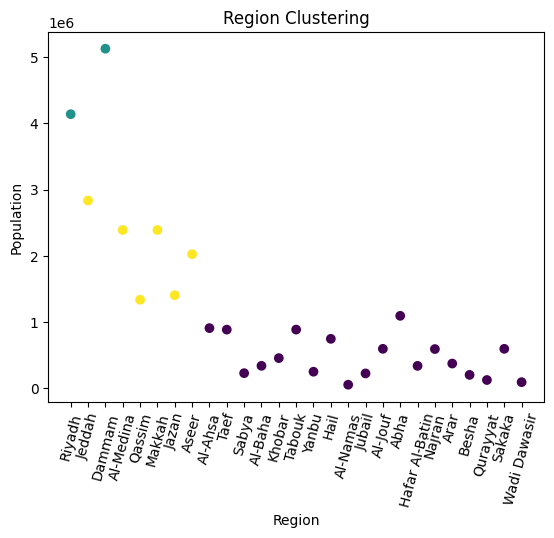

In [57]:
plt.scatter(df_region_population['Region'], df_region_population['Population'], c=df_region_population['Cluster'])
plt.xlabel('Region')
plt.ylabel('Population')
plt.title('Region Clustering')
plt.xticks(rotation=75)
plt.show()

KMeans Clustering digunakan untuk men-categorisasikan region dengan nilai populasinya, 3 category digunakan untuk merepresentasikan Urban, Sub-Urban, dan Rural. dimana dari hasil clustering, Urban memiliki populasi diatas, +-400.000, Sub-Urban berada pada +- 120.000 sampai dengan 300.000, dan Rural berada pada populasi dibawah +- 120.000.

In [58]:
merged_df = pd.merge(df, df_region_population[['Region', 'Category']], on='Region', how='left')
merged_df

Make     Type  Year Origin   Color    Options  Engine_Size  \
0      Chrysler     C300  2018  Saudi   Black       Full          5.7   
1        Nissan    Sunny  2019  Saudi  Silver   Standard          1.5   
2       Hyundai  Elantra  2019  Saudi    Grey   Standard          1.6   
3       Hyundai  Elantra  2019  Saudi  Silver  Semi Full          2.0   
4         Honda   Accord  2018  Saudi    Navy       Full          1.5   
...         ...      ...   ...    ...     ...        ...          ...   
5139        Kia  Sorento  2006  Saudi    Navy       Full          3.5   
5140       Audi       A6  2015  Saudi  Silver       Full          3.0   
5141  Chevrolet   Camaro  2010  Saudi  Silver       Full          3.6   
5142     Nissan   Altima  2011  Saudi  Silver       Full          2.5   
5143   Cadillac    Other  2013  Saudi   White       Full          3.6   

     Fuel_Type  Gear_Type  Mileage     Region   Price  Category  
0          Gas  Automatic   103000     Riyadh  114000     urban  
1          Gas  Automatic    72418     Riyadh   27500     urban  
2          Gas  Automatic   114154     Riyadh   43000     urban  
3          Gas  Automatic    41912     Riyadh   59500     urban  
4          Gas  Automatic    39000     Riyadh   72000     urban  
...        ...        ...      ...        ...     ...       ...  
5139       Gas     Manual   257000     Dammam   15000     urban  
5140       Gas  Automatic    77000     Riyadh   75000     urban  
5141       Gas  Automatic   150000     Riyadh   53000     urban  
5142       Gas  Automatic    18500      Aseer   22000  suburban  
5143       Gas  Automatic   256000  Al-Medina   40000  suburban  

[5144 rows x 13 columns]

In [59]:
grouped_df = merged_df.groupby(by=['Category', 'Make'])[['Price']].count().reset_index()
grouped_df.rename(columns={'Price': 'Count'}, inplace=True)
top_5_df = grouped_df.groupby('Category')[['Category', 'Make', 'Count']].apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)
top_5_df

Category       Make  Count
0      rural     Toyota    156
1      rural       Ford     64
2      rural  Chevrolet     55
3      rural    Hyundai     51
4      rural        Kia     34
5   suburban     Toyota    308
6   suburban    Hyundai    158
7   suburban       Ford    105
8   suburban     Nissan     84
9   suburban  Chevrolet     67
10     urban     Toyota    678
11     urban    Hyundai    474
12     urban       Ford    317
13     urban  Chevrolet    276
14     urban     Nissan    223

In [60]:
print(f"jumlah top 5 : {top_5_df['Count'].sum()}")
print(f"Jumlah top 5 percentage dari keseluruhan {(top_5_df['Count'].sum()/df.shape[0]) * 100:.2f}%")

jumlah top 5 : 3050
Jumlah top 5 percentage dari keseluruhan 59.29%


**Insight** : 5 Terbesar (Toyota, Hyundai, Ford, Chevrolet, Nissan)berjumlah 3107, yaitu 59.41% dari keseluran total.  
**Recomendation** : Fokus pada Brand ini untuk promosi dan penampilan pada homepage.   
**Action Item** : Buat bagian khusus dan penawaran promosi untuk Brand populer pada Platform tergantung pada region mana platform di access. 

Pemasaran pada Brand populer menjangkau lebih banyak potential customer, dibandingkan dengan mempromosikan Brand yang tidak banyak dikenal oleh orang-orang.  

keuntungan perusahaan :   
customer marketing strategies dapat menaikkan platform brand dan customer loyalty dan membantu customer retantion dan juga mempercepat penjualan. 5% increase pada customer retention dapat menjadi 25% 95% increase pada profit, existing buyer mengeluarkan upto 300% dari yang baru, memakan 5x lipat lebih banyak uang untuk mendapatkan customer baru daripada me-retain yang sudah ada.[^1]

[^1]: https://xgrowth.com.au/blogs/what-is-customer-marketing

### Type Popularity and Region, rural, sub-urban, urban with price average

In [61]:
grouped_df = merged_df.groupby(by=['Category', 'Type'])[['Price']].count().reset_index()
grouped_df.rename(columns={'Price': 'Count'}, inplace=True)
top_3_df = grouped_df.groupby('Category')[['Category', 'Type', 'Count']].apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
top_3_df

Category          Type  Count
0     rural         Hilux     27
1     rural         Camry     22
2     rural  Land Cruiser     20
3  suburban         Camry     50
4  suburban        Sonata     40
5  suburban       Elantra     35
6     urban        Accent    166
7     urban  Land Cruiser    118
8     urban        Taurus    113

**Insight** : 7 Terbesar (Accent, Land Cruiser, Taurus, Camry, Sonata, Elantra, Hilux)    
**Recomendation** : Fokus pada Make ini untuk promosi dan penampilan pada homepage pada categorynya masing-masing.      
**Action Item** : Buat bagian khusus dan penawaran promosi untuk Type populer pada Platform tergantung pada region mana platform di access. 

Pemasaran pada Type populer menjangkau lebih banyak potential customer dari region-region tersebut, dibandingkan dengan mempromosikan Brand yang tidak popular oleh pada region tersebut.  

keuntungan perusahaan :   
perusahaan juga dapat menjuaal feature specified region advertisement, untuk seller yang mau memasang ads/promoted untuk mobilnya pada suatu region tersendiri

customer marketing strategies dapat menaikkan platform brand dan customer loyalty dan membantu customer retantion dan juga mempercepat penjualan. 5% increase pada customer retention dapat menjadi 25% 95% increase pada profit, existing buyer mengeluarkan upto 300% dari yang baru, memakan 5x lipat lebih banyak uang untuk mendapatkan customer baru daripada me-retain yang sudah ada.[^1]

[^1]: https://xgrowth.com.au/blogs/what-is-customer-marketing

### Gear Type and Region, rural urban with price average

In [62]:
grouped_df = merged_df.groupby(by=['Category', 'Gear_Type']).agg(
    Price_Average=('Price', 'mean'),
    Count=('Price', 'count')
).reset_index()
total_counts = grouped_df.groupby('Category')['Count'].sum().reset_index(name='Total_Count')
grouped_df = pd.merge(grouped_df, total_counts, on='Category')
grouped_df['Percentage'] = (grouped_df['Count'] / grouped_df['Total_Count']) * 100
grouped_df.drop(columns=['Total_Count'])

Category  Gear_Type  Price_Average  Count  Percentage
0     rural  Automatic   68290.767635    482   87.003610
1     rural     Manual   49013.888889     72   12.996390
2  suburban  Automatic   78267.011844   1182   90.366972
3  suburban     Manual   49833.325397    126    9.633028
4     urban  Automatic   89326.957891   3016   91.895186
5     urban     Manual   63289.424812    266    8.104814

In [63]:
print(f"rata-rata perbedaan harga automatic dan manual : {(grouped_df[grouped_df['Gear_Type'] == 'Automatic']['Price_Average'].sum()-grouped_df[grouped_df['Gear_Type'] == 'Manual']['Price_Average'].sum())/3:.2f}")

rata-rata perbedaan harga automatic dan manual : 24582.70


**Insight** : Automatic memiliki Percentase yang lebih tinggi dari manual pada setiap category, yaitu rural 87.3%, suburban 90.4%, dan urban 91.9%. rata-rata harga automatic juga leibh mahal 23.186,87 dari harga manual. (mengutamakan kenyamanan meskipun secara price lebih mahal)  
**Recomendation** : marketing gear_type tertentu tergantung pada harga yang dicari customer.    
**Action Item** : menampilkan lebih banyak mobil bekas dengan automatic Gear_Type pada customer yang mencari dengan budget diatas price_average mobil manual pada setiap categorynya. dan menawarkan lebih banyak mobil bekas dengan manual Gear_Type pada customer yang mencari dengan budget dibawah price_average mobil mnual pada setiap categorynya.      
    
Data akan lebih berguna jika ditambahkan dengan dataset populasi per region dan dataset history pencarian/query pada platform. dengan penambahan data ini, persebaran data mobil bekas setiap region category-nya akan lebih akurat, dan dataset history pencarian/query akan membantu mengetahui apa yang sebenarnya dicari oleh customer pada region-region tersebut, dan kita bisa menyesuaikan mobil yang di-highlight pada platform sesuai dengan regionnya

keuntungan perusahaan :  
customer marketing strategies dapat menaikkan platform brand dan customer loyalty dan membantu customer retantion dan juga mempercepat penjualan. 5% increase pada customer retention dapat menjadi 25% 95% increase pada profit, existing buyer mengeluarkan upto 300% dari yang baru, memakan 5x lipat lebih banyak uang untuk mendapatkan customer baru daripada me-retain yang sudah ada.[^1]

[^1]: https://xgrowth.com.au/blogs/what-is-customer-marketing

### Fuel Type and Region, rural urban with price average

In [64]:
grouped_df = merged_df.groupby(by=['Fuel_Type', 'Category']).agg(
    Price_Average=('Price', 'mean'),
    Count=('Price', 'count')
).reset_index()
total_counts = grouped_df.groupby('Fuel_Type')['Count'].sum().reset_index(name='Total_Count')
grouped_df = pd.merge(grouped_df, total_counts, on='Fuel_Type')
grouped_df['Percentage'] = (grouped_df['Count'] / grouped_df['Total_Count']) * 100
grouped_df.drop(columns=['Total_Count']).sort_values(by=['Fuel_Type', 'Category', 'Count'], ascending=[True, False, False])

Fuel_Type  Category  Price_Average  Count  Percentage
2    Diesel     urban  106357.142857     42   53.164557
1    Diesel  suburban   90816.666667     30   37.974684
0    Diesel     rural   90142.857143      7    8.860759
5       Gas     urban   86836.453927   3234   63.976261
4       Gas  suburban   75181.196708   1276   25.242334
3       Gas     rural   64668.165138    545   10.781405
8    Hybrid     urban  158166.666667      6   60.000000
7    Hybrid  suburban   67450.000000      2   20.000000
6    Hybrid     rural  285000.000000      2   20.000000

**Insight** : mobil bekas dengan Fuel_Type gas jauh lebih populer pada area urban, Fuel_Type Diesel populer pada Urban dan Sub-Urban, dan Fuel_Type Hybrid pada area urban.     
**Recomendation** : men-update tampilan listing mobil bekas pada region populernya.    
**Action Item** : dengan memberikan badge, flaire, atau label pada mobil dengan Fuel_Type selain gas.      
   
customer yang mencari mobil dengan type tersebut akan lebih mudah menemukan mobil yang diinginkan, mobil yang lebih populer di daerahnya akan lebih cepat laku. yang dapat meningkatkan customer satisfaction, dan conversion rate.

keuntungan perusahaan :  
customer marketing strategies dapat menaikkan platform brand dan customer loyalty dan membantu customer retantion dan juga mempercepat penjualan. 5% increase pada customer retention dapat menjadi 25% 95% increase pada profit, existing buyer mengeluarkan upto 300% dari yang baru, memakan 5x lipat lebih banyak uang untuk mendapatkan customer baru daripada me-retain yang sudah ada.[^1]

[^1]: https://xgrowth.com.au/blogs/what-is-customer-marketing

### Mileage and Age Relationship

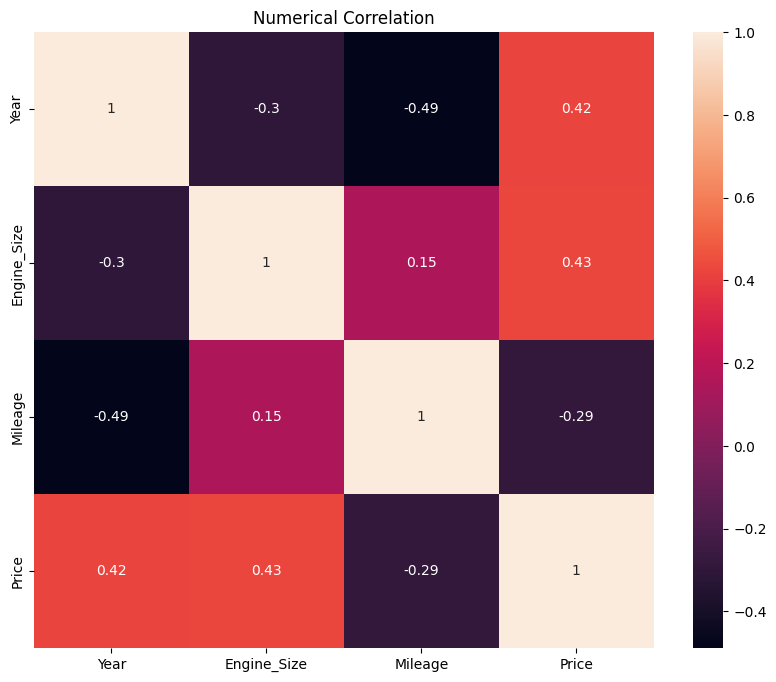

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method='spearman', numeric_only=True), annot=True)
plt.title('Numerical Correlation')
plt.show()

**Insight** : ada Strong Negative Correlatioin antara Umur Mobil dan Mileagenya, mobil yang lebih tua cenderung memiliki milage yang lebih besar)    
**Recommendation** : Highlight mobil dengan jarak tempuh rendah sebagai nilai jual untuk model lama.     
**Action Item** : mengimplementasikan filter dan label mobil "Mileage Rendah" dan "Produksi Baru".    
   
mobil yang lebih tua dengan mileage yang lebih rendah berarti mobil tersebut adalah mobil secondary / jarang digunakan yang biasanya lebih banyak dicari daripada mobil dengan mileage yang tinggi. 

keuntungan perusahaan :     
customer yang mencari mobil pada tahun tertentu tidak perlu mencari dengan susah dari listing untuk mencari mobil yang memiliki mileage yang rendah. menaikkan/mempercepat transaksi pada platform

customer marketing strategies dapat menaikkan platform brand dan customer loyalty dan membantu customer retantion dan juga mempercepat penjualan. 5% increase pada customer retention dapat menjadi 25% 95% increase pada profit, existing buyer mengeluarkan upto 300% dari yang baru, memakan 5x lipat lebih banyak uang untuk mendapatkan customer baru daripada me-retain yang sudah ada.[^1]

[^1]: https://xgrowth.com.au/blogs/what-is-customer-marketing


### Mileage and Age Relation dengan Popular Type

In [66]:
median_mileage = merged_df['Mileage'].median()
merged_df['Mileage_Category'] = merged_df['Mileage'].apply(lambda x: 'high' if x > median_mileage else 'low')
merged_df

Make     Type  Year Origin   Color    Options  Engine_Size  \
0      Chrysler     C300  2018  Saudi   Black       Full          5.7   
1        Nissan    Sunny  2019  Saudi  Silver   Standard          1.5   
2       Hyundai  Elantra  2019  Saudi    Grey   Standard          1.6   
3       Hyundai  Elantra  2019  Saudi  Silver  Semi Full          2.0   
4         Honda   Accord  2018  Saudi    Navy       Full          1.5   
...         ...      ...   ...    ...     ...        ...          ...   
5139        Kia  Sorento  2006  Saudi    Navy       Full          3.5   
5140       Audi       A6  2015  Saudi  Silver       Full          3.0   
5141  Chevrolet   Camaro  2010  Saudi  Silver       Full          3.6   
5142     Nissan   Altima  2011  Saudi  Silver       Full          2.5   
5143   Cadillac    Other  2013  Saudi   White       Full          3.6   

     Fuel_Type  Gear_Type  Mileage     Region   Price  Category  \
0          Gas  Automatic   103000     Riyadh  114000     urban   
1          Gas  Automatic    72418     Riyadh   27500     urban   
2          Gas  Automatic   114154     Riyadh   43000     urban   
3          Gas  Automatic    41912     Riyadh   59500     urban   
4          Gas  Automatic    39000     Riyadh   72000     urban   
...        ...        ...      ...        ...     ...       ...   
5139       Gas     Manual   257000     Dammam   15000     urban   
5140       Gas  Automatic    77000     Riyadh   75000     urban   
5141       Gas  Automatic   150000     Riyadh   53000     urban   
5142       Gas  Automatic    18500      Aseer   22000  suburban   
5143       Gas  Automatic   256000  Al-Medina   40000  suburban   

     Mileage_Category  
0                high  
1                 low  
2                high  
3                 low  
4                 low  
...               ...  
5139             high  
5140              low  
5141             high  
5142              low  
5143             high  

[5144 rows x 14 columns]

In [67]:
grouped_df = merged_df.groupby(by=['Mileage_Category', 'Category']).agg(
    Price_Average=('Price', 'mean'),
    Count=('Price', 'count')
).reset_index()
total_counts = grouped_df.groupby('Category')['Count'].sum().reset_index(name='Total_Count')
grouped_df = pd.merge(grouped_df, total_counts, on='Category')
grouped_df['Percentage'] = (grouped_df['Count'] / grouped_df['Total_Count']) * 100
grouped_df.drop(columns=['Total_Count']).sort_values(by=['Category', 'Mileage_Category','Count'], ascending=[False, False, False])

Mileage_Category  Category  Price_Average  Count  Percentage
5              low     urban  108719.619865   1631   49.695308
2             high     urban   65974.192611   1651   50.304692
4              low  suburban   92228.851748    715   54.663609
1             high  suburban   55391.193929    593   45.336391
3              low     rural   81943.750000    248   44.765343
0             high     rural   52689.869281    306   55.234657

In [68]:
median_mileage = merged_df['Year'].median()
merged_df['Age_Category'] = merged_df['Year'].apply(lambda x: 'newer' if x > median_mileage else 'older')
grouped_df = merged_df.groupby(by=['Age_Category', 'Category']).agg(
    Price_Average=('Price', 'mean'),
    Count=('Price', 'count')
).reset_index()
total_counts = grouped_df.groupby('Category')['Count'].sum().reset_index(name='Total_Count')
grouped_df = pd.merge(grouped_df, total_counts, on='Category')
grouped_df['Percentage'] = (grouped_df['Count'] / grouped_df['Total_Count']) * 100
grouped_df.drop(columns=['Total_Count']).sort_values(by=['Category', 'Age_Category', 'Count'], ascending=[False, False, False])

Age_Category  Category  Price_Average  Count  Percentage
5        older     urban   70978.580367   1742   53.077392
2        newer     urban  105584.678571   1540   46.922608
4        older  suburban   56592.231362    778   59.480122
1        newer  suburban  103324.247170    530   40.519878
3        older     rural   53788.035264    397   71.660650
0        newer     rural   96122.929936    157   28.339350

**Insight** : percentage jumlah mileage tinggi dan rendah tidak jauh berbeda pada setiap categorynya. tetapi harga averagenya miliki perbedaan sekitar 40%. percentage age baru dan lama tidak memiliki perbedaan yang significan pada urban, memiliki perbedaan yang significan pada suburban, dan sangat significant pada  rural, dengan perbedaan harga average yang sama dengan mileage     
**recomendation** : men-highlight mobil-mobil tertentu pada platform dengan mileage dan age terhadap price-average dan popularitynya sesuai dengan criteria categorynya     
**action** : Highlight mobil dengan jarak tempuh rendah sebagai nilai jual untuk model lama, terutama dengan harga yang cenderung murah (dibawah price_average-nya). highlight mobil dengan age tua dengan mileage pada suburban dan rural untuk customer yang mencari dibawah price average cateogorynya, dan highlight mobil dengan age yang rendah jika customer mencari mobil bekas dengan harga yang lebih tinggi dari price_averagenya. 

keuntungan perusahaan :     
used cars suggestion yang lebih disesuaikan pada type customer tertentu akan dapat menaikkan/mempercepat transaksi pada platform

customer marketing strategies dapat menaikkan platform brand dan customer loyalty dan membantu customer retantion dan juga mempercepat penjualan. 5% increase pada customer retention dapat menjadi 25% 95% increase pada profit, existing buyer mengeluarkan upto 300% dari yang baru, memakan 5x lipat lebih banyak uang untuk mendapatkan customer baru daripada me-retain yang sudah ada.[^1]

[^1]: https://xgrowth.com.au/blogs/what-is-customer-marketing

## Machine Learning

### Feature Engineering

In [69]:
df = pd.read_csv("./Datasets/UsedCarsSA_Clean_EN_v2.csv")
df

Make     Type  Year Origin   Color    Options  Engine_Size  \
0      Chrysler     C300  2018  Saudi   Black       Full          5.7   
1        Nissan    Sunny  2019  Saudi  Silver   Standard          1.5   
2       Hyundai  Elantra  2019  Saudi    Grey   Standard          1.6   
3       Hyundai  Elantra  2019  Saudi  Silver  Semi Full          2.0   
4         Honda   Accord  2018  Saudi    Navy       Full          1.5   
...         ...      ...   ...    ...     ...        ...          ...   
5139        Kia  Sorento  2006  Saudi    Navy       Full          3.5   
5140       Audi       A6  2015  Saudi  Silver       Full          3.0   
5141  Chevrolet   Camaro  2010  Saudi  Silver       Full          3.6   
5142     Nissan   Altima  2011  Saudi  Silver       Full          2.5   
5143   Cadillac    Other  2013  Saudi   White       Full          3.6   

     Fuel_Type  Gear_Type  Mileage     Region   Price  
0          Gas  Automatic   103000     Riyadh  114000  
1          Gas  Automatic    72418     Riyadh   27500  
2          Gas  Automatic   114154     Riyadh   43000  
3          Gas  Automatic    41912     Riyadh   59500  
4          Gas  Automatic    39000     Riyadh   72000  
...        ...        ...      ...        ...     ...  
5139       Gas     Manual   257000     Dammam   15000  
5140       Gas  Automatic    77000     Riyadh   75000  
5141       Gas  Automatic   150000     Riyadh   53000  
5142       Gas  Automatic    18500      Aseer   22000  
5143       Gas  Automatic   256000  Al-Medina   40000  

[5144 rows x 12 columns]

Make dan Type, memiliki hubungan one to many, setiap satu Make memiliki satu atau lebih Type, dan setiap Type memiliki satu Make (2 atau lebih Type yang berbeda bisa memiliki Make yang sama), jadi tidak dibutuhkan dua2nya pada saat training model.    

maka training akan dipisah menjadi dua yaitu dengan Make dan dengan Type. 


**Table**

In [70]:
columns = ['model_name', 'MedAE_train', 'MedAE_Test', 'MedAE_diff', 'MAE_train', 'MAE_Test', 'MAE_diff', "MAPE_train", "MAPE_Test"]
scores = pd.DataFrame(columns=columns)
scores

Empty DataFrame
Columns: [model_name, MedAE_train, MedAE_Test, MedAE_diff, MAE_train, MAE_Test, MAE_diff, MAPE_train, MAPE_Test]
Index: []

pembuatan table untuk menyimpan score dari hasil machine learning

#### Feature and Target

In [71]:
X = df.drop(columns=['Type','Price'])
X_Type = df.drop(columns=['Make','Price'])
y = df['Price']

feature yang digunakan sebagai base (X) adalah 'Make', 'Year', 'Origin', 'Color', 'Options', 'Engine_Size', 'Fuel_Type', 'Gear_Type', 'Mileage', 'Region'.     
feature yang digunakan sebagai secondary (X_Type) adalah 'Type', 'Year', 'Origin', 'Color', 'Options', 'Engine_Size', 'Fuel_Type', 'Gear_Type', 'Mileage', 'Region'.     
dan Targetnya adalah Price  

#### Data Splitting

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

data di split menjadi train dan test dengan ration 80/20

### Preprocessor (Encoding and Scalling)

Ordinal Encoder : 'Options' (memiliki tingkatan)  
One Hot Encoder : 'Make', 'Origin', 'Color', 'Fuel_Type', 'Gear_Type', 'Region'   
MinMax Scaller : 'Year', 'Engine_Size' (outlier lebih kecil)    
Robust Scaler : 'Mileage' (Kemungkinan outlier lebih besar)   

'option' menggunakan ordinal encoder karena memiliki tingkatan     
'Make', 'Origin', 'Color', 'Fuel_Type', 'Gear_Type', 'Region' menggunakan one hot encoder karena merupakan nominal column tanpa tingkatan khusus     
'Year', 'Engine_Size' menggunakan MinMax Scaller karena memiliki outlier yang tidak terlalu significan    
'Mileage' Menggunakan Robust Scaller karena memilik outlier yang lebih significant


In [73]:
df.columns

Index(['Make', 'Type', 'Year', 'Origin', 'Color', 'Options', 'Engine_Size',
       'Fuel_Type', 'Gear_Type', 'Mileage', 'Region', 'Price'],
      dtype='object')

In [74]:
df['Options'].unique()
categories = [['Full', 'Semi Full', 'Standard']]
categories

[['Full', 'Semi Full', 'Standard']]

In [75]:
preprocessor = ColumnTransformer([
    ('OE', OrdinalEncoder(categories=categories), ['Options']),
    ('OH', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), ['Make', 'Origin', 'Color', 'Fuel_Type', 'Gear_Type', 'Region']),
    ('MMS', MinMaxScaler(), ['Year', 'Engine_Size']),
    ('RS', RobustScaler(), ['Mileage']),
])

In [76]:
preprocessornd = ColumnTransformer([
    ('OE', OrdinalEncoder(categories=categories), ['Options']),
    ('OH', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['Make', 'Origin', 'Color', 'Fuel_Type', 'Gear_Type', 'Region']),
    ('MMS', MinMaxScaler(), ['Year', 'Engine_Size']),
    ('RS', RobustScaler(), ['Mileage']),
])

dibuat 2 type preprocessor, yaitu:
- 'preprocessor' : menggunakan drop first pada onehot encodernya untuk linear type regression.
- 'preprocessornd' : tidak melakukan drop first pada onehot encodernya untuk tree dan knn type regression.

### benchmarking K-Fold untuk data train

In [77]:
models = [LinearRegression(),Lasso(max_iter=10000),Ridge(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(), GradientBoostingRegressor(), XGBRegressor(), LGBMRegressor(force_col_wise=True)]
score=[]
rata=[]
std=[]

for i in models:
    skfold=KFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',preprocessornd),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='r2', error_score='raise')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Linear Regression', 'Lasso', 'Ridge', 'KNeighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM'],'mean r2_score':rata,'sdev':std}).set_index('model').sort_values(by='mean r2_score',ascending=False)

[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 3292, number of used features: 57
[LightGBM] [Info] Start training from score 81233.339004
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 3292, number of used features: 56
[LightGBM] [Info] Start training from score 81823.508202
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 3292, number of used features: 59
[LightGBM] [Info] Start training from score 81121.190158
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 3292, number of used features: 57
[LightGBM] [Info] Start training from score 81739.145504
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 3292, number of used features: 58
[LightGBM] [Info] Start training from score 83023.508505


mean r2_score          sdev
model                                         
XGBoost             8.029199e-01  5.301794e-02
Gradient Boosting   7.807280e-01  2.556755e-02
Random Forest       7.802272e-01  4.483978e-02
LightGBM            7.585750e-01  2.689774e-02
Decision Tree       6.371733e-01  7.457678e-02
Ridge               6.351353e-01  3.180095e-02
Lasso               6.304666e-01  3.857085e-02
KNeighbors          5.117892e-01  3.315475e-02
Linear Regression  -2.437243e+22  2.772504e+22

ini berarti,    
XGBoost memiliki performance terbaik dengan score r2 8.029199e-01 dengan sdev 5.301794e-02  
tetapi, Gradient Boosting lebih stabil dengan score r2 7.836736e-01	sdev 2.670416e-02   
untuk mengecheck ulang maka kita akan mencoba semua model dan beserta tuningnya   

### Linear Regression

In [78]:
LinRegModel = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
LinRegModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor', LinearRegression())])

In [79]:
y_pred_tr = LinRegModel.predict(X_train)
y_pred_ts = LinRegModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr)
medae_test = median_absolute_error(y_test, y_pred_ts)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr)
mae_test = mean_absolute_error(y_test, y_pred_ts)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr) 
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts)

row = {
    'model_name': 'Linear Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)
               
print(f"""
    Linear Regression : 
    train MedAE score : {median_absolute_error(y_train, y_pred_tr)}
    test MedAE score : {median_absolute_error(y_test, y_pred_ts)}
    train MAE Score : {mean_absolute_error(y_train, y_pred_tr)}]
    test MAE Score : {mean_absolute_error(y_test, y_pred_ts)}

""")


    Linear Regression : 
    train MedAE score : 17163.55585795411
    test MedAE score : 17882.96927191387
    train MAE Score : 25868.136143443084]
    test MAE Score : 26805.46547842542




c:\Users\Kenneth Aleanda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Kenneth Aleanda\AppData\Local\Temp\ipykernel_13716\2315667342.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)


Linear regression dilakukan untuk mendapatkan base model.    
Linear Regression adalah technique machine learning datsar yang memodelkan relationship sebuah dependent variable kepada satu atau lebih independent variables menggunakan sebuah linear equation (𝑦 = 𝑚𝑥 + 𝑐)   
y : garis titik yang dihasilkan (dependant variable)
m : slope dari garis (coefficient)
x : independent variable
c : intercept (nilai y jika x adalah 0)

### Lasso

In [80]:
LassoModel = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

# Fit the pipeline on the training data
LassoModel.fit(X_train, y_train)

c:\Users\Kenneth Aleanda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e+12, tolerance: 2.366e+09
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor', Lasso())])

In [81]:
y_pred_tr_lasso = LassoModel.predict(X_train)
y_pred_ts_lasso = LassoModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_lasso)
medae_test = median_absolute_error(y_test, y_pred_ts_lasso)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_lasso)
mae_test = mean_absolute_error(y_test, y_pred_ts_lasso)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_lasso)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_lasso)

row = {
    'model_name': 'Lasso Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Lasso Regression : 
    train MedAE score : {median_absolute_error(y_train, y_pred_tr_lasso)}
    test MedAE score : {median_absolute_error(y_test, y_pred_ts_lasso)}
    train MAE Score : {mean_absolute_error(y_train, y_pred_tr_lasso)}]
    test MAE Score : {mean_absolute_error(y_test, y_pred_ts_lasso)}

""")


    Lasso Regression : 
    train MedAE score : 17177.966083178457
    test MedAE score : 17929.534893591714
    train MAE Score : 25903.128548913526]
    test MAE Score : 26672.404684813526




c:\Users\Kenneth Aleanda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Lasso model adalah linear regression method dengan regularisasi L1, yang menambahkan penalty yang setara dengan nilai absulot dari kebesaran keofisiennya. hal ini membuat model yang lebih sederhana dengan lebih sedikit parameter, yang secara efektif menjalankan pemilihan feature dengan mengecilkan beberapa koefisiesn meanjadi nol. model lasso berguna terutama untuk data berdimensi tinggi. 

### Ridge

In [82]:
RidgeModel = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Fit the pipeline on the training data
RidgeModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor', Ridge())])

In [83]:
y_pred_tr_ridge = RidgeModel.predict(X_train)
y_pred_ts_ridge = RidgeModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_ridge)
medae_test = median_absolute_error(y_test, y_pred_ts_ridge)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_ridge)
mae_test = mean_absolute_error(y_test, y_pred_ts_ridge)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_ridge)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_ridge)

row = {
    'model_name': 'Ridge Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Ridge Regression : 
    train MedAE score : {median_absolute_error(y_train, y_pred_tr_ridge)}
    test MedAE score : {median_absolute_error(y_test, y_pred_ts_ridge)}
    train MAE Score : {mean_absolute_error(y_train, y_pred_tr_ridge)}]
    test MAE Score : {mean_absolute_error(y_test, y_pred_ts_ridge)}

""")


    Ridge Regression : 
    train MedAE score : 17222.980452781034
    test MedAE score : 17759.086262209574
    train MAE Score : 25986.591389079887]
    test MAE Score : 26426.63140527583




c:\Users\Kenneth Aleanda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


ridge model adalah metode regresi linear dengan regularisasi L2, yang menambahkan penalti dengan kuadrat besarnya koefisien. in imembantu mencegah overfitting dengan mengecilkan koefisien, tidak seperti lasso, model ini tidak menetapkan koefisien apapun secara tepat ke nol, sehingga cocok untuk situasi dimana berpotensi penting. sama seperti lasso, ridge juga digunakan untuk meningkatkan kinerja dan interpretablitas model, terutama dalam data berdimensi tinggi. 


### Tuned Lasso

In [84]:
TunedLassoModel = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

skf = KFold(n_splits=5, random_state=42, shuffle=True)
param_Lasso = { 
    'regressor__alpha': [0.001, 0.01, 1, 10, 20, 30, 40, 50, 100], 
    'regressor__max_iter': [1000, 2000, 3000],
}

scoring = { 'Median_Absolute_Error': 'neg_median_absolute_error', 'Mean_Absolute_Error': 'neg_mean_absolute_error' }

GSCV_Lasso = GridSearchCV(TunedLassoModel, param_Lasso, cv=skf, scoring=scoring, refit='Median_Absolute_Error', n_jobs=12)
GSCV_Lasso.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('OE',
                                                                         OrdinalEncoder(categories=[['Full',
                                                                                                     'Semi '
                                                                                                     'Full',
                                                                                                     'Standard']]),
                                                                         ['Options']),
                                                                        ('OH',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Make',
                                                                          'Origin',
                                                                          'Color',
                                                                          'Fuel_Type',
                                                                          'Gear_Type',
                                                                          'Regi...
                                                                         MinMaxScaler(),
                                                                         ['Year',
                                                                          'Engine_Size']),
                                                                        ('RS',
                                                                         RobustScaler(),
                                                                         ['Mileage'])])),
                                       ('regressor', Lasso())]),
             n_jobs=12,
             param_grid={'regressor__alpha': [0.001, 0.01, 1, 10, 20, 30, 40,
                                              50, 100],
                         'regressor__max_iter': [1000, 2000, 3000]},
             refit='Median_Absolute_Error',
             scoring={'Mean_Absolute_Error': 'neg_mean_absolute_error',
                      'Median_Absolute_Error': 'neg_median_absolute_error'})

tuning parameter pada lasso,
- alpha : constant yang mengalikan L1, mengendalikan kekuatan regularisasi, harus berupa float non-negatif
- max_iter : maximum number of iteration

In [85]:
GSCV_Lasso.best_score_

np.float64(-17117.02664250385)

In [86]:
pd.DataFrame(GSCV_Lasso.cv_results_)[pd.DataFrame(GSCV_Lasso.cv_results_)['rank_test_Median_Absolute_Error'] == 1][['params', 'mean_test_Median_Absolute_Error']]

params  \
18  {'regressor__alpha': 40, 'regressor__max_iter'...   
19  {'regressor__alpha': 40, 'regressor__max_iter'...   
20  {'regressor__alpha': 40, 'regressor__max_iter'...   

    mean_test_Median_Absolute_Error  
18                    -17117.026643  
19                    -17117.026643  
20                    -17117.026643

In [87]:
best_params = {k.split('__')[1]: v for k, v in GSCV_Lasso.best_params_.items() if k.split('__')[1] in ['alpha', 'max_iter']}

BestLassoModel = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(**best_params))
])

# Fit the pipeline on the training data
BestLassoModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor', Lasso(alpha=40))])

In [88]:
y_pred_tr_lasso_b = BestLassoModel.predict(X_train)
y_pred_ts_lasso_b = BestLassoModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_lasso_b)
medae_test = median_absolute_error(y_test, y_pred_ts_lasso_b)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_lasso_b)
mae_test = mean_absolute_error(y_test, y_pred_ts_lasso_b)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_lasso_b)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_lasso_b)

row = {
    'model_name': 'Tuned Lasso Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Tuned Lasso Regression : 
    train MedAE score : {median_absolute_error(y_train, y_pred_tr_lasso_b)}
    test MedAE score : {median_absolute_error(y_test, y_pred_ts_lasso_b)}
    train MAE Score : {mean_absolute_error(y_train, y_pred_tr_lasso_b)}
    test MAE Score : {mean_absolute_error(y_test, y_pred_ts_lasso_b)}
""")


    Tuned Lasso Regression : 
    train MedAE score : 17070.61637298396
    test MedAE score : 17406.943248186144
    train MAE Score : 26016.832968175677
    test MAE Score : 26033.05068214685



c:\Users\Kenneth Aleanda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Tuned Ridge

In [89]:
TunedRidgeModel = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

skf = KFold(n_splits=5, random_state=42, shuffle=True)
param_Ridge = { 
    'regressor__alpha': [0.001, 0.01, 1, 10, 20, 30, 40, 50, 100], 
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 
    'regressor__random_state' : [42],
}

scoring = { 'Median_Absolute_Error': 'neg_median_absolute_error', 'Mean_Absolute_Error': 'neg_mean_absolute_error' }

GSCV_Ridge = GridSearchCV(TunedRidgeModel, param_Ridge, cv=skf, scoring=scoring, refit='Median_Absolute_Error', n_jobs=12)
GSCV_Ridge.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('OE',
                                                                         OrdinalEncoder(categories=[['Full',
                                                                                                     'Semi '
                                                                                                     'Full',
                                                                                                     'Standard']]),
                                                                         ['Options']),
                                                                        ('OH',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Make',
                                                                          'Origin',
                                                                          'Color',
                                                                          'Fuel_Type',
                                                                          'Gear_Type',
                                                                          'Regi...
                                                                         ['Mileage'])])),
                                       ('regressor', Ridge())]),
             n_jobs=12,
             param_grid={'regressor__alpha': [0.001, 0.01, 1, 10, 20, 30, 40,
                                              50, 100],
                         'regressor__random_state': [42],
                         'regressor__solver': ['auto', 'svd', 'cholesky',
                                               'lsqr', 'sparse_cg', 'sag',
                                               'saga']},
             refit='Median_Absolute_Error',
             scoring={'Mean_Absolute_Error': 'neg_mean_absolute_error',
                      'Median_Absolute_Error': 'neg_median_absolute_error'})

tuning parameter pada ridge,
- alpha : constant yang mengalikan L2, mengendalikan kekuatan regularisasi, harus berupa float non-negatif
- max_solver : solver yang digunakan untuk computasi,
    - auto : memilih secara otomatis
    - svd : sigular value decomposition dari X untuk menghitung coefficient ridge. solver palinng stabil, tetapi rada lambat. 
    - cholesky : menggunakan scipy.linalg.solve function untuk mendapatkan solusi closed-form
    - lsqr : menggunakan scipy.sparse.linalg.lsqr. sover paling cepat dan menggunakan iterative procedure. 
    - sparse_cg : menggunakan scipy.sparse.linalg.cd. sebagai algorithm iterative, solver yang lebih appropriate untuk large-scale data
    - sag : iterative procedure yang biasanya lebih cepat dari sover lainnya ketika sample dan featurenya besar. 
    - saga : improved version of sag
- random_state : digunakan oleh sover tertentu untuk men-shuffle data

In [90]:
GSCV_Ridge.best_score_

np.float64(-17395.470344029214)

In [91]:
pd.DataFrame(GSCV_Ridge.cv_results_)[pd.DataFrame(GSCV_Ridge.cv_results_)['rank_test_Median_Absolute_Error'] == 1][['params', 'mean_test_Median_Absolute_Error']]

params  \
17  {'regressor__alpha': 1, 'regressor__random_sta...   

    mean_test_Median_Absolute_Error  
17                    -17395.470344

In [92]:
best_params = {k.split('__')[1]: v for k, v in GSCV_Ridge.best_params_.items() if k.split('__')[1] in ['alpha', 'solver', 'random_state']}

BestRidgeModel = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(**best_params))
])

# Fit the pipeline on the training data
BestRidgeModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor', Ridge(alpha=1, random_state=42, solver='lsqr'))])

In [93]:
y_pred_tr_ridge_b = BestRidgeModel.predict(X_train)
y_pred_ts_ridge_b = BestRidgeModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_ridge_b)
medae_test = median_absolute_error(y_test, y_pred_ts_ridge_b)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_ridge_b)
mae_test = mean_absolute_error(y_test, y_pred_ts_ridge_b)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_ridge_b)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_ridge_b)

row = {
    'model_name': 'Tuned Ridge Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Tuned Ridge Regression : 
    train MedAE score : {median_absolute_error(y_train, y_pred_tr_ridge_b)}
    test MedAE score : {median_absolute_error(y_test, y_pred_ts_ridge_b)}
    train MAE Score : {mean_absolute_error(y_train, y_pred_tr_ridge_b)}
    test MAE Score : {mean_absolute_error(y_test, y_pred_ts_ridge_b)}

""")


    Tuned Ridge Regression : 
    train MedAE score : 17209.38362093616
    test MedAE score : 17791.123674249742
    train MAE Score : 25986.053165553498
    test MAE Score : 26428.96342221617




c:\Users\Kenneth Aleanda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Decision Tree Regressor

In [94]:
DecisionTreeModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', DecisionTreeRegressor())
])

# Fit the pipeline on the training data
DecisionTreeModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor', DecisionTreeRegressor())])

decision tree regressor adalah non parametric supervised learning algorithm untuk regresi. bekerja dengna membagi data menjadi subset-subset sesuai dengan feature value, membentuk tree like model keputusan. setiap internal node merepresentasikan sebuah keputusan berdasarkan feature, dan setiap leaf node merepresentasikan, output yang di produksi.goalnya adalah untuk meminimalisir mean squared error untuk mendapatkan best fit. 

In [95]:
y_pred_tr_dt = DecisionTreeModel.predict(X_train)
y_pred_ts_dt = DecisionTreeModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_dt)
medae_test = median_absolute_error(y_test, y_pred_ts_dt)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_dt)
mae_test = mean_absolute_error(y_test, y_pred_ts_dt)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_dt)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_dt)

row = {
    'model_name': 'Decisision Tree Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Decisision Tree Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    Decisision Tree Regression : 
    train MedAE score : 0.0
    test MedAE score : 10000.0
    train MAE Score : 16.52490886998785
    test MAE Score : 20595.629737609328



In [96]:
scores

model_name   MedAE_train    MedAE_Test    MedAE_diff  \
0           Linear Regression  17163.555858  17882.969272    719.413414   
1            Lasso Regression  17177.966083  17929.534894    751.568810   
2            Ridge Regression  17222.980453  17759.086262    536.105809   
3      Tuned Lasso Regression  17070.616373  17406.943248    336.326875   
4      Tuned Ridge Regression  17209.383621  17791.123674    581.740053   
5  Decisision Tree Regression      0.000000  10000.000000  10000.000000   

      MAE_train      MAE_Test      MAE_diff  MAPE_train  MAPE_Test  
0  25868.136143  26805.465478    937.329335    0.490054   0.540004  
1  25903.128549  26672.404685    769.276136    0.490174   0.535215  
2  25986.591389  26426.631405    440.040016    0.489210   0.524304  
3  26016.832968  26033.050682     16.217714    0.489805   0.513174  
4  25986.053166  26428.963422    442.910257    0.489167   0.524417  
5     16.524909  20595.629738  20579.104829    0.000259   0.266006

### Tuned Decision Tree Regressor

In [97]:
TunedDecisionTreeModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', DecisionTreeRegressor())
])

param_DTR = {
    'regressor__max_depth': list(range(2, 150)) + [None],
    'regressor__min_samples_split': range(2, 21),
    'regressor__min_samples_leaf': range(1,21),
    'regressor__random_state' : [42],
}

scoring = { 'Median_Absolute_Error': 'neg_median_absolute_error', 'Mean_Absolute_Error': 'neg_mean_absolute_error' }

GSCV_DT = GridSearchCV(TunedDecisionTreeModel, param_DTR, cv=skf, scoring=scoring, refit='Median_Absolute_Error', n_jobs=12)
GSCV_DT.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('OE',
                                                                         OrdinalEncoder(categories=[['Full',
                                                                                                     'Semi '
                                                                                                     'Full',
                                                                                                     'Standard']]),
                                                                         ['Options']),
                                                                        ('OH',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Make',
                                                                          'Origin',
                                                                          'Color',
                                                                          'Fuel_Type',
                                                                          'Gear_Type',
                                                                          'Region']),
                                                                        ('MMS',...
             param_grid={'regressor__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16, 17,
                                                  18, 19, 20, 21, 22, 23, 24,
                                                  25, 26, 27, 28, 29, 30, 31, ...],
                         'regressor__min_samples_leaf': range(1, 21),
                         'regressor__min_samples_split': range(2, 21),
                         'regressor__random_state': [42]},
             refit='Median_Absolute_Error',
             scoring={'Mean_Absolute_Error': 'neg_mean_absolute_error',
                      'Median_Absolute_Error': 'neg_median_absolute_error'})

tuning parameter pada decision tree,
- max_depth : kedalaman(depth) maximum dari tree. 
- min_samples_split : jumlah minimum sample yang diperlukan untuk memisahkan sebuah internal node
- min_samples_leaf : jumlah minimum sample yang diperlukan untuk membuat sebuah leaf node
- random_state : mengontrol ke-random-an dari estimator. 

In [98]:
GSCV_DT.best_score_

np.float64(-9686.238095238095)

In [99]:
pd.DataFrame(GSCV_DT.cv_results_)[pd.DataFrame(GSCV_DT.cv_results_)['rank_test_Median_Absolute_Error'] == 1][['params', 'mean_test_Median_Absolute_Error']]

params  \
5714  {'regressor__max_depth': 17, 'regressor__min_s...   

      mean_test_Median_Absolute_Error  
5714                     -9686.238095

In [100]:
best_params = {k.split('__')[1]: v for k, v in GSCV_DT.best_params_.items() if k.split('__')[1] in ['max_depth', 'min_samples_split', 'min_samples_leaf', 'random_state']}

BestDecisionTreeModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', DecisionTreeRegressor(**best_params))
])

# Fit the pipeline on the training data
BestDecisionTreeModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=17, min_samples_split=16,
                                       random_state=42))])

In [101]:
y_pred_tr_dt_b = BestDecisionTreeModel.predict(X_train)
y_pred_ts_dt_b = BestDecisionTreeModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_dt_b)
medae_test = median_absolute_error(y_test, y_pred_ts_dt_b)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_dt_b)
mae_test = mean_absolute_error(y_test, y_pred_ts_dt_b)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_dt_b)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_dt_b)

row = {
    'model_name': 'Tuned Decision Tree Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Tuned Decision Tree Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    Tuned Decision Tree Regression : 
    train MedAE score : 6123.076923076922
    test MedAE score : 10291.666666666657
    train MAE Score : 11503.572326209276
    test MAE Score : 19860.152106257425



### KNeighbor Regressor

In [102]:
KNeighborsModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', KNeighborsRegressor())
])

# Fit the pipeline on the training data
KNeighborsModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor', KNeighborsRegressor())])

decision tree regressor adalah non parametric supervised learning algorithm untuk regresi. bekerja dengan memprediksi target value dengan average dari value neighbor terdekat. jumlah dari neighbor (K) adalah parameter crucial dalam memutuskan model performance. algorithm mengukur jarak antara data point untuk menemukan neighbor terdekat

In [103]:
y_pred_tr_kn = KNeighborsModel.predict(X_train)
y_pred_ts_kn = KNeighborsModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_kn)
medae_test = median_absolute_error(y_test, y_pred_ts_kn)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_kn)
mae_test = mean_absolute_error(y_test, y_pred_ts_kn)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_kn)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_kn)

row = {
    'model_name': 'K Neighbor Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    K Neighbor Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    K Neighbor Regression : 
    train MedAE score : 13600.0
    test MedAE score : 19000.0
    train MAE Score : 23743.28150668287
    test MAE Score : 30211.1286686103



### Tuned KNeigbor Regressor

In [104]:
TunedKNeighborModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', KNeighborsRegressor())
])

param_KN = {
    'regressor__n_neighbors': range(1, 150, 2), 
    'regressor__weights': ['uniform', 'distance'], 
    'regressor__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'regressor__p': [1, 2]
}

scoring = { 'Median_Absolute_Error': 'neg_median_absolute_error', 'Mean_Absolute_Error': 'neg_mean_absolute_error' }

GSCV_KN = GridSearchCV(TunedKNeighborModel, param_KN, cv=skf, scoring=scoring, refit='Median_Absolute_Error', n_jobs=12)
GSCV_KN.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('OE',
                                                                         OrdinalEncoder(categories=[['Full',
                                                                                                     'Semi '
                                                                                                     'Full',
                                                                                                     'Standard']]),
                                                                         ['Options']),
                                                                        ('OH',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Make',
                                                                          'Origin',
                                                                          'Color',
                                                                          'Fuel_Type',
                                                                          'Gear_Type',
                                                                          'Region']),
                                                                        ('MMS',...
                                       ('regressor', KNeighborsRegressor())]),
             n_jobs=12,
             param_grid={'regressor__algorithm': ['auto', 'ball_tree',
                                                  'kd_tree', 'brute'],
                         'regressor__n_neighbors': range(1, 150, 2),
                         'regressor__p': [1, 2],
                         'regressor__weights': ['uniform', 'distance']},
             refit='Median_Absolute_Error',
             scoring={'Mean_Absolute_Error': 'neg_mean_absolute_error',
                      'Median_Absolute_Error': 'neg_median_absolute_error'})

tuning parameter pada KNeighbor,
- n_neighbors : jumlah neighbor yang digunakan
- weights : weight yang digunakan untuk prediksi
    - uniform : semua poin memiliki berat yang sama. 
    - distance : point memiliki berat yang berbeda tergantung pada beratnya. (semakin dekat semakin berpengaruh)
- algorithm : algorithm yang digunakan untuk menghitung neighbor terdekat, 
    - auto : secara otomatis mencoba memutuskan algoritma yang paling tebpat berdasarkan nilai yang diberikan ke fit method.
    - ball_tree : menggunakan sklearn.neighbors.BallTree algorithm
    - kd_tree : menggunakan sklearn. neighbors.KDTree algorithm
    - brute : menggunakan bruteforce search.  
- p : power parameter untuk Minkowski metric, 
    - 1 : manhattan_distance
    - 2 : euclidean_distance

In [105]:
GSCV_KN.best_score_

np.float64(-15831.308450088618)

In [106]:
pd.DataFrame(GSCV_KN.cv_results_)[pd.DataFrame(GSCV_KN.cv_results_)['rank_test_Median_Absolute_Error'] == 1][['params', 'mean_test_Median_Absolute_Error']]

params  \
305  {'regressor__algorithm': 'ball_tree', 'regress...   
605  {'regressor__algorithm': 'kd_tree', 'regressor...   

     mean_test_Median_Absolute_Error  
305                     -15831.30845  
605                     -15831.30845

In [107]:
best_params = {k.split('__')[1]: v for k, v in GSCV_KN.best_params_.items() if k.split('__')[1] in ['n_neighbors', 'weights', 'algorithm', 'p']}

BestKNeighborModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', KNeighborsRegressor(**best_params))
])

# Fit the pipeline on the training data
BestKNeighborModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=3, p=1,
                                     weights='distance'))])

In [108]:
y_pred_tr_kn_b = BestKNeighborModel.predict(X_train)
y_pred_ts_kn_b = BestKNeighborModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_kn_b)
medae_test = median_absolute_error(y_test, y_pred_ts_kn_b)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_kn_b)
mae_test = mean_absolute_error(y_test, y_pred_ts_kn_b)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_kn_b)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_kn_b)

row = {
    'model_name': 'Tuned KNeighbor Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Tuned KNeighbor Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    Tuned KNeighbor Regression : 
    train MedAE score : 0.0
    test MedAE score : 17447.863260999366
    train MAE Score : 16.52490886998785
    test MAE Score : 28507.019427807176



### Ensemble - Random Forest Regressor

In [109]:
RandomForestModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', RandomForestRegressor())
])

# Fit the pipeline on the training data
RandomForestModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor', RandomForestRegressor())])

random forest regressor model adalah learning methode  ensembles yang membangun beberapa decistion tree pada saat training dan menghasilkan rata-rata prediksi dari setiap tree untuk nilai regresinya. metode ini menggunakan konsep bagging(boostrap aggregating) untuk membuat beragam subset dari dataset asli dan menyesuaikan setiap subset dari dataset asli dan menyesuaikan setiap subset ke decision tree, mengurangi resiki overfitting dan meningkatkan generalisasi. tehnique ini robust, dapat digunakan pada large dataset, dan memberikan akurasi tinggi dengan menangkap pattern complex dari data. forest regressor digunakan secara luat karena fleksibilitasnya dan kemampuannya untuk menangani fitur numerik dan kategoris secara efektif

In [110]:
y_pred_tr_rf = RandomForestModel.predict(X_train)
y_pred_ts_rf = RandomForestModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_rf)
medae_test = median_absolute_error(y_test, y_pred_ts_rf)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_rf)
mae_test = mean_absolute_error(y_test, y_pred_ts_rf)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_rf)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_rf)

row = {
    'model_name': 'Random Forest Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}
# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Random Forest Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    Random Forest Regression : 
    train MedAE score : 2985.0
    test MedAE score : 8365.0
    train MAE Score : 6063.30469397674
    test MAE Score : 16448.934961821466



### Tuned Ensemble - Random Forest Regressor

In [111]:
TunedRandomForestModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', RandomForestRegressor())
])

param_RF = {
    'regressor__n_estimators': range(1, 200, 2), 
    'regressor__max_depth': list(range(1, 51, 2)) + [None], 
    'regressor__min_samples_split': range(2, 21), 
    'regressor__min_samples_leaf': range(1, 21), 
    'regressor__max_features': [1.0, 'sqrt', 'log2']
}

scoring = { 'Median_Absolute_Error': 'neg_median_absolute_error', 'Mean_Absolute_Error': 'neg_mean_absolute_error' }

RSCV_RF = RandomizedSearchCV(TunedRandomForestModel, param_RF, cv=skf, scoring=scoring, refit='Median_Absolute_Error', n_jobs=12, error_score='raise')
RSCV_RF.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('OE',
                                                                               OrdinalEncoder(categories=[['Full',
                                                                                                           'Semi '
                                                                                                           'Full',
                                                                                                           'Standard']]),
                                                                               ['Options']),
                                                                              ('OH',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['Make',
                                                                                'Origin',
                                                                                'Color',
                                                                                'Fuel_Type',
                                                                                'Gea...
                                                                 27, 29, 31, 33,
                                                                 35, 37, 39, 41,
                                                                 43, 45, 47, 49,
                                                                 None],
                                        'regressor__max_features': [1.0, 'sqrt',
                                                                    'log2'],
                                        'regressor__min_samples_leaf': range(1, 21),
                                        'regressor__min_samples_split': range(2, 21),
                                        'regressor__n_estimators': range(1, 200, 2)},
                   refit='Median_Absolute_Error',
                   scoring={'Mean_Absolute_Error': 'neg_mean_absolute_error',
                            'Median_Absolute_Error': 'neg_median_absolute_error'})

tuning parameter pada random forest,
- n_estimators : jumlah tree pada forest
- max_depth : kedalaman(depth) maximum dari tree. 
- min_samples_split : jumlah minimum sample yang diperlukan untuk memisahkan sebuah internal node
- min_samples_leaf : jumlah minimum sample yang diperlukan untuk membuat sebuah leaf node
- max_features : jumlah feature yang di pertimbangkan setiap ketika mencari spilt terbaik
    - 1.0 : max_features = jumlah feature yang ada
    - sqrt : max_features = sqrt(jumlah feature)
    - log2 : max_features = log2(jumlah feature)

In [112]:
RSCV_RF.best_score_

np.float64(-10108.058314442567)

In [113]:
pd.DataFrame(RSCV_RF.cv_results_)[pd.DataFrame(RSCV_RF.cv_results_)['rank_test_Median_Absolute_Error'] == 1][['params', 'mean_test_Median_Absolute_Error']]

params  \
1  {'regressor__n_estimators': 163, 'regressor__m...   

   mean_test_Median_Absolute_Error  
1                    -10108.058314

In [114]:
best_params = {k.split('__')[1]: v for k, v in RSCV_RF.best_params_.items() if k.split('__')[1] in ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features']}

BestRandomForestModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', RandomForestRegressor(**best_params))
])

# Fit the pipeline on the training data
BestRandomForestModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=7,
                                       min_samples_split=17,
                                       n_estimators=163))])

In [115]:
y_pred_tr_rf_b = BestRandomForestModel.predict(X_train)
y_pred_ts_rf_b = BestRandomForestModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_rf_b)
medae_test = median_absolute_error(y_test, y_pred_ts_rf_b)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_rf_b)
mae_test = mean_absolute_error(y_test, y_pred_ts_rf_b)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_rf_b)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_rf_b)

row = {
    'model_name': 'Tuned Random Forest Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Tuned Random Forest Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    Tuned Random Forest Regression : 
    train MedAE score : 8166.187723683928
    test MedAE score : 10199.754894736609
    train MAE Score : 15906.168202656498
    test MAE Score : 19100.126726130617



### Ensemble - Gradient Boosting Regressor

In [116]:
GradientBoostingModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', GradientBoostingRegressor())
])

# Fit the pipeline on the training data
GradientBoostingModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor', GradientBoostingRegressor())])

gradient boosting regressor adalah machine learning algorithm yang powerful. bekerja dengan sekumpulan weak prediction model, biasanyaa decision tree, secara bertahap. dengan menambahkan tree secara sequential dimana setiap tree memperbaiki error pada tree sebelumnya, ini meminimalisir loff sunction dan menaikkan akurasi prediksi, process iterasi ini memperbolehkan model untuk menangkap complex patterns dan interaksi dari data. gradient boosting regressor sangat effective untuk predictive moddelling dan biasanya digunakan karena kemampuannya memeberikan high accuracy dan robustness terhadap overfitting. 

In [117]:
y_pred_tr_gb = GradientBoostingModel.predict(X_train)
y_pred_ts_gb = GradientBoostingModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_gb)
medae_test = median_absolute_error(y_test, y_pred_ts_gb)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_gb)
mae_test = mean_absolute_error(y_test, y_pred_ts_gb)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_gb)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_gb)

row = {
    'model_name': 'Gradient Boosting Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Gradient Boosting Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    Gradient Boosting Regression : 
    train MedAE score : 10814.545301146893
    test MedAE score : 11464.155689323394
    train MAE Score : 16955.195279994066
    test MAE Score : 18668.111458434814



### Tuned - Gradient Boosting Regressor

In [118]:
TunedGradientBoostingModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

param_GB = {
    'regressor__n_estimators': randint(50, 300), 
    'regressor__learning_rate': uniform(0.01, 0.2), 
    'regressor__max_depth': randint(3, 10), 
    'regressor__min_samples_split': randint(2, 21), 
    'regressor__min_samples_leaf': randint(1, 21), 
    'regressor__subsample': uniform(0.8, 0.2), 
    'regressor__max_features': ['log2', 'sqrt',]
}

scoring = { 'Median_Absolute_Error': 'neg_median_absolute_error', 'Mean_Absolute_Error': 'neg_mean_absolute_error' }

RSCV_GB = RandomizedSearchCV(TunedGradientBoostingModel, param_GB, cv=skf, scoring=scoring, refit='Median_Absolute_Error', n_jobs=16)
RSCV_GB.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('OE',
                                                                               OrdinalEncoder(categories=[['Full',
                                                                                                           'Semi '
                                                                                                           'Full',
                                                                                                           'Standard']]),
                                                                               ['Options']),
                                                                              ('OH',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['Make',
                                                                                'Origin',
                                                                                'Color',
                                                                                'Fuel_Type',
                                                                                'Gear_Type',
                                                                                'Region']),
                                                                              (...
                                        'regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000206E5565ED0>,
                                        'regressor__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000206E5565C00>},
                   refit='Median_Absolute_Error',
                   scoring={'Mean_Absolute_Error': 'neg_mean_absolute_error',
                            'Median_Absolute_Error': 'neg_median_absolute_error'})

tuning parameter pada Gradient Boosting,
- n_estimators : jumlah boosting stages yang akan dilakukan
- learning_rate : learning rate mengecilkan kontribusi setiap pohon dengan learning_rate. ada trade-off antara learning rate dan n_estimator
- max_depth : kedalaman(depth) maximum dari tree. 
- min_samples_split : jumlah minimum sample yang diperlukan untuk memisahkan sebuah internal node
- min_samples_leaf : jumlah minimum sample yang diperlukan untuk membuat sebuah leaf node
- subsambple : fraction dari sample yang digunakan untuk fitting individual base learners. 
- max_features : jumlah feature yang di pertimbangkan setiap ketika mencari spilt terbaik
    - sqrt : max_features = sqrt(jumlah feature)
    - log2 : max_features = log2(jumlah feature)

In [119]:
RSCV_GB.best_score_

np.float64(-10769.914905889891)

In [120]:
pd.DataFrame(RSCV_GB.cv_results_)[pd.DataFrame(RSCV_GB.cv_results_)['rank_test_Median_Absolute_Error'] == 1][['params', 'mean_test_Median_Absolute_Error']]

params  \
2  {'regressor__learning_rate': 0.155442999932782...   

   mean_test_Median_Absolute_Error  
2                    -10769.914906

In [121]:
best_params = {k.split('__')[1]: v for k, v in RSCV_GB.best_params_.items() if k.split('__')[1] in ['n_neighbors', 'learning_rate', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'subsample', 'max_features']}

BestTunedGradientBoostingModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', GradientBoostingRegressor(**best_params))
])

# Fit the pipeline on the training data
BestTunedGradientBoostingModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=np.float64(0.1554429999327823),
                                           max_depth=8, max_features='log2',
                                           min_samples_leaf=6,
                                           min_samples_split=18,
                                           subsample=np.float64(0.828258864541781)))])

In [122]:
y_pred_tr_gb_b = BestTunedGradientBoostingModel.predict(X_train)
y_pred_ts_gb_b = BestTunedGradientBoostingModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_gb_b)
medae_test = median_absolute_error(y_test, y_pred_ts_gb_b)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_gb_b)
mae_test = mean_absolute_error(y_test, y_pred_ts_gb_b)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_gb_b)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_gb_b)

row = {
    'model_name': 'Tuned Gradient Boosting Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Tuned Gradient Boosting Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    Tuned Gradient Boosting Regression : 
    train MedAE score : 9974.307846351541
    test MedAE score : 10787.846206011622
    train MAE Score : 16705.779260116655
    test MAE Score : 18815.012412837368



### Ensemble - Stacking Regressor

In [123]:
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor())
]
meta_model = RandomForestRegressor(random_state=42)
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

StackingRegressorModel =  Pipeline([
    ('preprocessor', preprocessor),
    ('stacking_regressor', stacking_regressor)
])

StackingRegressorModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('stacking_regressor',
                 StackingRegressor(estimators=[('lr', LinearRegression()),
                                               ('dt', DecisionTreeRegressor())],
                                   final_estimator=RandomForestRegressor(random_state=42)))])

stacking regressor model adalah meta_learner yang mencombinasikan beberapa regression model untuk meningkatkan predictive performancenya. bekerja dengan men-train beberapa base regressor pada dataset yang sama, dan menggunkan prediksi mereka  sebagai input pada sebuah final estimator (meta_tregressor), yang kan membuat final predictionnya. methode ini menggunkan kekuatan dari beberapa algorithm, mengurangi overfitting dan meningkatkan aaccuracy dengan menggabungkan prediksi yang berbeda-beda. stacking regressor effecitve pada base models yang memiliki strenght yang mengcomplement satu sama lain, membuatnya menjadi tool yang versatile dan powerful untuk regresi. 

In [124]:
y_pred_tr_sr = StackingRegressorModel.predict(X_train)
y_pred_ts_sr = StackingRegressorModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_sr)
medae_test = median_absolute_error(y_test, y_pred_ts_sr)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_sr)
mae_test = mean_absolute_error(y_test, y_pred_ts_sr)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_sr)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_sr)

row = {
    'model_name': 'Stacking Regressor Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Stacking Regressor Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    Stacking Regressor Regression : 
    train MedAE score : 7245.0
    test MedAE score : 11150.0
    train MAE Score : 13747.53695180235
    test MAE Score : 20095.78843213476



c:\Users\Kenneth Aleanda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Tuned Ensemble - Stacking Regressor

In [125]:
# BestDecisionTreeModel
# BestRandomForestModel
# LinRegModel

base_models = [
        ('linear', LinearRegression()),
        ('decision_tree', DecisionTreeRegressor(**{k: v for k, v in BestDecisionTreeModel.get_params().items() if k in DecisionTreeRegressor().get_params()})),
        ('random_forest', RandomForestRegressor(**{k: v for k, v in BestRandomForestModel.get_params().items() if k in DecisionTreeRegressor().get_params()}))
]

meta_model = RandomForestRegressor(n_estimators=100, random_state=42)

stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

BestStackingRegressorModel =  Pipeline([
    ('preprocessor', preprocessornd),
    ('stacking_regressor', stacking_regressor)
])

BestStackingRegressorModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('stacking_regressor',
                 StackingRegressor(estimators=[('linear', LinearRegression()),
                                               ('decision_tree',
                                                DecisionTreeRegressor()),
                                               ('random_forest',
                                                RandomForestRegressor())],
                                   final_estimator=RandomForestRegressor(random_state=42)))])

versi tuned dari stacking regressor, base model menggunakan parameter terbaik yang telah digunakan pada training sebelumnya

In [126]:
y_pred_tr_sr_b = BestStackingRegressorModel.predict(X_train)
y_pred_ts_sr_b = BestStackingRegressorModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_sr_b)
medae_test = median_absolute_error(y_test, y_pred_ts_sr_b)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_sr_b)
mae_test = mean_absolute_error(y_test, y_pred_ts_sr_b)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_sr_b)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_sr_b)

row = {
    'model_name': 'Tuned Stacking Regressor Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}


# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Tuned Stacking Regressor Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    Tuned Stacking Regressor Regression : 
    train MedAE score : 4925.0
    test MedAE score : 9350.0
    train MAE Score : 10042.552519875022
    test MAE Score : 17741.197525452357



### XGBoost

In [127]:
XGBModel =  Pipeline([
    ('preprocessor', preprocessor),
    ('stacking_regressor', XGBRegressor())
])

XGBModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

XGBoost adalah optimized distributed gradient boosting library yang di designed untuk mejadi sangat efficient, flexible, dan portable. menggunakan algorithm dari gradiet boosting framework. xgboost menyediakan paraller tree boosting yang dapat menyelesaikan banyak masalah data science dengan cepat dan accurate. 

In [128]:
y_pred_tr_xgb = XGBModel.predict(X_train)
y_pred_ts_xgb = XGBModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_xgb)
medae_test = median_absolute_error(y_test, y_pred_ts_xgb)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_xgb)
mae_test = mean_absolute_error(y_test, y_pred_ts_xgb)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_xgb)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_xgb)

row = {
    'model_name': 'XGBoost Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    XGBoost Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    XGBoost Regression : 
    train MedAE score : 5426.87890625
    test MedAE score : 9411.73828125
    train MAE Score : 8563.807489510556
    test MAE Score : 16674.541858965964



c:\Users\Kenneth Aleanda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Tuned XGBoost

In [129]:
TunedXGBModel = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

skf = KFold(n_splits=5, random_state=42, shuffle=True)
param_XGB = { 
    'regressor__n_estimators': randint(100, 1001),
    'regressor__max_depth': randint(3, 11),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__min_child_weight': randint(1, 11),
    'regressor__gamma': uniform(0, 1),
    'regressor__reg_alpha': uniform(0, 1),
    'regressor__reg_lambda': uniform(0, 1)
}

scoring = { 'Median_Absolute_Error': 'neg_median_absolute_error', 'Mean_Absolute_Error': 'neg_mean_absolute_error' }

RSCV_XGB = RandomizedSearchCV(TunedXGBModel, param_XGB, cv=skf, scoring=scoring, refit='Median_Absolute_Error', n_jobs=12, error_score='raise')
RSCV_XGB.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('OE',
                                                                               OrdinalEncoder(categories=[['Full',
                                                                                                           'Semi '
                                                                                                           'Full',
                                                                                                           'Standard']]),
                                                                               ['Options']),
                                                                              ('OH',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['Make',
                                                                                'Origin',
                                                                                'Color',
                                                                                'Fu...
                                        'regressor__reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000206E5138E50>,
                                        'regressor__reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000206E4F05180>},
                   refit='Median_Absolute_Error',
                   scoring={'Mean_Absolute_Error': 'neg_mean_absolute_error',
                            'Median_Absolute_Error': 'neg_median_absolute_error'})

tuning parameter XGBoost,
- n_estimators : jumlah boosting stages yang akan dilakukan
- max_depth : kedalaman(depth) maximum dari tree
- learning_rate : learning rate mengecilkan kontribusi setiap pohon dengan learning_rate. ada trade-off antara learning rate dan n_estimator
- min_child_weight : minium sum of iinstance weight yang dibutuhkan pada sebuah child
- subsambple : fraction dari sample yang digunakan untuk fitting individual base learners. 
- gamma : minium loss reduction yang dibutuhkan untuk membuat partisi selanjutnya pada sebuah leaf node dari tree
- colsample_bytree : subsample ratio of columns ketika membuat setiap tree. subsampling terjadi setiap tree dibuat.
- reg_alpha : L2 regularization term pada weights. menambahkan nilai ini membuat cmodel semakin conservative. 
- reg_lambda : L1 regularization term pada weights. menambahkan nilai ini membuat cmodel semakin conservative. 

In [130]:
RSCV_GB.best_score_

np.float64(-10769.914905889891)

In [131]:
pd.DataFrame(RSCV_GB.cv_results_)[pd.DataFrame(RSCV_GB.cv_results_)['rank_test_Median_Absolute_Error'] == 1][['params', 'mean_test_Median_Absolute_Error']]

params  \
2  {'regressor__learning_rate': 0.155442999932782...   

   mean_test_Median_Absolute_Error  
2                    -10769.914906

In [132]:
best_params = {k.split('__')[1]: v for k, v in RSCV_GB.best_params_.items() if k.split('__')[1] in ['max_depth', 'learning_rate', 'n_estimators', 'min_child_weight', 'subsample', 'gamma', 'colsample_bytree', 'reg_alpha', 'reg_lambda']}

BestXGBModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', XGBRegressor(**best_params))
])

# Fit the pipeline on the training data
BestXGBModel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])]...
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=np.float64(0.1554429999327823),
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=233, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [133]:
y_pred_tr_xgb_b = BestXGBModel.predict(X_train)
y_pred_ts_xgb_b = BestXGBModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_xgb_b)
medae_test = median_absolute_error(y_test, y_pred_ts_xgb_b)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_xgb_b)
mae_test = mean_absolute_error(y_test, y_pred_ts_xgb_b)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_xgb_b)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_xgb_b)

row = {
    'model_name': 'Tuned XGBoost Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}


# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Tuned XGBoost Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    Tuned XGBoost Regression : 
    train MedAE score : 2415.365234375
    test MedAE score : 8405.8984375
    train MAE Score : 3404.0216092041314
    test MAE Score : 15632.221752763606



### LightGBM

In [134]:
LGBMModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('stacking_regressor', LGBMRegressor())
])

LGBMModel.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 4115, number of used features: 61
[LightGBM] [Info] Start training from score 81788.138275


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('stacking_regressor', LGBMRegressor())])

LightGBM adlah sebuah gradient boosting framework yang menggunakan tree based learning algorithm, yang di design untuk di-distribusikan dan efficient. 
perbedaannya XGBoost,
1. **Kecepatan dan Efisiensi**:
- **LightGBM**: Menggunakan algorithm berbasis histogram dan mendukung pertumbuhan pohon berdasarkan leaf-wise (best-first). Hal ini memungkinkan LightGBM menjadi lebih cepat dan lebih hemat memori, terutama dengan large dataset.
- **XGBoost**: Menggunakan pertumbuhan pohon depth-wise (kedalaman), yang dapat lebih lambat dan menghabiskan lebih banyak memori dibandingkan dengan LightGBM.

2. **Penanganan largedataset**:
- **LightGBM**: Dapat menangani large dataset dengan lebih efisien karena pendekatan berbasis histogram dan penggunaan memori yang lebih baik.
- **XGBoost**: Meskipun juga mampu menangani large dataset, membutuhkan lebih banyak tuning dan resource untuk mencapai kinerja yang sama seperti LightGBM.

3. **training Paralel dan GPU**:
- **LightGBM**: Mendukung training paralel dan GPU support, yang dapat lebih mempercepat waktu training. 
- **XGBoost**: Juga mendukung training paralel dan GPU, tetapi implementasi dalam LightGBM sering dianggap lebih efisien.

4. **accuracy dan Performance**:
Baik LightGBM maupun XGBoost dikenal karena accuracy dan robustness yang tinggi. Pilihan di antara keduanya sering kali bergantung pada dataset dan problemnya. LightGBM mungkin memiliki keunggulan dalam hal kecepatan dan penanganan large dataset, sementara XGBoost dikenal karena fleksibilitasnya dan tuning parameter yang luas.

5. **Strategi tree growth**:
- **LightGBM**: Menumbuhkan pohon dari daun ke daun, yang dapat menghasilkan pohon yang lebih dalam dan berpotensi lebih akurat.
- **XGBoost**: Menumbuhkan pohon dari tingkat ke tingkat, yang dapat lebih seimbang tetapi mungkin kurang efisien dalam beberapa kasus.

In [135]:
y_pred_tr_lgbm = LGBMModel.predict(X_train)
y_pred_ts_lgbm = LGBMModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_lgbm)
medae_test = median_absolute_error(y_test, y_pred_ts_lgbm)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_lgbm)
mae_test = mean_absolute_error(y_test, y_pred_ts_lgbm)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_lgbm)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_lgbm)

row = {
    'model_name': 'LightBGM Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}


# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    LightBGM Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    LightBGM Regression : 
    train MedAE score : 7779.71571059648
    test MedAE score : 9703.429001056938
    train MAE Score : 13151.587364377152
    test MAE Score : 17063.928238617147



### Tuned LightGBM

In [136]:
TunedLGBMModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', LGBMRegressor(random_state=42, force_row_wise=True))
])

skf = KFold(n_splits=5, random_state=42, shuffle=True)
param_LGBM = { 
    'regressor__max_depth' : list(range(2, 150, 2)) + [None],
    'regressor__num_leaves' : list(range(5, 32, 2)) + [None],
    'regressor__learning_rate': np.arange(0.01, 0.21, 0.02),
    'regressor__n_estimators': [50, 100, 300, 500],
    'regressor__reg_alpha': np.arange(0, 1, 0.2),
    'regressor__reg_lambda': np.arange(0, 1, 0.2)
}

scoring = { 'Median_Absolute_Error': 'neg_median_absolute_error', 'Mean_Absolute_Error': 'neg_mean_absolute_error' }

RSCV_LGBM = RandomizedSearchCV(TunedLGBMModel, param_LGBM, cv=skf, scoring=scoring, refit='Median_Absolute_Error', n_jobs=12)
RSCV_LGBM.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 4115, number of used features: 61
[LightGBM] [Info] Start training from score 81788.138275


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('OE',
                                                                               OrdinalEncoder(categories=[['Full',
                                                                                                           'Semi '
                                                                                                           'Full',
                                                                                                           'Standard']]),
                                                                               ['Options']),
                                                                              ('OH',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse_output=False),
                                                                               ['Make',
                                                                                'Origin',
                                                                                'Color',
                                                                                'Fuel_Type',
                                                                                'Gear_Type',
                                                                                'Region']),
                                                                              (...
                                        'regressor__n_estimators': [50, 100,
                                                                    300, 500],
                                        'regressor__num_leaves': [5, 7, 9, 11,
                                                                  13, 15, 17,
                                                                  19, 21, 23,
                                                                  25, 27, 29,
                                                                  31, None],
                                        'regressor__reg_alpha': array([0. , 0.2, 0.4, 0.6, 0.8]),
                                        'regressor__reg_lambda': array([0. , 0.2, 0.4, 0.6, 0.8])},
                   refit='Median_Absolute_Error',
                   scoring={'Mean_Absolute_Error': 'neg_mean_absolute_error',
                            'Median_Absolute_Error': 'neg_median_absolute_error'})

In [137]:
RSCV_LGBM.best_score_

np.float64(-9357.05333291805)

In [138]:
RSCV_LGBM.best_score_

np.float64(-9357.05333291805)

In [139]:
pd.DataFrame(RSCV_LGBM.cv_results_)[pd.DataFrame(RSCV_LGBM.cv_results_)['rank_test_Median_Absolute_Error'] == 1][['params', 'mean_test_Median_Absolute_Error']]

params  \
5  {'regressor__reg_lambda': 0.0, 'regressor__reg...   

   mean_test_Median_Absolute_Error  
5                     -9357.053333

In [140]:
best_params = {k.split('__')[1]: v for k, v in RSCV_LGBM.best_params_.items() if k.split('__')[1] in ['max_depth', 'num_leaves', 'learning_rate', 'n_estimators', 'reg_alpha', 'reg_lambda']}

BestLGBMModel = Pipeline([
    ('preprocessor', preprocessornd),
    ('regressor', LGBMRegressor(**best_params,  force_row_wise=True))
])

# Fit the pipeline on the training data
BestLGBMModel.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 4115, number of used features: 61
[LightGBM] [Info] Start training from score 81788.138275


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OE',
                                                  OrdinalEncoder(categories=[['Full',
                                                                              'Semi '
                                                                              'Full',
                                                                              'Standard']]),
                                                  ['Options']),
                                                 ('OH',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Make', 'Origin', 'Color',
                                                   'Fuel_Type', 'Gear_Type',
                                                   'Region']),
                                                 ('MMS', MinMaxScaler(),
                                                  ['Year', 'Engine_Size']),
                                                 ('RS', RobustScaler(),
                                                  ['Mileage'])])),
                ('regressor',
                 LGBMRegressor(force_row_wise=True,
                               learning_rate=np.float64(0.049999999999999996),
                               max_depth=98, n_estimators=300, num_leaves=17,
                               reg_alpha=np.float64(0.8),
                               reg_lambda=np.float64(0.0)))])

In [141]:
y_pred_tr_lgbm_b = BestLGBMModel.predict(X_train)
y_pred_ts_lgbm_b = BestLGBMModel.predict(X_test)

medae_train = median_absolute_error(y_train, y_pred_tr_lgbm_b)
medae_test = median_absolute_error(y_test, y_pred_ts_lgbm_b)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr_lgbm_b)
mae_test = mean_absolute_error(y_test, y_pred_ts_lgbm_b)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr_lgbm_b)
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts_lgbm_b)

row = {
    'model_name': 'Tuned LightBGM Regression',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}


# scores = pd.concat([scores, pd.DataFrame(row)], ignore_index=True)
scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

print(f"""
    Tuned LightBGM Regression : 
    train MedAE score : {medae_train}
    test MedAE score : {medae_test}
    train MAE Score : {mae_train}
    test MAE Score : {mae_test}
""")


    Tuned LightBGM Regression : 
    train MedAE score : 7872.319750261711
    test MedAE score : 9800.307266248245
    train MAE Score : 13997.253023958867
    test MAE Score : 17036.85713559267



### Scores

In [142]:
scores.sort_values(by=['MedAE_Test'])

model_name   MedAE_train    MedAE_Test  \
9              Random Forest Regression   2985.000000   8365.000000   
16             Tuned XGBoost Regression   2415.365234   8405.898438   
14  Tuned Stacking Regressor Regression   4925.000000   9350.000000   
15                   XGBoost Regression   5426.878906   9411.738281   
17                  LightBGM Regression   7779.715711   9703.429001   
18            Tuned LightBGM Regression   7872.319750   9800.307266   
5            Decisision Tree Regression      0.000000  10000.000000   
10       Tuned Random Forest Regression   8166.187724  10199.754895   
6        Tuned Decision Tree Regression   6123.076923  10291.666667   
12   Tuned Gradient Boosting Regression   9974.307846  10787.846206   
13        Stacking Regressor Regression   7245.000000  11150.000000   
11         Gradient Boosting Regression  10814.545301  11464.155689   
3                Tuned Lasso Regression  17070.616373  17406.943248   
8            Tuned KNeighbor Regression      0.000000  17447.863261   
2                      Ridge Regression  17222.980453  17759.086262   
4                Tuned Ridge Regression  17209.383621  17791.123674   
0                     Linear Regression  17163.555858  17882.969272   
1                      Lasso Regression  17177.966083  17929.534894   
7                 K Neighbor Regression  13600.000000  19000.000000   

      MedAE_diff     MAE_train      MAE_Test      MAE_diff  MAPE_train  \
9    5380.000000   6063.304694  16448.934962  10385.630268    0.083175   
16   5990.533203   3404.021609  15632.221753  12228.200144    0.059696   
14   4425.000000  10042.552520  17741.197525   7698.645006    0.147134   
15   3984.859375   8563.807490  16674.541859   8110.734369    0.134371   
17   1923.713290  13151.587364  17063.928239   3912.340874    0.200067   
18   1927.987516  13997.253024  17036.857136   3039.604112    0.207905   
5   10000.000000     16.524909  20595.629738  20579.104829    0.000259   
10   2033.567171  15906.168203  19100.126726   3193.958523    0.224768   
6    4168.589744  11503.572326  19860.152106   8356.579780    0.154900   
12    813.538360  16705.779260  18815.012413   2109.233153    0.263063   
13   3905.000000  13747.536952  20095.788432   6348.251480    0.205526   
11    649.610388  16955.195280  18668.111458   1712.916178    0.267550   
3     336.326875  26016.832968  26033.050682     16.217714    0.489805   
8   17447.863261     16.524909  28507.019428  28490.494519    0.000259   
2     536.105809  25986.591389  26426.631405    440.040016    0.489210   
4     581.740053  25986.053166  26428.963422    442.910257    0.489167   
0     719.413414  25868.136143  26805.465478    937.329335    0.490054   
1     751.568810  25903.128549  26672.404685    769.276136    0.490174   
7    5400.000000  23743.281507  30211.128669   6467.847162    0.410622   

    MAPE_Test  
9    0.227970  
16   0.221558  
14   0.253642  
15   0.237703  
17   0.244087  
18   0.244744  
5    0.266006  
10   0.273277  
6    0.261530  
12   0.291375  
13   0.289724  
11   0.276149  
3    0.513174  
8    0.525713  
2    0.524304  
4    0.524417  
0    0.540004  
1    0.535215  
7    0.556063

### Type sebagai pengganti Make

Type akan dicoba sebagai pengganti Make, untuk menyingkat waktu, machine learning hanya akan dilakukan pada top 5 model + 1 model terstabil yaitu, 
- Tuned XGBoost Regressor
- Random Forest Regressor
- XGBoost Regressor
- Tuned LightBGM Regressor
- Tuned Stacking Regressor 
- Tuned Gradient Boosting

#### Data Splitting

In [143]:
X_Type_train, X_Type_test, y_train, y_test = train_test_split(X_Type, y, test_size = .2, random_state=42)

#### Preprocessor

In [144]:
preprocessorType = ColumnTransformer([
    ('OE', OrdinalEncoder(categories=categories), ['Options']),
    ('OH', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), ['Type', 'Origin', 'Color', 'Fuel_Type', 'Gear_Type', 'Region']),
    ('MMS', MinMaxScaler(), ['Year', 'Engine_Size']),
    ('RS', RobustScaler(), ['Mileage']),
])

In [145]:
preprocessorndType = ColumnTransformer([
    ('OE', OrdinalEncoder(categories=categories), ['Options']),
    ('OH', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['Type', 'Origin', 'Color', 'Fuel_Type', 'Gear_Type', 'Region']),
    ('MMS', MinMaxScaler(), ['Year', 'Engine_Size']),
    ('RS', RobustScaler(), ['Mileage']),
])

#### Random Forest

In [146]:
TypeRandomForestModel = Pipeline([
    ('preprocessor', preprocessorndType),
    ('regressor', RandomForestRegressor())
])

TypeRandomForestModel.fit(X_Type_train, y_train)

y_pred_tr = TypeRandomForestModel.predict(X_Type_train)
y_pred_ts = TypeRandomForestModel.predict(X_Type_test)

medae_train = median_absolute_error(y_train, y_pred_tr)
medae_test = median_absolute_error(y_test, y_pred_ts)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr)
mae_test = mean_absolute_error(y_test, y_pred_ts)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr) 
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts)

row = {
    'model_name': 'Random Forest Regression (Type)',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

#### XGBoost

In [147]:
TypeXGBModel = Pipeline([
    ('preprocessor', preprocessorndType),
    ('regressor', XGBRegressor())
])

TypeXGBModel.fit(X_Type_train, y_train)

y_pred_tr = TypeXGBModel.predict(X_Type_train)
y_pred_ts = TypeXGBModel.predict(X_Type_test)

medae_train = median_absolute_error(y_train, y_pred_tr)
medae_test = median_absolute_error(y_test, y_pred_ts)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr)
mae_test = mean_absolute_error(y_test, y_pred_ts)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr) 
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts)

row = {
    'model_name': 'XGBoost Regression (Type)',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

#### Tuned XGBoost

In [148]:
TunedTypeXGBModel = Pipeline([
    ('preprocessor', preprocessorndType),
    ('regressor', XGBRegressor())
])

skf = KFold(n_splits=5, random_state=42, shuffle=True)
param_XGB = { 
    'regressor__n_estimators': randint(100, 1001),
    'regressor__max_depth': randint(3, 11),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__min_child_weight': randint(1, 11),
    'regressor__gamma': uniform(0, 1),
    'regressor__reg_alpha': uniform(0, 1),
    'regressor__reg_lambda': uniform(0, 1)
}

scoring = { 'Median_Absolute_Error': 'neg_median_absolute_error', 'Mean_Absolute_Error': 'neg_mean_absolute_error' }

RSCV_T_XGB = RandomizedSearchCV(TunedTypeXGBModel, param_XGB, cv=skf, scoring=scoring, refit='Median_Absolute_Error', n_jobs=12, error_score='raise')
RSCV_T_XGB.fit(X_Type_train, y_train)

best_params = {k.split('__')[1]: v for k, v in RSCV_T_XGB.best_params_.items() if k.split('__')[1] in ['max_depth', 'learning_rate', 'n_estimators', 'min_child_weight', 'subsample', 'gamma', 'colsample_bytree', 'reg_alpha', 'reg_lambda']}

BestTypeXGBModel = Pipeline([
    ('preprocessor', preprocessorndType),
    ('regressor', XGBRegressor(**best_params))
])

# Fit the pipeline on the training data
BestTypeXGBModel.fit(X_Type_train, y_train)

y_pred_tr = BestTypeXGBModel.predict(X_Type_train)
y_pred_ts = BestTypeXGBModel.predict(X_Type_test)

medae_train = median_absolute_error(y_train, y_pred_tr)
medae_test = median_absolute_error(y_test, y_pred_ts)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr)
mae_test = mean_absolute_error(y_test, y_pred_ts)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr) 
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts)

row = {
    'model_name': 'Tuned XGBoost Regression (Type)',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

#### Tuned Stacking Regressor

In [149]:
# BestDecisionTreeModel
# BestRandomForestModel
# LinRegModel

base_models = [
        ('linear', LinearRegression()),
        ('decision_tree', DecisionTreeRegressor(**{k: v for k, v in BestDecisionTreeModel.get_params().items() if k in DecisionTreeRegressor().get_params()})),
        ('random_forest', RandomForestRegressor(**{k: v for k, v in BestRandomForestModel.get_params().items() if k in DecisionTreeRegressor().get_params()}))
]

meta_model = RandomForestRegressor(n_estimators=100, random_state=42)

stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

BestTypeStackingRegressorModel =  Pipeline([
    ('preprocessor', preprocessorndType),
    ('stacking_regressor', stacking_regressor)
])

BestTypeStackingRegressorModel.fit(X_Type_train, y_train)

y_pred_tr = BestTypeStackingRegressorModel.predict(X_Type_train)
y_pred_ts = BestTypeStackingRegressorModel.predict(X_Type_test)

medae_train = median_absolute_error(y_train, y_pred_tr)
medae_test = median_absolute_error(y_test, y_pred_ts)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr)
mae_test = mean_absolute_error(y_test, y_pred_ts)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr) 
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts)

row = {
    'model_name': 'Tuned Stacking Regression (Type)',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

#### Tuned LightBGM

In [150]:
TunedTypeLGBMModel = Pipeline([
    ('preprocessor', preprocessorndType),
    ('regressor', LGBMRegressor(random_state=42, force_row_wise=True))
])

skf = KFold(n_splits=5, random_state=42, shuffle=True)
param_LGBM = { 
    'regressor__max_depth' : list(range(2, 150, 2)) + [None],
    'regressor__num_leaves' : list(range(5, 32, 2)) + [None],
    'regressor__learning_rate': np.arange(0.01, 0.21, 0.02),
    'regressor__n_estimators': [50, 100, 300, 500],
    'regressor__reg_alpha': np.arange(0, 1, 0.2),
    'regressor__reg_lambda': np.arange(0, 1, 0.2)
}

scoring = { 'Median_Absolute_Error': 'neg_median_absolute_error', 'Mean_Absolute_Error': 'neg_mean_absolute_error' }

RSCV_T_LGBM = RandomizedSearchCV(TunedTypeLGBMModel, param_LGBM, cv=skf, scoring=scoring, refit='Median_Absolute_Error', n_jobs=12)
RSCV_T_LGBM.fit(X_Type_train, y_train)

best_params = {k.split('__')[1]: v for k, v in RSCV_T_LGBM.best_params_.items() if k.split('__')[1] in ['max_depth', 'num_leaves', 'learning_rate', 'n_estimators', 'reg_alpha', 'reg_lambda']}

BestTypeLGBMModel = Pipeline([
    ('preprocessor', preprocessorndType),
    ('regressor', LGBMRegressor(**best_params,  force_row_wise=True))
])

# Fit the pipeline on the training data
BestTypeLGBMModel.fit(X_Type_train, y_train)

y_pred_tr = BestTypeLGBMModel.predict(X_Type_train)
y_pred_ts = BestTypeLGBMModel.predict(X_Type_test)

medae_train = median_absolute_error(y_train, y_pred_tr)
medae_test = median_absolute_error(y_test, y_pred_ts)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr)
mae_test = mean_absolute_error(y_test, y_pred_ts)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr) 
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts)

row = {
    'model_name': 'LightBGM Regression (Type)',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=54) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=18014398509481984) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=54) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=18014398509481984) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 4115, number of used features: 90
[LightGBM] [Info] Start training from score 81788.138275
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=54) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_

#### Tuned Gradient Boosting

In [151]:
TunedTypeGradientBoostingModel = Pipeline([
    ('preprocessor', preprocessorndType),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

param_GB = {
    'regressor__n_estimators': randint(50, 300), 
    'regressor__learning_rate': uniform(0.01, 0.2), 
    'regressor__max_depth': randint(3, 10), 
    'regressor__min_samples_split': randint(2, 21), 
    'regressor__min_samples_leaf': randint(1, 21), 
    'regressor__subsample': uniform(0.8, 0.2), 
    'regressor__max_features': ['log2', 'sqrt',]
}

scoring = { 'Median_Absolute_Error': 'neg_median_absolute_error', 'Mean_Absolute_Error': 'neg_mean_absolute_error' }

RSCV_T_GB = RandomizedSearchCV(TunedTypeGradientBoostingModel, param_GB, cv=skf, scoring=scoring, refit='Median_Absolute_Error', n_jobs=16)
RSCV_T_GB.fit(X_Type_train, y_train)

best_params = {k.split('__')[1]: v for k, v in RSCV_T_GB.best_params_.items() if k.split('__')[1] in ['n_neighbors', 'learning_rate', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'subsample', 'max_features']}

BestTypeGradientBoostingModel = Pipeline([
    ('preprocessor', preprocessorndType),
    ('regressor', GradientBoostingRegressor(**best_params))
])

# Fit the pipeline on the training data
BestTypeGradientBoostingModel.fit(X_Type_train, y_train)

y_pred_tr = BestTypeGradientBoostingModel.predict(X_Type_train)
y_pred_ts = BestTypeGradientBoostingModel.predict(X_Type_test)

medae_train = median_absolute_error(y_train, y_pred_tr)
medae_test = median_absolute_error(y_test, y_pred_ts)
medae_diff = medae_test - medae_train
mae_train = mean_absolute_error(y_train, y_pred_tr)
mae_test = mean_absolute_error(y_test, y_pred_ts)
mae_diff = mae_test - mae_train
mape_train = mean_absolute_percentage_error(y_train, y_pred_tr) 
mape_test = mean_absolute_percentage_error(y_test, y_pred_ts)

row = {
    'model_name': 'Gradient Boosting Regression (Type)',
    'MedAE_train': medae_train,
    'MedAE_Test': medae_test,
    'MedAE_diff': medae_diff,
    'MAE_train': mae_train,
    'MAE_Test': mae_test,
    'MAE_diff': mae_diff,
    'MAPE_train': mape_train,
    'MAPE_Test': mape_test
}

scores = pd.concat([scores, pd.DataFrame([row])], ignore_index=True)

### Scores (with Type)

In [152]:
# Convert MAPE values to percentage and format to 2 decimal places
scores['MAPE_train'] = scores['MAPE_train'] * 100
scores['MAPE_Test'] = scores['MAPE_Test'] * 100
                                                

In [153]:
scores.sort_values(by=['MedAE_Test']).round(2)

model_name  MedAE_train  MedAE_Test  MedAE_diff  \
21      Tuned XGBoost Regression (Type)      1867.90     6877.60     5009.70   
19      Random Forest Regression (Type)      2756.00     7715.00     4959.00   
22     Tuned Stacking Regression (Type)      4505.00     8315.00     3810.00   
9              Random Forest Regression      2985.00     8365.00     5380.00   
16             Tuned XGBoost Regression      2415.37     8405.90     5990.53   
20            XGBoost Regression (Type)      7062.09     8672.35     1610.26   
14  Tuned Stacking Regressor Regression      4925.00     9350.00     4425.00   
15                   XGBoost Regression      5426.88     9411.74     3984.86   
17                  LightBGM Regression      7779.72     9703.43     1923.71   
18            Tuned LightBGM Regression      7872.32     9800.31     1927.99   
23           LightBGM Regression (Type)      8092.12     9821.09     1728.98   
5            Decisision Tree Regression         0.00    10000.00    10000.00   
10       Tuned Random Forest Regression      8166.19    10199.75     2033.57   
6        Tuned Decision Tree Regression      6123.08    10291.67     4168.59   
24  Gradient Boosting Regression (Type)      9709.11    10492.18      783.07   
12   Tuned Gradient Boosting Regression      9974.31    10787.85      813.54   
13        Stacking Regressor Regression      7245.00    11150.00     3905.00   
11         Gradient Boosting Regression     10814.55    11464.16      649.61   
3                Tuned Lasso Regression     17070.62    17406.94      336.33   
8            Tuned KNeighbor Regression         0.00    17447.86    17447.86   
2                      Ridge Regression     17222.98    17759.09      536.11   
4                Tuned Ridge Regression     17209.38    17791.12      581.74   
0                     Linear Regression     17163.56    17882.97      719.41   
1                      Lasso Regression     17177.97    17929.53      751.57   
7                 K Neighbor Regression     13600.00    19000.00     5400.00   

    MAE_train  MAE_Test  MAE_diff  MAPE_train  MAPE_Test  
21    2768.51  13893.61  11125.10        4.85      20.46  
19    5756.42  15645.78   9889.36        7.81      21.06  
22    8506.70  16038.72   7532.03       13.00      24.69  
9     6063.30  16448.93  10385.63        8.32      22.80  
16    3404.02  15632.22  12228.20        5.97      22.16  
20   10110.83  15454.51   5343.67       17.32      22.79  
14   10042.55  17741.20   7698.65       14.71      25.36  
15    8563.81  16674.54   8110.73       13.44      23.77  
17   13151.59  17063.93   3912.34       20.01      24.41  
18   13997.25  17036.86   3039.60       20.79      24.47  
23   14127.50  18559.85   4432.35       21.66      26.24  
5       16.52  20595.63  20579.10        0.03      26.60  
10   15906.17  19100.13   3193.96       22.48      27.33  
6    11503.57  19860.15   8356.58       15.49      26.15  
24   15909.71  18269.89   2360.17       25.70      28.23  
12   16705.78  18815.01   2109.23       26.31      29.14  
13   13747.54  20095.79   6348.25       20.55      28.97  
11   16955.20  18668.11   1712.92       26.75      27.61  
3    26016.83  26033.05     16.22       48.98      51.32  
8       16.52  28507.02  28490.49        0.03      52.57  
2    25986.59  26426.63    440.04       48.92      52.43  
4    25986.05  26428.96    442.91       48.92      52.44  
0    25868.14  26805.47    937.33       49.01      54.00  
1    25903.13  26672.40    769.28       49.02      53.52  
7    23743.28  30211.13   6467.85       41.06      55.61

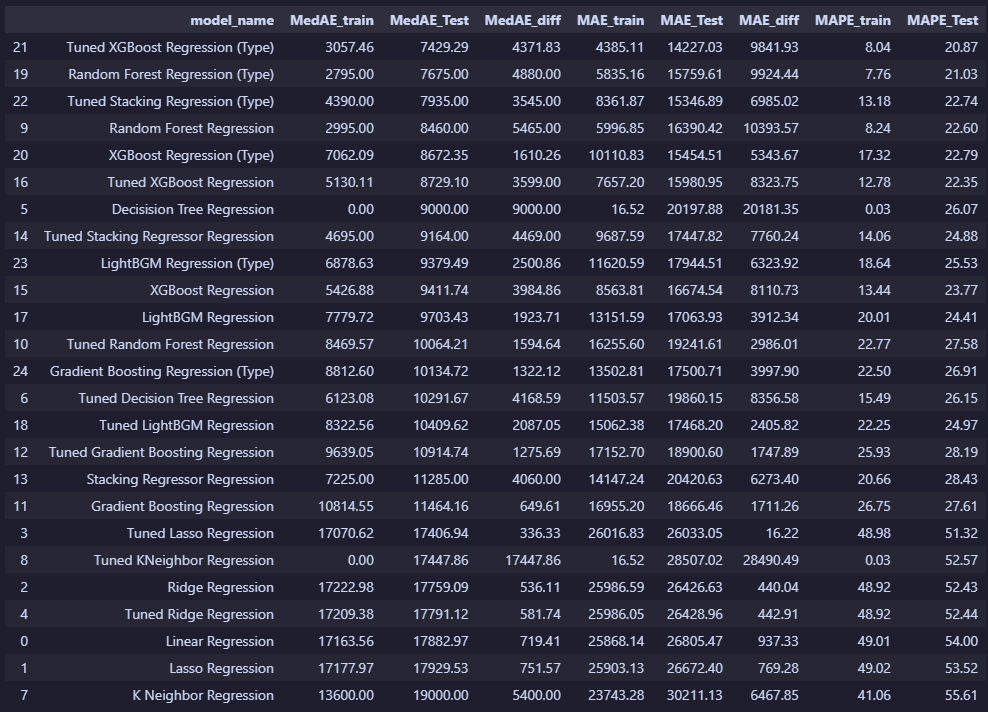

#### Save Model

In [158]:
models = {
    'Best Model' : BestTypeXGBModel,
    'Most Stable MOdel' : TypeXGBModel
}

with open('./models.pkl', 'wb') as file:
    pickle.dump(models, file)

### Machine Learning Summary

Terbaik merupakan XGBoost Regression menggunakan Type dan bukan Make. dengan score
| model_name | MedAE_train | MedAE_Test | MedAE_diff | MAE_train | MAE_Test | MAE_diff | MAPE_train | MAPE_Test |
|---|---|---|---|---|---|---|---|---|
|Tuned XGBoost Regression (Type)|3057.46|7429.29|4371.83|4385.11|14227.03|9841.93|8.04|20.87|
|XGBoost Regression (Type)|7062.09|8672.35|1610.26|10110.83|15454.51|5343.67|17.32|22.79

- Nilai MAPE kurang dari 10% berarti model sangat akurat
- Nilai MAPE antara 10%–20% berarti model baik
- Nilai MAPE antara 20%–50% berarti model layak
- Nilai MAPE lebih dari 50% berarti model buruk

model Tuned XGBoost Regression (Type) dengan score MAPE_train bernilai 8.04% dan MAPE_Test bernilai 20.87% ini berarti ada perbedaan sebesar 12,83%. ini berarti mobil kemungkinan mengalami sedikit overfit. model yang lebih stabil adalah model XGBoost Regression (Type) dengan  MAPE_train bernilai 17.32% dan MAPE_Test bernilai 22.79%.    
   
kedua model tersebut berhubungan (tuned dan base), jadi ada kemungkinan jika menggunakan gridsearchcv daripada randomsearccv untuk tuningnya, maka dapat menghasilkan model yang lebih baik. tetapi tidak gridsearch dengan tuning parameter tersebut tidak dapat dijalankan, karena keterbatasan hardware, dalam hal ini ram. 

menurut hasil model yang dibuat jika perkiraan harga adalah 60.000 maka range harganya adalah 45.772,97 - 74.227,03. yaitu dengan errorate sebesar 20%


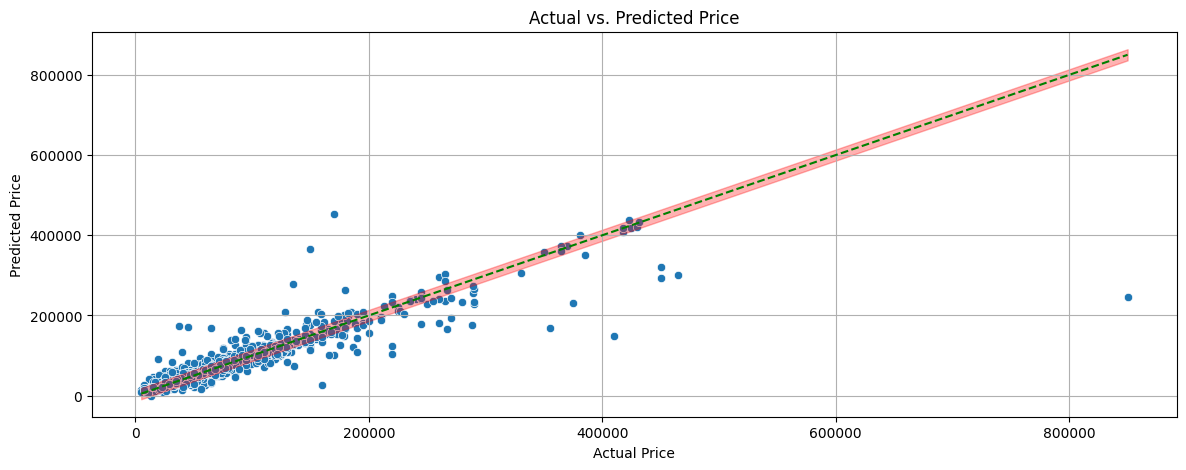

In [154]:
y_final_pred = BestTypeXGBModel.predict(X_Type_test)
error = mean_absolute_error(y_test, y_final_pred)

plt.figure(figsize=(14, 5))
plot = sns.scatterplot(x=y_test, y=y_final_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--')  # Add the line x=y
plt.fill_between([y_test.min(), y_test.max()], [y_test.min() - error, y_test.max() - error], [y_test.min() + error, y_test.max() + error], color='red', alpha=0.3)  # Add the safe zone
plot.set(title='Actual vs. Predicted Price', xlabel='Actual Price', ylabel='Predicted Price')
plt.grid()
plt.show()

dari graph ini terlihat bahwa prediksi range harga masih merangkum sebagian besar dari harga actual, terutama dibawah 300,000. data point masih lumayan dekat dengan garis linear x=y. yang berarti alignment yang lumayan baik antara value prediksi dan actual.  


#### Recomendation

penambahan row dataset dan penambahan column yang lebih informatif seperti, column :
- kesehatan ban
- services history dengan tempatnya
- interior and exterior condition
- modification

### Feature Importance

In [155]:
ohe_feature_names = preprocessornd.transformers_[1][1].get_feature_names_out(preprocessor.transformers_[1][2]).tolist()
ordinal_features = preprocessornd.transformers_[0][2]
minmax_features = preprocessornd.transformers_[2][2]
robust_features = preprocessornd.transformers_[3][2]

# Combine all feature names
feature_names = ordinal_features + ohe_feature_names + minmax_features + robust_features

In [156]:
pd.DataFrame({
    'Feature' : feature_names,
    'Importance %' : ((DecisionTreeModel.steps[1][1].feature_importances_) * 100).round(4),
}).sort_values(by='Importance %', ascending=False).head(5)

Feature  Importance %
107           Year       21.2590
108    Engine_Size       21.1224
0          Options       12.1688
41   Make_Mercedes        8.8911
109        Mileage        7.8272

In [157]:
pd.DataFrame({
    'Feature' : feature_names,
    'Importance %' : ((DecisionTreeModel.steps[1][1].feature_importances_) * 100).round(4),
}).sort_values(by='Importance %').head(20)

Feature  Importance %
4               Make_BYD        0.0000
8             Make_Chery        0.0000
13              Make_FAW        0.0000
17            Make_Foton        0.0000
25           Make_Hummer        0.0000
29            Make_Iveco        0.0000
22       Make_Great Wall        0.0000
35            Make_Lifan        0.0000
50           Make_Subaru        0.0000
46          Make_Peugeot        0.0000
42          Make_Mercury        0.0000
55            Make_Škoda        0.0000
82        Region_Al-Baha        0.0000
86           Region_Arar        0.0000
70          Color_Orange        0.0000
66           Color_Green        0.0000
102        Region_Sakaka        0.0000
99       Region_Qurayyat        0.0001
105  Region_Wadi Dawasir        0.0001
77      Fuel_Type_Hybrid        0.0002

5 feature terpenting adalah Engine_Size, Year, Options, Mileage dan apakah brandnya adalah merceces. 
mobil yang memiliki feature-feature ini lebih berpengaruh terhadap harga jualnya. 

sedangkan, feature-feature yang terendah adalah, 
Make_FAW, Make_Chery, Make_Great Wall, Make_GAC, Make_Hummer, Make_Iveco, Make_Maserati, Make_Lifan, Make_Mercury, Make_Peugeot, Make_Zhengzhou, Make_Victory Auto, Region_Wadi Dawasir, Color_Green. 
dimana feature-feature ini memeriki pengaruh yang sanget kecil terhadap harga jualnya. 

**rekomendasi**: 
- Highlight Engine Size dan Year pada setiap listing, ini akan menarik buyer yang interested pada feature-feature tersebut. 
- menawarkan custom filter pada pencarian Options dan Make: ini akan mempermudah user mencari mobil bekas dengan feature atau Brand yang dicari.
- menawarkan custom sort function untuk Men-sort listing dengan Mileage dan Year: ini akan mempermudah user untuk melihat mobil yang lebih valuable (newer year dan low mileage)

## Summary

- Accurately Predict the price of used cars.    
    model yang telah dibuat dapat memprediksi harga mobil bekas dengan cukup akurat dengan MAPE sebesar 20,87. model menggunakan menggunakan XGBoost Regression yang telah di-tune. 
- Understanding Key Factors. 
    informasi yang didapatkan dari Feature Importances, 5 feature yang paling berpengaruh adalah, 
    1. Engine_Size
    2. Year
    3. Options
    4. Make : Mercedes
    5. Mileage
    dan yang palinng tidak berpengaruh ada 19 yaitu, 
    1. Make : BYD
    2. Make : Cherry
    3. Make : FAW
    4. Make : Iveco
    5. Make : Hummer
    6. Make : Great Wall
    7. Make : GAC
    8. Make : Foton
    9. Make: Mercury
    10.	Make : Subaru
    11. Make : Zhengzhou
    12.	Make : Škoda
    13.	Make : Maserati
    14.	Make : Peugeot
    15.	Make : Lifan
    16.	Color : Orange
    17.	Region : Sakaka
    18.	Region : Wadi Dawasir
    19.	Region : Arar

pendapatan dari komisi penjualan mobil bekasi biasanya berada pada 25% dari profit penjualan mobil dengan minimun 125 usd[^1]. feature Subscription ini dapat menambahkan projected maximum profit 7,603[^2] * 150sar(40usd[^3]) yaitu 1.140.450 sar per bulannya sebagai sumber revenue baru. perusahaan juga dapat menambah sumber revenue baru yaitu dengan memberikan badge pada listing yang sudah di check oleh perusahaan. 

[^1]:https://blog.osum.com/car-salesman-commission/#:~:text=According%20to%20Motor%20Trend%2C%20the%20average%20commission%20for,based%20on%20the%20specific%20dealership%20and%20sales%20performance.
[^2]:https://www.businesstimes.com.sg/singapore/used-car-sales-down-77-first-two-months-2023-new-car-registration-falls-238
[^3]:https://sell.amazon.com/pricing


## Recomendation

dari Data Analysis : 
- price distribution : mensegementasikan Price mejadi 3 yaitu, Budget(<60000), midrange(60000-185000) dan Highend(>185000)
- brand/Type popularity : membuat bagian khusus dan penawaran untuk brand populer pada platform tergantung pada access region
- Gear Popularity : menampilkan gear type tertentu tergantung pada harga yang dicari customer berdasarkan price_average-nya
- Fuel Popularity : Memberikan Badge/flair/label pada mobil sesuai dengan fuel typenya. 
- Mileage and Age : menhighlight mobil dengan mileage rendah jika age nya tinggi/tua terutama dengan harga dibawah price_average-nya. 

untuk dataset : 
- menambahkan dataset populasi per region/region category
- menambahkan dataset history pencarian/query pada platform
- menambahkan column kesehatan ban
- menambahkan column services beserta tempat servicesnya
- menambahkan colum interior dan exterior services
- menambahkan column modification

keuntungan perusahaan : 
- menaikan revenue dengan meninggikan customer satisfaction
- menambahkan feature yang berguna untuk menambah/mempercepat transaksi pada platform
- pemasaran tertentu dapat menjangkau lebih banyak potential customer, yang dapat menaikan conversion
- perusahaan juga dapat menjual feature "specified region advertisement", untuk seller yang mau memasang ads/promoted untuk mobilnya pada suatu region tertentu. 
- customer marketing strategies dapat menaikkan platform brand dan customer loyalty dan membantu customer retention. 
- 5% increase pada customer retention dapat menjadi 25%-95% increase pada profit, existing buyer mengeluarkan upto 300%, memakan 5x lipab lebih banyak uang untuk mendapatkan customer baru daripada me-retain yang sudah ada[^1]
- dengan menambahkan datataset sesuai dengan yang telah di tuliskan, perusahaan dapat menawarkan sumber revenue baru berupa services kepada seller, dimana mobil mereka yang akan dijual dapat di test terlebih dahulu oleh perusahaan. dan jika lolos test sesuai criterianya, maka platform/perusahaan akan memberikan badge seperti "trusted seller" atau "tested" untuk menambahkan kepercayaan calon pembeli terhadap mobil yang akan dibeli